In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

#plt.xkcd()

import pandas as pd
import time

idx = pd.IndexSlice
import datetime

Fecha  Vacunas
0   2021-01-07      NaN
1   2021-01-08    0.000
2   2021-01-09    1.242
3   2021-01-10    0.000
4   2021-01-11    0.992
..         ...      ...
250 2021-09-14    3.094
251 2021-09-15    8.176
252 2021-09-16    0.037
253 2021-09-17    7.677
254 2021-09-18    0.000

[255 rows x 2 columns]

Fecha
2021-01-28    0.000
2021-01-29    0.000
2021-01-30    1.242
2021-01-31    0.000
2021-02-01    0.992
              ...  
2021-10-05    3.094
2021-10-06    8.176
2021-10-07    0.037
2021-10-08    7.677
2021-10-09    0.000
Name: Vacunas, Length: 255, dtype: float64

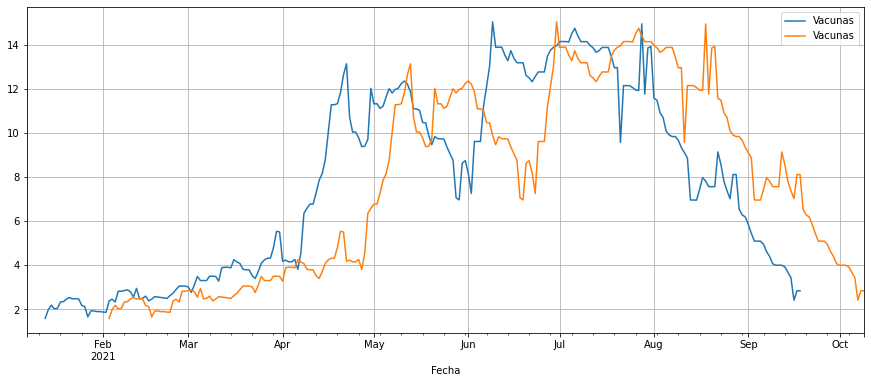

In [2]:
vacunas = pd.read_csv('Vacunas.csv',index_col='Fecha',parse_dates=True).diff()/1000.
vacunas.reset_index(inplace=True)
display(vacunas)
vacunasD = vacunas.copy()
vacunas.Fecha = vacunas.Fecha+ pd.Timedelta(21,unit='D')#21


vacunasD.set_index('Fecha',inplace=True)
vacunas.set_index('Fecha',inplace=True)
vacunasD.fillna(0,inplace=True)
vacunas.fillna(0,inplace=True)


fig, ax = plt.subplots(figsize=(15,6))
vacunasD.rolling(7,center=False).mean().plot(ax=ax)
vacunas.rolling(7,center=False).mean().plot(ax=ax)
plt.grid()
vacunas.Vacunas

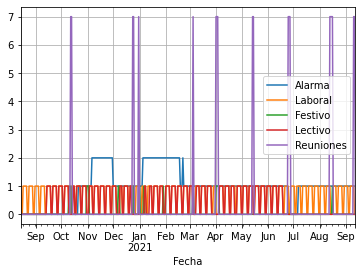

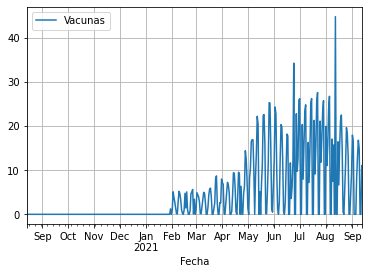

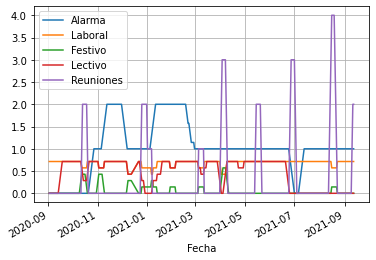

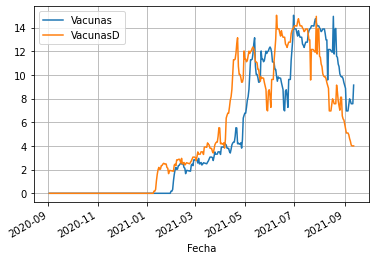

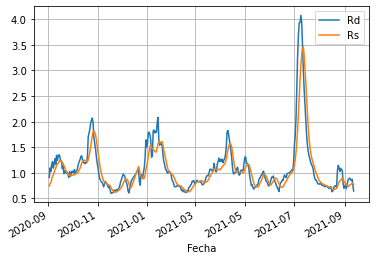

In [3]:
dateparse = lambda x: datetime.datetime.strptime(x, '%d/%m/%y')

edades = np.array([1319290,184542,123870,141711,200576,206170,176822,135180,150419])
puntos = pd.read_csv('Omega.csv',
                sep=';',
                index_col='Fecha',
                parse_dates=True,
                #infer_datetime_format=True,
                date_parser=dateparse,
                decimal=',',
               )
puntos.sort_index(inplace=True)
puntos.columns
puntos['Asintomáticos (%)'] = puntos['Asintomáticos'].copy()
puntos['Asintomáticos'] = puntos['Asintomáticos (%)']*puntos['Casos']/100
puntos['Zaragoza (%)'] = puntos['Zaragoza']/puntos['Casos']*100
puntos['UCI/Camas (%)'] = puntos['UCI ocupadas']/puntos['Camas Ocup']*100
puntos['Camas/UCI'] = puntos['Camas Ocup']/puntos['UCI ocupadas']
puntos['Casos/Camas'] = puntos['Casos']/puntos['Camas Ocup']
puntos['Camas/Casos'] = puntos['Camas Ocup']/puntos['Casos']
puntos['Camas (%)'] = puntos['Camas Ocup']/(puntos['Camas libres'])*100.
puntos['UCI (%)'] = puntos['UCI ocupadas']/(puntos['UCI libres con resp'])*100.
puntos['Día'] = np.sin((puntos['Día de la semana']-.5)*2*np.pi /7)#.plot()
puntos['Rs'] = puntos.Casos.rolling(7,center=False).sum()/puntos.Casos.shift(7).rolling(7,center=False).sum()
puntos['Rd'] = puntos.Casos/puntos.Casos.shift(7)
puntos['Bias'] = 1
puntos['Festivo'] = 0
puntos['Lectivo'] = 1
puntos.loc['2021/6/21':,'Lectivo'] = 0

#goto
#puntos.loc['2020/10/12','Festivo'] = 1 #+ puntos.loc['2020/10/10':'2020/10/14','Festivo']
#puntos.loc['2020/11/2','Festivo'] = 1 #+ puntos.loc['2020/10/31':'2020/11/2','Festivo']
puntos.loc['2020/10/10':'2020/10/12','Festivo'] = 1 #+ puntos.loc['2020/10/10':'2020/10/14','Festivo']
puntos.loc['2020/10/31':'2020/11/2','Festivo'] = 1 #+ puntos.loc['2020/10/31':'2020/11/2','Festivo']

puntos.loc['2020/12/7':'2020/12/8',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
puntos.loc['2020/12/25',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
puntos.loc['2021/1/1',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
puntos.loc['2021/1/6',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
puntos.loc['2021/1/29',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
puntos.loc['2021/3/5',
           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
puntos.loc['2021/4/1':'2021/4/4',
           'Festivo'] = 1
puntos.loc['2021-04-23':'2021-04-24','Festivo'] = 0
puntos.loc['2021-08-16','Festivo'] = 1

puntos['Laboral'] = 1 - puntos.Festivo/1
puntos.loc[puntos[puntos['Día de la semana'].isin([6,7])].index,
           'Laboral'] = 0


#puntos.loc['2020/10/10':'2020/10/14','Laboral'] = 0
#puntos.loc['2020/10/31':'2020/11/2','Laboral'] = 0


puntos.loc['2020/10/10':'2020/10/14','Lectivo'] = 0
puntos.loc['2020/10/31':'2020/11/2','Lectivo'] = 0
puntos.loc[:'2020/9/13','Lectivo'] = 0
puntos.loc['2020/12/7':'2020/12/8','Lectivo'] = 0
puntos.loc['2020/12/23':'2020/12/25','Lectivo'] = 0
puntos.loc['2020/12/28':'2021/1/1','Lectivo'] = 0
puntos.loc['2021/1/4':'2021/1/6','Lectivo'] = 0
puntos.loc['2020/12/23':'2021/1/6','Lectivo'] = 0
puntos.loc['2021/1/11':'2021/1/12','Lectivo'] = 0
puntos.loc['2021/1/29':'2021/1/30','Lectivo'] = 0
puntos.loc['2021/3/5':'2021/3/8','Lectivo'] = 0
puntos.loc['2021/3/29':'2021/4/4','Lectivo'] = 0
puntos.loc['2021-04-23':'2021/4/24','Lectivo'] = 0
puntos.loc['2021/6/21':,'Lectivo'] = 0

puntos.loc[puntos[puntos['Día de la semana'].isin([6,7])].index,
           'Lectivo'] = 0

puntos['NoLaboral'] = 1 - puntos.Laboral
puntos['NoLectivo'] = 1 - puntos.Lectivo

puntos['Reuniones'] = 0
puntos.loc['2020/10/12':'2020/10/13','Reuniones'] = 7
#puntos.loc['2020/10/12','Reuniones'] = 1
puntos.loc['2020/12/24':'2020/12/25','Reuniones'] = 7
#puntos.loc['2020/12/25':'2020/12/26','Reuniones'] = 1
puntos.loc['2020/12/31','Reuniones'] = 7
puntos.loc['2021/3/5','Reuniones'] = 7
puntos.loc['2021-04-01':'2021-04-03',
           'Reuniones'] = 7
puntos.loc['2021-05-14':'2021-05-15',
           'Reuniones'] = 7
puntos.loc['2021-06-25':'2021-06-27',
           'Reuniones'] = 7
#puntos.loc['2021/7/2':'2021/7/4','Reuniones'] = 7
#puntos.loc['2021/7/9':'2021/7/11','Reuniones'] = 7
#puntos.loc['2021/7/16':'2021/7/18','Reuniones'] = 7
#puntos.loc['2021/7/23':'2021/7/25','Reuniones'] = 7
#puntos.loc['2021/7/30':'2021/8/1','Reuniones'] = 7
#puntos.loc['2021/8/6':'2021/8/8','Reuniones'] = 7
puntos.loc['2021/8/13':'2021/8/16','Reuniones'] = 7
#puntos.loc['2021/8/20':'2021/8/21','Reuniones'] = 7
#puntos.loc['2021/8/27':'2021/8/28','Reuniones'] = 7
#puntos.loc['2021/9/3':'2021/9/4','Reuniones'] = 7
puntos.loc['2021/9/10':'2021/9/11','Reuniones'] = 7
puntos.loc['2021/9/17':'2021/9/18','Reuniones'] = 7

puntos.loc[:,'VacunasD'] = 0.
for i in puntos.index:
    if i in vacunasD.index:
        puntos.loc[i,'VacunasD'] = vacunasD.at[i,'Vacunas']
puntos.loc[:,'Vacunas'] = 0.
for i in puntos.index:
    if i in vacunas.index:
        puntos.loc[i,'Vacunas'] = vacunas.at[i,'Vacunas']
puntos.loc[:,'Inoculados'] = (edades[0]-1000*puntos.Vacunas.cumsum()/2.45)*100./edades[0]# + puntos.Casos.cumsum()
puntos.loc[:,'Total Casos'] = (edades[0]-puntos.Casos.cumsum()-21313)*100./edades[0] # +21.313

puntos = pd.concat([puntos,(edades[1:]*.983-puntos[['1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más']].cumsum().add_prefix('Total Casos '))/edades[1:]*100.],#/edades*100.],
         axis=1)
#puntos = pd.concat([puntos,puntos[['1 a 14 años',
#       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
#       '55 a 64 años', '65 a 74 años', '75 años o más']].cumsum().add_prefix('Total Casos ')/edades[1:]*100.],#/edades*100.],
#         axis=1)

puntos[['Alarma',
       'Laboral',
       'Festivo',
       'Lectivo',
       'Reuniones'
      ]].plot()

plt.grid()
plt.show()
puntos[['Vacunas'
      ]].plot()

plt.grid()
plt.show()


semanal = puntos.rolling(7,center=False).mean().copy()
diario = puntos.copy()
puntos = puntos.rolling(7,center=False).mean().copy().dropna()

puntos[['Alarma',
       'Laboral',
       'Festivo',
       'Lectivo',
       'Reuniones'
      ]].plot()

plt.grid()
plt.show()
puntos[['Vacunas',
        'VacunasD',
      ]].plot()

plt.grid()
plt.show()


puntos[['Rd','Rs'
      ]].plot()

plt.grid()
plt.show()
#puntos['Día'] = diario['Día']
#puntos['Alarma'] = diario.Alarma
#puntos['Festivo'] = diario['Festivo']
#puntos['Laboral'] = diario['Laboral']
#puntos['Reuniones'] = diario['Reuniones']
#puntos['Bias'] = diario['Bias']

In [4]:
diario.tail()

Día de la semana  Casos  test coresp  \
Fecha                                              
2021-09-08                 3    121         1966   
2021-09-09                 4    137         1732   
2021-09-10                 5    116         1909   
2021-09-11                 6     60         1295   
2021-09-12                 7     31          816   

            Nº de pacientes a los que se ha realizado pruebas  \
Fecha                                                           
2021-09-08                                             2053.0   
2021-09-09                                             1828.0   
2021-09-10                                             1366.0   
2021-09-11                                              701.0   
2021-09-12                                              864.0   

            Tasa de positividad (%)  Asintomáticos  Zaragoza  1 a 14 años  \
Fecha                                                                       
2021-09-08                     6.15          79.86        85           23   
2021-09-09                     7.91          76.72       100           20   
2021-09-10                     6.08          24.36        80           34   
2021-09-11                     4.63          34.20        50           13   
2021-09-12                     3.80          13.95        25            7   

            15 a 24 años  25 a 34 años  ...  Inoculados  Total Casos  \
Fecha                                   ...                            
2021-09-08            17             9  ...   44.553510    87.887955   
2021-09-09            13            14  ...   44.094976    87.877571   
2021-09-10            14             9  ...   44.094976    87.868778   
2021-09-11             4             8  ...   44.094976    87.864230   
2021-09-12             2             2  ...   43.754162    87.861880   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Fecha                                                           
2021-09-08                89.150863                 81.358852   
2021-09-09                89.140026                 81.348357   
2021-09-10                89.121602                 81.337055   
2021-09-11                89.114557                 81.333826   
2021-09-12                89.110764                 81.332211   

            Total Casos 25 a 34 años  Total Casos 35 a 44 años  \
Fecha                                                            
2021-09-08                 86.276939                 89.202202   
2021-09-09                 86.267060                 89.190236   
2021-09-10                 86.260709                 89.178769   
2021-09-11                 86.255063                 89.174282   
2021-09-12                 86.253652                 89.171789   

            Total Casos 45 a 54 años  Total Casos 55 a 64 años  \
Fecha                                                            
2021-09-08                 88.723437                 89.302251   
2021-09-09                 88.713736                 89.293768   
2021-09-10                 88.706461                 89.289809   
2021-09-11                 88.701125                 89.286981   
2021-09-12                 88.698700                 89.285850   

            Total Casos 65 a 74 años  Total Casos 75 años o más  
Fecha                                                            
2021-09-08                 91.256059                  89.116985  
2021-09-09                 91.250880                  89.104353  
2021-09-10                 91.245702                  89.100364  
2021-09-11                 91.243483                  89.096375  
2021-09-12                 91.242003                  89.093716  

[5 rows x 50 columns]

In [5]:
nuevos = pd.read_csv('Omega_new.csv',
                sep=';',
                index_col='Fecha',
                parse_dates=True,
                #infer_datetime_format=True,
                date_parser=dateparse,
                decimal=',',
               )
nuevos.sort_index(inplace=True)
nuevos.columns
#nuevos['Camas Ocup'] = nuevos['Camas Ocup'].diff()
#nuevos['UCI ocupadas'] = nuevos['UCI ocupadas'].diff()
nuevos['Asintomáticos (%)'] = nuevos['Asintomáticos'].copy()
nuevos['Asintomáticos'] = nuevos['Asintomáticos (%)']*nuevos['Casos']/100
nuevos['Zaragoza (%)'] = nuevos['Zaragoza']/nuevos['Casos']*100
nuevos['UCI/Camas (%)'] = nuevos['UCI ocupadas']/nuevos['Camas Ocup']*100
nuevos['Camas/UCI'] = nuevos['Camas Ocup']/nuevos['UCI ocupadas']
nuevos['Casos/Camas'] = nuevos['Casos']/nuevos['Camas Ocup']
nuevos['Camas/Casos'] = nuevos['Camas Ocup']/nuevos['Casos']
nuevos['Camas (%)'] = nuevos['Camas Ocup']/(nuevos['Camas libres'])*100.
nuevos['UCI (%)'] = nuevos['UCI ocupadas']/(nuevos['UCI libres con resp'])*100.
nuevos['Día'] = np.sin((nuevos['Día de la semana']-.5)*2*np.pi /7)#.plot()
nuevos['Bias'] = 1
nuevos['Rs'] = nuevos.Casos.rolling(7,center=False).sum()/nuevos.Casos.shift(7).rolling(7,center=False).sum()
nuevos['Rd'] = nuevos.Casos/nuevos.Casos.shift(7)
nuevos['Festivo'] = 0
nuevos['Lectivo'] = 1

#nuevos.loc['2021/6/21':,'Lectivo'] = 0

#nuevos.loc['2020/12/7':'2020/12/8',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
#nuevos.loc['2020/12/25',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/5':'2020/12/8','Festivo']
#nuevos.loc['2021/1/1',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
#nuevos.loc['2021/1/6',
#           'Festivo'] = 1 #+ nuevos.loc['2020/12/24':'2021/1/3','Festivo']
#nuevos.loc['2021/3/5',
#           'Festivo'] = 1
#nuevos.loc['2021/4/1':'2021/4/4',
#           'Festivo'] = 1
#nuevos.loc['2021-04-23','Festivo'] = 0
#nuevos.loc['2021-08-16','Festivo'] = 1
nuevos['Laboral'] = 1# - nuevos.Festivo/1
nuevos.loc[nuevos[nuevos['Día de la semana'].isin([6,7])].index,
           'Laboral'] = 0

#nuevos.loc['2020/12/7':'2020/12/8','Lectivo'] = 0
#nuevos.loc['2020/12/23':'2020/12/25','Lectivo'] = 0
#nuevos.loc['2020/12/28':'2021/1/1','Lectivo'] = 0
#nuevos.loc['2021/1/4':'2021/1/6','Lectivo'] = 0
#nuevos.loc['2020/12/23':'2021/1/6','Lectivo'] = 0
#nuevos.loc['2021/1/11':'2021/1/12','Lectivo'] = 0

#nuevos.loc['2021/3/5':'2021/3/8','Lectivo'] = 0
#nuevos.loc['2021/3/29':'2021/4/4','Lectivo'] = 0
#nuevos.loc['2021-04-23':'2021/4/24','Lectivo'] = 0
nuevos.loc[nuevos[nuevos['Día de la semana'].isin([6,7])].index,
           'Lectivo'] = 0

#nuevos.loc[:'2020/9/13','Lectivo'] = 0

nuevos['NoLaboral'] = 1 - nuevos.Laboral
nuevos['NoLectivo'] = 1 - nuevos.Lectivo



nuevos['Reuniones'] = 0 
#nuevos.loc['2020/12/24':'2020/12/25','Reuniones'] = 7
##nuevos.loc['2020/12/25':'2020/12/26','Reuniones'] = 1
#nuevos.loc['2020/12/31','Reuniones'] = 7
##nuevos.loc['2020/12/24','Reuniones'] = 1
##nuevos.loc['2020/12/25','Reuniones'] = 1
##nuevos.loc['2020/12/31','Reuniones'] = 1
#nuevos.loc['2021/4/1':'2021/4/3','Reuniones'] = 7
#nuevos.loc['2021/7/2':'2021/7/4','Reuniones'] = 7
#nuevos.loc['2021/7/16':'2021/7/18','Reuniones'] = 7
#nuevos.loc['2021/8/13':'2021/8/16','Reuniones'] = 7
## esperemos que rterminen no fiestas por un tiempo 
#nuevos.loc['2021/8/20':'2021/8/21','Reuniones'] = 7



nuevos.loc[:,'VacunasD'] = np.nan
for i in nuevos.index:
    if i in vacunasD.index:
        nuevos.loc[i,'VacunasD'] = vacunasD.at[i,'Vacunas']
nuevos.loc[:,'Vacunas'] = np.nan
for i in nuevos.index:
    if i in vacunas.index:
        nuevos.loc[i,'Vacunas'] = vacunas.at[i,'Vacunas']
nuevos.loc[:,'Inoculados'] = diario.Inoculados.iat[-1] - 1000.*nuevos.Vacunas.cumsum()/2.45*100/edades[0]
nuevos.loc[:,'Total Casos'] = diario['Total Casos'].iat[-1]-nuevos.Casos.cumsum()*100./edades[0]

nuevos = pd.concat([nuevos, diario[['Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más']].iloc[-1]-nuevos[['1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más'
                                  ]].cumsum().add_prefix('Total Casos ')/edades[1:]*100. ],#/edades*100.],
         axis=1)
#nuevos = pd.concat([nuevos, diario[['Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
#       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
#       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
#       'Total Casos 65 a 74 años', 'Total Casos 75 años o más']].iloc[-1]+nuevos[['1 a 14 años',
#       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
#       '55 a 64 años', '65 a 74 años', '75 años o más'
#                                  ]].cumsum().add_prefix('Total Casos ')/edades[1:]*100. ],#/edades*100.],
#         axis=1)


nuevos.tail(10).T


Fecha                                               2021-09-14   2021-09-15  \
Día de la semana                                      2.000000     3.000000   
Casos                                                83.000000   128.000000   
test coresp                                        1988.000000  2352.000000   
Nº de pacientes a los que se ha realizado pruebas  2132.000000  2166.000000   
Tasa de positividad (%)                               4.180000     5.440000   
Asintomáticos                                        37.350000    66.560000   
Zaragoza                                             54.000000    97.000000   
1 a 14 años                                          19.000000    39.000000   
15 a 24 años                                          8.000000    12.000000   
25 a 34 años                                          8.000000     7.000000   
35 a 44 años                                         14.000000    27.000000   
45 a 54 años                                         10.000000    18.000000   
55 a 64 años                                         13.000000     8.000000   
65 a 74 años                                          4.000000     7.000000   
75 años o más                                         6.000000     5.000000   
Camas Ocup                                          155.000000   148.000000   
Camas libres                                       1346.000000  1352.000000   
UCI ocupadas                                         33.000000    33.000000   
UCI libres con resp                                  96.000000    98.000000   
Alarma                                                1.000000     1.000000   
Asintomáticos (%)                                    45.000000    52.000000   
Zaragoza (%)                                         65.060241    75.781250   
UCI/Camas (%)                                        21.290323    22.297297   
Camas/UCI                                             4.696970     4.484848   
Casos/Camas                                           0.535484     0.864865   
Camas/Casos                                           1.867470     1.156250   
Camas (%)                                            11.515602    10.946746   
UCI (%)                                              34.375000    33.673469   
Día                                                   0.974928     0.781831   
Bias                                                  1.000000     1.000000   
Rs                                                         NaN          NaN   
Rd                                                         NaN          NaN   
Festivo                                               0.000000     0.000000   
Lectivo                                               1.000000     1.000000   
Laboral                                               1.000000     1.000000   
NoLaboral                                             0.000000     0.000000   
NoLectivo                                             0.000000     0.000000   
Reuniones                                             0.000000     0.000000   
VacunasD                                              3.094000     8.176000   
Vacunas                                               7.745000    13.822000   
Inoculados                                           43.382626    42.955000   
Total Casos                                          87.846417    87.836715   
Total Casos 1 a 14 años                              89.083670    89.062536   
Total Casos 15 a 24 años                             81.316873    81.307185   
Total Casos 25 a 34 años                             86.239539    86.234599   
Total Casos 35 a 44 años                             89.153841    89.140380   
Total Casos 45 a 54 años                             88.687059    88.678329   
Total Casos 55 a 64 años                             89.275105    89.270581   
Total Casos 65 a 74 años                             91.235345    91.230167   
Total Casos 75 años o más                         

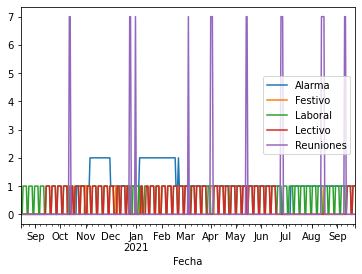

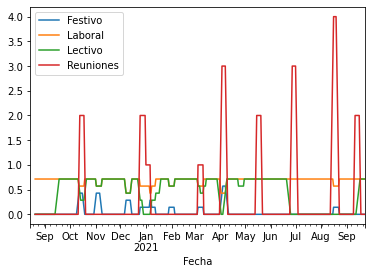

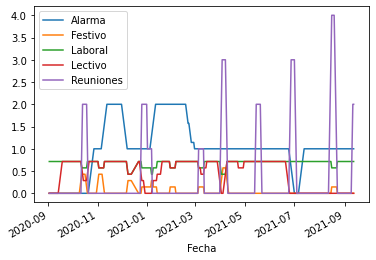

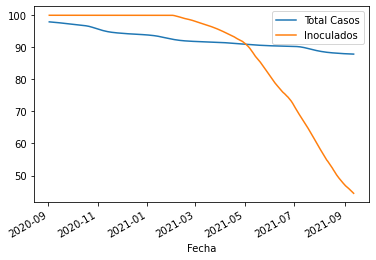

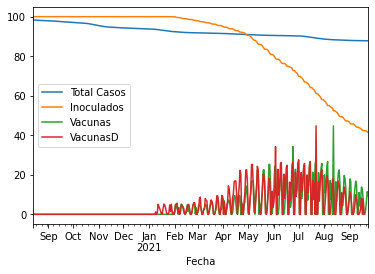

In [6]:
total = pd.concat([diario,nuevos])
total[['Alarma',
       'Festivo',
       'Laboral',
       'Lectivo',
       'Reuniones'
      ]].plot()
plt.show()
total[[
       'Festivo',
       'Laboral',
       'Lectivo',
       'Reuniones'
      ]].rolling(7,center=False).mean().plot()
plt.show()
puntos[['Alarma',
       'Festivo',
       'Laboral',
       'Lectivo',
       'Reuniones'
      ]].plot()
plt.show()
puntos[['Total Casos',
       'Inoculados',
      ]].plot()
plt.show()
total[['Total Casos',
       'Inoculados',
       'Vacunas',
       'VacunasD',
      ]].plot()
plt.show()

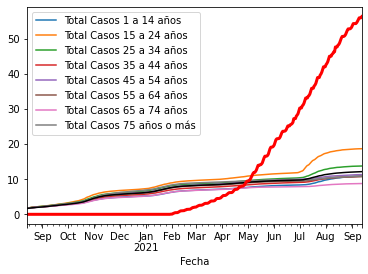

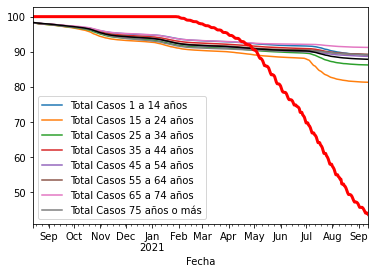

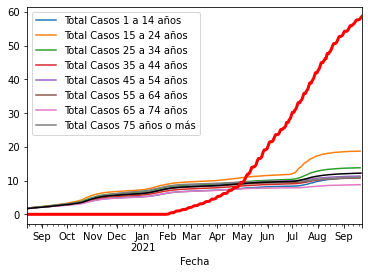

Total Casos  Inoculados
Fecha                              
2020-08-14    98.337212  100.000000
2020-08-15    98.300677  100.000000
2020-08-16    98.271116  100.000000
2020-08-17    98.241099  100.000000
2020-08-18    98.205702  100.000000
...                 ...         ...
2021-09-19    87.814734   42.337537
2021-09-20    87.807988   42.262048
2021-09-21    87.798134   42.041707
2021-09-22    87.791615   41.688456
2021-09-23          NaN   41.395287

[406 rows x 2 columns]

Total Casos  Inoculados
Fecha                              
2021-09-13    87.852709   43.622242
2021-09-14    87.846417   43.382626
2021-09-15    87.836715   42.955000
2021-09-16    87.830197   42.575173
2021-09-17    87.823223   42.337692
2021-09-18    87.818599   42.337692
2021-09-19    87.814734   42.337537
2021-09-20    87.807988   42.262048
2021-09-21    87.798134   42.041707
2021-09-22    87.791615   41.688456
2021-09-23          NaN   41.395287

In [7]:
(100.-diario[['Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más']]).plot()
(100.-diario['Total Casos']).plot(color='k')
(100.-diario['Inoculados']).plot(color='r',lw=3)
plt.show()
(diario[['Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más']]).plot()
(diario['Total Casos']).plot(color='k')
(diario['Inoculados']).plot(color='r',lw=3)
plt.show()

(100-total[['Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más']]).plot()
(100-total['Total Casos']).plot(color='k')
(100-total['Inoculados']).plot(color='r',lw=3)
plt.show()
display(total[['Total Casos','Inoculados']])
display(nuevos[['Total Casos','Inoculados']])

In [8]:

total = pd.concat([diario,nuevos])
nuevos['Rs'] = (total.Casos.rolling(7,center=False).sum()/total.Casos.shift(7).rolling(7,center=False).sum()).loc[nuevos.index]
nuevos['Rd'] = (total.Casos/total.Casos.shift(7)).loc[nuevos.index]

nuevos


Día de la semana  Casos  test coresp  \
Fecha                                              
2021-09-13                 1  121.0       2092.0   
2021-09-14                 2   83.0       1988.0   
2021-09-15                 3  128.0       2352.0   
2021-09-16                 4   86.0       1895.0   
2021-09-17                 5   92.0       2004.0   
2021-09-18                 6   61.0       1477.0   
2021-09-19                 7   51.0        913.0   
2021-09-20                 1   89.0       2203.0   
2021-09-21                 2  130.0       2577.0   
2021-09-22                 3   86.0          NaN   
2021-09-23                 4    NaN          NaN   

            Nº de pacientes a los que se ha realizado pruebas  \
Fecha                                                           
2021-09-13                                             2432.0   
2021-09-14                                             2132.0   
2021-09-15                                             2166.0   
2021-09-16                                             1981.0   
2021-09-17                                             2134.0   
2021-09-18                                              994.0   
2021-09-19                                              947.0   
2021-09-20                                             1938.0   
2021-09-21                                             2000.0   
2021-09-22                                                NaN   
2021-09-23                                                NaN   

            Tasa de positividad (%)  Asintomáticos  Zaragoza  1 a 14 años  \
Fecha                                                                       
2021-09-13                     5.78          70.18      76.0         31.0   
2021-09-14                     4.18          37.35      54.0         19.0   
2021-09-15                     5.44          66.56      97.0         39.0   
2021-09-16                     4.54          50.74      60.0          9.0   
2021-09-17                     4.59          46.00      68.0         18.0   
2021-09-18                     4.13          37.21      41.0         11.0   
2021-09-19                     5.59          29.07      27.0          5.0   
2021-09-20                     4.04          54.29      44.0         15.0   
2021-09-21                     5.04          74.10     105.0         34.0   
2021-09-22                      NaN          49.88      69.0          NaN   
2021-09-23                      NaN            NaN       NaN          NaN   

            15 a 24 años  25 a 34 años  ...  Inoculados  Total Casos  \
Fecha                                   ...                            
2021-09-13          11.0          12.0  ...   43.622242    87.852709   
2021-09-14           8.0           8.0  ...   43.382626    87.846417   
2021-09-15          12.0           7.0  ...   42.955000    87.836715   
2021-09-16           9.0           6.0  ...   42.575173    87.830197   
2021-09-17           9.0          14.0  ...   42.337692    87.823223   
2021-09-18           3.0           6.0  ...   42.337692    87.818599   
2021-09-19           6.0           2.0  ...   42.337537    87.814734   
2021-09-20           3.0           9.0  ...   42.262048    87.807988   
2021-09-21           5.0          20.0  ...   42.041707    87.798134   
2021-09-22           NaN           NaN  ...   41.688456    87.791615   
2021-09-23           NaN           NaN  ...   41.395287          NaN   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Fecha                                                           
2021-09-13                89.093966                 81.323331   
2021-09-14                89.083670                 81.316873   
2021-09-15                89.062536                 81.307185   
2021-09-16                89.057660                 81.299919   
2021-09-17                89.047906                 81.292654   
2021-09-18                89.041945                 81.290232   
2021-09-19                89.0

In [9]:
display(total.columns)
edades = [1319290,184542,123870,141711,200576,206170,176822,135180,150419]
pd.concat([total,total[['1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más']].cumsum().add_prefix('Total Casos ')],#/edades*100.],
         axis=1)

Index(['Día de la semana', 'Casos', 'test coresp',
       'Nº de pacientes a los que se ha realizado pruebas',
       'Tasa de positividad (%)', 'Asintomáticos', 'Zaragoza', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más', 'Camas Ocup',
       'Camas libres', 'UCI ocupadas', 'UCI libres con resp', 'Alarma',
       'Asintomáticos (%)', 'Zaragoza (%)', 'UCI/Camas (%)', 'Camas/UCI',
       'Casos/Camas', 'Camas/Casos', 'Camas (%)', 'UCI (%)', 'Día', 'Rs', 'Rd',
       'Bias', 'Festivo', 'Lectivo', 'Laboral', 'NoLaboral', 'NoLectivo',
       'Reuniones', 'VacunasD', 'Vacunas', 'Inoculados', 'Total Casos',
       'Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más'],
      dtype='object')

Día de la semana  Casos  test coresp  \
Fecha                                              
2020-08-14                 5  624.0       4177.0   
2020-08-15                 6  482.0       3243.0   
2020-08-16                 7  390.0       3158.0   
2020-08-17                 1  396.0       3408.0   
2020-08-18                 2  467.0       4029.0   
...                      ...    ...          ...   
2021-09-19                 7   51.0        913.0   
2021-09-20                 1   89.0       2203.0   
2021-09-21                 2  130.0       2577.0   
2021-09-22                 3   86.0          NaN   
2021-09-23                 4    NaN          NaN   

            Nº de pacientes a los que se ha realizado pruebas  \
Fecha                                                           
2020-08-14                                             3481.0   
2020-08-15                                             1907.0   
2020-08-16                                             1168.0   
2020-08-17                                             3189.0   
2020-08-18                                             3580.0   
...                                                       ...   
2021-09-19                                              947.0   
2021-09-20                                             1938.0   
2021-09-21                                             2000.0   
2021-09-22                                                NaN   
2021-09-23                                                NaN   

            Tasa de positividad (%)  Asintomáticos  Zaragoza  1 a 14 años  \
Fecha                                                                       
2020-08-14                    14.94         318.24     541.0         96.0   
2020-08-15                    14.86         216.90     428.0         67.0   
2020-08-16                    12.35         230.10     338.0         53.0   
2020-08-17                    11.62         233.64     307.0         51.0   
2020-08-18                    11.59         270.86     394.0         49.0   
...                             ...            ...       ...          ...   
2021-09-19                     5.59          29.07      27.0          5.0   
2021-09-20                     4.04          54.29      44.0         15.0   
2021-09-21                     5.04          74.10     105.0         34.0   
2021-09-22                      NaN          49.88      69.0          NaN   
2021-09-23                      NaN            NaN       NaN          NaN   

            15 a 24 años  25 a 34 años  ...  Total Casos 65 a 74 años  \
Fecha                                   ...                             
2020-08-14          78.0          85.0  ...                 98.264492   
2020-08-15          51.0          64.0  ...                 98.240080   
2020-08-16          54.0          38.0  ...                 98.209750   
2020-08-17          41.0          40.0  ...                 98.182379   
2020-08-18          50.0          72.0  ...                 98.153529   
...                  ...           ...  ...                       ...   
2021-09-19           6.0           2.0  ...                 91.218331   
2021-09-20           3.0           9.0  ...                 91.216112   
2021-09-21           5.0          20.0  ...                 91.213893   
2021-09-22           NaN           NaN  ...                       NaN   
2021-09-23           NaN           NaN  ...                       NaN   

            Total Casos 75 años o más  Total Casos 1 a 14 años  \
Fecha                                                            
2020-08-14                  98.264765                     96.0   
2020-08-15                  98.227536                    163.0   
2020-08-16                  98.208256                    216.0   
2020-08-17                  98.177010                    267.0   
2020-08-18                  98.150418                    316.0   
...                               ...                      ...   
2021-09-1

In [10]:
variables = [
    'Casos', 
    'test coresp', 'Tasa de positividad (%)',
    'Nº de pacientes a los que se ha realizado pruebas',
    'Asintomáticos', 'Asintomáticos (%)',
    'Zaragoza','Zaragoza (%)',
    '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más', 
    'Camas Ocup', 'Camas libres', 'Camas (%)',
    'UCI ocupadas', 'UCI libres con resp','UCI (%)',
    'Rs',
    'Rd',
    #'UCI/Camas (%)',
    #'Camas/UCI',
    #'Casos/Camas',
    #'Camas/Casos',
    #'Alarma',
    #'Día', 
    #'Bias',
    'Inoculados',
    'Total Casos',
    'Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más'
]
entradas = ['Alarma','Laboral','Lectivo','Reuniones','Festivo','Bias']
entradas = ['Alarma','Festivo','NoLaboral','Laboral','NoLectivo','Lectivo','Reuniones','Bias']
entradas = ['Alarma','Festivo','NoLaboral','Laboral','NoLectivo','Lectivo','Reuniones','Bias',
            'Vacunas',#'VacunasD'
            #'Inoculados'
           ]



In [11]:
def find_weekend_indices(datetime_array):
    indices=[]
    for i in range(len(datetime_array)):
        #if datetime_array[i].day_name() in ['Saturday', 'Sunday']:
        if datetime_array[i].weekday()+1 in [6,7]:
            indices.append(i)
    return indices

weekend_indices = find_weekend_indices(puntos.index)

def highlight_datetimes(index, ax,items=True):
    indices = find_weekend_indices(index)
    i = 0
    while i < len(indices):
        ax.axvspan(index[indices[i]], index[indices[i] + 1], facecolor='gray', edgecolor='none', alpha=.05)
        i += 1
    if items:
        ax.axvline(x=datetime.datetime(2020, 3, 8),ls='--',linewidth=4, color='purple',alpha=.4,label='Manifestación y Vox')
        ax.axvline(x=datetime.datetime(2020, 3, 9),linewidth=4, color='green',alpha=.4,label='PV y MD Educativo')
        ax.axvline(x=datetime.datetime(2020, 3, 12),linewidth=4, color='yellow',alpha=.4,label='AR Educativo')
        ax.axvline(x=datetime.datetime(2020, 3, 15),linewidth=4, color='r',alpha=.4,label='Estado de alarma')
        ax.axvline(x=datetime.datetime(2020, 3, 28),linewidth=4, color='brown',alpha=.4,label='Servicios no esenciales')
        ax.axvline(x=datetime.datetime(2020, 4, 26),ls='--',linewidth=4, color='orange',alpha=.4,label='Niños a la calle')
        ax.axvline(x=datetime.datetime(2020, 5, 4),ls='--',linewidth=4, color='lightblue',alpha=.4,label='Fase 0')
        ax.axvline(x=datetime.datetime(2020, 5, 11),ls='--',linewidth=4, color='blue',alpha=.4,label='Fase 1')
        ax.axvline(x=datetime.datetime(2020, 5, 25),ls='--',linewidth=4, color='darkblue',alpha=.4,label='Fase 2')
        ax.axvline(x=datetime.datetime(2020, 6, 8),ls='--',linewidth=4, color='lightgreen',alpha=.4,label='Fase 3')
        ax.axvline(x=datetime.datetime(2020, 6, 21),ls='--',linewidth=4, color='black',alpha=.4,label='Nueva Normalidad')
        ax.axvline(x=datetime.datetime(2020, 9, 14),linewidth=4, color='yellow',alpha=.4,label='Apertura AR Educativo')
        ax.axvline(x=datetime.datetime(2020, 10, 25),linewidth=4, color='darkred',alpha=.4,label='Nivel III')
        ax.axvline(x=datetime.datetime(2020, 11, 8),linewidth=4, color='brown',alpha=.4,label='nivel III Agravado')



In [12]:
repartoDiaSemana = diario[['Día de la semana']].join(diario[variables].divide(
                                                                    diario[variables].rolling(7,center=True).mean())
                                                    ).dropna().groupby(['Día de la semana']).mean()

#diario['Camas Ocup'] = diario['Camas Ocup'].diff()
#diario['UCI ocupadas'] = diario['UCI ocupadas'].diff()
#semanal['Camas Ocup'] = semanal['Camas Ocup'].diff()
#semanal['UCI ocupadas'] = semanal['UCI ocupadas'].diff()
repartoDiaSemana.loc[:,'Total Casos'] = 1#repartoDiaSemana['Total Casos']/repartoDiaSemana['Total Casos'].mean()
repartoDiaSemana.loc[:,'Inoculados'] = 1
repartoDiaSemana.loc[:,['Rs','Rd']] = 1
#repartoDiaSemana.loc[:,['Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
#       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
#       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
#       'Total Casos 65 a 74 años', 'Total Casos 75 años o más']] = 1#repartoDiaSemana['Total Casos']/repartoDiaSemana['Total Casos'].mean()


display(repartoDiaSemana)
repartoDiaSemana.mean()

Casos  test coresp  Tasa de positividad (%)  \
Día de la semana                                                   
1                 0.829491     0.921424                 0.910691   
2                 1.198675     1.209228                 0.988312   
3                 1.184790     1.215304                 0.979432   
4                 1.209266     1.124933                 1.081438   
5                 1.131307     1.112551                 1.025526   
6                 0.858258     0.826187                 1.049630   
7                 0.553246     0.567493                 0.961801   

                  Nº de pacientes a los que se ha realizado pruebas  \
Día de la semana                                                      
1                                                          1.231790   
2                                                          1.253640   
3                                                          1.217164   
4                                                          1.114404   
5                                                          1.148351   
6                                                          0.592501   
7                                                          0.427358   

                  Asintomáticos  Asintomáticos (%)  Zaragoza  Zaragoza (%)  \
Día de la semana                                                             
1                      0.797923           0.956308  0.763804      0.923582   
2                      1.169725           0.974271  1.201816      0.999828   
3                      1.171307           0.988476  1.203664      1.017269   
4                      1.233745           1.022392  1.217258      1.012385   
5                      1.098617           0.971491  1.137712      1.014207   
6                      0.942446           1.092149  0.898684      1.045888   
7                      0.558919           1.000614  0.544583      0.986367   

                  1 a 14 años  15 a 24 años  ...  Inoculados  Total Casos  \
Día de la semana                             ...                            
1                    0.706693      0.772879  ...           1            1   
2                    1.265168      1.179367  ...           1            1   
3                    1.193680      1.236678  ...           1            1   
4                    1.226068      1.243042  ...           1            1   
5                    1.169159      1.175408  ...           1            1   
6                    0.928786      0.836288  ...           1            1   
7                    0.473067      0.510999  ...           1            1   

                  Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Día de la semana                                                      
1                                1.000112                  1.000208   
2                                1.000061                  1.000131   
3                                1.000010                  1.000014   
4                                0.999953                  0.999891   
5                                0.999898                  0.999787   
6                                0.999918                  0.999862   
7                                1.000041                  1.000089   

                  Total Casos 25 a 34 años  Total Casos 35 a 44 años  \
Día de la semana                                                       
1                                 1.000123                  1.000095   
2                                 1.000064                  1.000040   
3                                 1.000005                  0.999990   
4                                 0.999934                  0.999954   
5                                 0.999879                  0.999913   
6                                 0.999922                  0.999952   
7                                 1.000062                  1.000051   

                  Total Casos 45 a 54 años  Total Casos 55 a 64 años  \
Día de la 

Casos                                                0.995004
test coresp                                          0.996731
Tasa de positividad (%)                              0.999547
Nº de pacientes a los que se ha realizado pruebas    0.997887
Asintomáticos                                        0.996097
Asintomáticos (%)                                    1.000815
Zaragoza                                             0.995360
Zaragoza (%)                                         0.999932
1 a 14 años                                          0.994660
15 a 24 años                                         0.993523
25 a 34 años                                         0.993928
35 a 44 años                                         0.993216
45 a 54 años                                         0.996233
55 a 64 años                                         0.993686
65 a 74 años                                         0.994639
75 años o más                                        0.993636
Camas Oc

In [13]:
diario.Casos.shift(0).rolling(7,center=False).sum()/diario.Casos.shift(7).rolling(7,center=False).sum()

Fecha
2020-08-14         NaN
2020-08-15         NaN
2020-08-16         NaN
2020-08-17         NaN
2020-08-18         NaN
                ...   
2021-09-08    0.805668
2021-09-09    0.781276
2021-09-10    0.820652
2021-09-11    0.722764
2021-09-12    0.669877
Name: Casos, Length: 395, dtype: float64

In [14]:
nuevos.Casos/nuevos.Casos.shift(1)

Fecha
2021-09-13         NaN
2021-09-14    0.685950
2021-09-15    1.542169
2021-09-16    0.671875
2021-09-17    1.069767
2021-09-18    0.663043
2021-09-19    0.836066
2021-09-20    1.745098
2021-09-21    1.460674
2021-09-22    0.661538
2021-09-23         NaN
Name: Casos, dtype: float64

In [15]:

#nuevos['Camas Ocup'] = nuevos['Camas Ocup'].diff()
#nuevos['UCI ocupadas'] = nuevos['UCI ocupadas'].diff()
#puntos['Camas Ocup'] = puntos['Camas Ocup'].diff()
#puntos['UCI ocupadas'] = puntos['UCI ocupadas'].diff()
total = pd.concat([diario,nuevos])
#puntos = total.rolling(7,center=False).mean().copy().dropna()
diario[variables].divide(semanal[variables]).head(10)#.columns

Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                        
2020-08-14       NaN          NaN                      NaN   
2020-08-15       NaN          NaN                      NaN   
2020-08-16       NaN          NaN                      NaN   
2020-08-17       NaN          NaN                      NaN   
2020-08-18       NaN          NaN                      NaN   
2020-08-19       NaN          NaN                      NaN   
2020-08-20  0.815867     0.921760                 0.890012   
2020-08-21  0.702324     0.856468                 0.822585   
2020-08-22  1.267818     1.317408                 0.963189   
2020-08-23  0.628415     0.607941                 1.034509   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2020-08-14                                                NaN            NaN   
2020-08-15                                                NaN            NaN   
2020-08-16                                                NaN            NaN   
2020-08-17                                                NaN            NaN   
2020-08-18                                                NaN            NaN   
2020-08-19                                                NaN            NaN   
2020-08-20                                           1.155124       0.869139   
2020-08-21                                           1.047753       0.810898   
2020-08-22                                           0.531530       1.342138   
2020-08-23                                           0.242900       0.632282   

            Asintomáticos (%)  Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                
2020-08-14                NaN       NaN           NaN          NaN   
2020-08-15                NaN       NaN           NaN          NaN   
2020-08-16                NaN       NaN           NaN          NaN   
2020-08-17                NaN       NaN           NaN          NaN   
2020-08-18                NaN       NaN           NaN          NaN   
2020-08-19                NaN       NaN           NaN          NaN   
2020-08-20           1.054545  0.768627      0.949875     0.789216   
2020-08-21           1.140351  0.682390      0.977908     0.813031   
2020-08-22           1.057554  1.304977      1.033834     1.180233   
2020-08-23           1.004785  0.648085      1.033941     0.471154   

            15 a 24 años  ...  Inoculados  Total Casos  \
Fecha                     ...                            
2020-08-14           NaN  ...         NaN          NaN   
2020-08-15           NaN  ...         NaN          NaN   
2020-08-16           NaN  ...         NaN          NaN   
2020-08-17           NaN  ...         NaN          NaN   
2020-08-18           NaN  ...         NaN          NaN   
2020-08-19           NaN  ...         NaN          NaN   
2020-08-20      0.821229  ...         1.0     0.999097   
2020-08-21      0.656958  ...         1.0     0.999185   
2020-08-22      1.302839  ...         1.0     0.999105   
2020-08-23      0.673540  ...         1.0     0.999210   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Fecha                                                           
2020-08-14                      NaN                       NaN   
2020-08-15                      NaN                       NaN   
2020-08-16                      NaN                       NaN   
2020-08-17                      NaN                       NaN   
2020-08-18                      NaN                       NaN   
2020-08-19                      NaN                       NaN   
2020-08-20                 0.999189                  0.998890   
2020-08-21                 0.999241                  0.999015   
2020-08-22                 0.999192                  0.998901   
2020-08-23                 0.999322                  0.9

In [16]:


#entradas = ['Alarma','Festivo','Laboral','Lectivo','Reuniones','Bias']
X_prima = puntos[variables].iloc[1:].T
Omega       = puntos[variables+entradas].shift(1).iloc[1:].T
display(X_prima.T)
display(Omega.T[entradas].plot())


Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                          
2020-09-03  272.000000  2633.857143                10.348571   
2020-09-04  260.142857  2490.428571                10.432857   
2020-09-05  281.000000  2562.000000                10.852857   
2020-09-06  287.428571  2528.428571                11.450000   
2020-09-07  279.142857  2458.285714                11.434286   
...                ...          ...                      ...   
2021-09-08  142.142857  1835.000000                 7.871429   
2021-09-09  134.714286  1772.571429                 7.757143   
2021-09-10  129.428571  1770.000000                 7.491429   
2021-09-11  116.571429  1746.000000                 6.688571   
2021-09-12  109.285714  1720.571429                 6.052857   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2020-09-03                                        2139.714286     159.558571   
2020-09-04                                        2164.571429     154.922857   
2020-09-05                                        2109.428571     173.357143   
2020-09-06                                        2229.857143     169.327143   
2020-09-07                                        2277.000000     162.124286   
...                                                       ...            ...   
2021-09-08                                        1866.000000      80.177143   
2021-09-09                                        1814.428571      76.827143   
2021-09-10                                        1702.285714      70.471429   
2021-09-11                                        1649.571429      61.000000   
2021-09-12                                        1628.714286      55.144286   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                  
2020-09-03          58.571429  204.000000     74.923581    29.571429   
2020-09-04          59.714286  192.714286     74.085108    27.857143   
2020-09-05          60.571429  216.000000     76.118888    30.714286   
2020-09-06          57.285714  224.000000     77.348069    31.571429   
2020-09-07          56.142857  215.428571     76.327781    30.000000   
...                       ...         ...           ...          ...   
2021-09-08          57.428571   96.142857     66.768663    24.714286   
2021-09-09          57.857143   91.285714     67.067695    22.142857   
2021-09-10          54.428571   87.714286     67.115991    23.000000   
2021-09-11          53.000000   81.428571     70.068372    22.142857   
2021-09-12          49.857143   78.142857     73.226740    22.285714   

            15 a 24 años  ...  Inoculados  Total Casos  \
Fecha                     ...                            
2020-09-03     29.142857  ...  100.000000    97.920635   
2020-09-04     29.000000  ...  100.000000    97.900916   
2020-09-05     32.285714  ...  100.000000    97.879617   
2020-09-06     32.142857  ...  100.000000    97.857830   
2020-09-07     30.142857  ...  100.000000    97.836672   
...                  ...  ...         ...          ...   
2021-09-08     15.428571  ...   45.433823    87.918253   
2021-09-09     13.142857  ...   45.199838    87.908041   
2021-09-10     13.142857  ...   44.965853    87.898231   
2021-09-11     12.142857  ...   44.731868    87.889395   
2021-09-12     11.857143  ...   44.449195    87.881111   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Fecha                                                           
2020-09-03                97.891498                 97.727626   
2020-09-04                97.876403                 97.704214   
2020-09-05                97.859760                 97.678150   
2020-09-06                97.842652                 97.652201   
2020-09-07                97.826395                 97.627867

<AxesSubplot:xlabel='Fecha'>

In [17]:
%%time 
Omega_pinv = pd.DataFrame(np.linalg.pinv(Omega),index=Omega.columns,columns=Omega.index)#.shape
Omega_pinv

CPU times: user 47.4 ms, sys: 10.3 ms, total: 57.7 ms
Wall time: 11.6 ms


Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                        
2020-09-03  0.000738    -0.000002                -0.010084   
2020-09-04  0.000885     0.000058                -0.003126   
2020-09-05  0.001259    -0.000007                -0.008566   
2020-09-06  0.000381    -0.000004                -0.007501   
2020-09-07  0.000221    -0.000006                -0.000923   
...              ...          ...                      ...   
2021-09-08 -0.001041    -0.000034                -0.006498   
2021-09-09 -0.000368    -0.000046                -0.008936   
2021-09-10  0.000167    -0.000042                -0.009346   
2021-09-11  0.000026    -0.000009                -0.005913   
2021-09-12  0.001068     0.000008                -0.005869   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2020-09-03                                          -0.000098      -0.000475   
2020-09-04                                          -0.000093      -0.000583   
2020-09-05                                          -0.000041      -0.000806   
2020-09-06                                          -0.000073      -0.000433   
2020-09-07                                          -0.000001       0.000029   
...                                                       ...            ...   
2021-09-08                                           0.000026      -0.000493   
2021-09-09                                           0.000058      -0.000897   
2021-09-10                                           0.000050      -0.000986   
2021-09-11                                          -0.000022      -0.000131   
2021-09-12                                          -0.000053       0.000126   

            Asintomáticos (%)  Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                
2020-09-03           0.002583 -0.000864     -0.000961    -0.000012   
2020-09-04           0.001841 -0.000767     -0.000057    -0.000883   
2020-09-05           0.004221 -0.000662     -0.000596    -0.000419   
2020-09-06           0.002864  0.000043     -0.000161     0.000036   
2020-09-07          -0.000057  0.000427      0.001392    -0.001078   
...                       ...       ...           ...          ...   
2021-09-08           0.002375  0.000232      0.001106     0.001328   
2021-09-09           0.005170 -0.000005      0.000944     0.001125   
2021-09-10           0.005296 -0.000256      0.001964     0.000628   
2021-09-11          -0.000678 -0.001031      0.003230     0.002108   
2021-09-12          -0.003101 -0.002141      0.007224     0.002276   

            15 a 24 años  ...  Total Casos 75 años o más    Alarma   Festivo  \
Fecha                     ...                                                  
2020-09-03      0.000972  ...                   0.883968  0.021988  0.018867   
2020-09-04      0.000016  ...                   0.689022  0.017804 -0.022534   
2020-09-05      0.000274  ...                   0.498135  0.030940  0.029299   
2020-09-06      0.000481  ...                   0.433006  0.018463  0.038339   
2020-09-07     -0.000310  ...                   0.308980  0.005723  0.044279   
...                  ...  ...                        ...       ...       ...   
2021-09-08      0.001785  ...                   0.101688 -0.007677  0.044753   
2021-09-09      0.001543  ...                  -0.169773  0.004069  0.033920   
2021-09-10      0.000750  ...                  -0.394831 -0.005692  0.006305   
2021-09-11      0.000744  ...                  -0.271072 -0.034494 -0.091699   
2021-09-12      0.000320  ...                  -0.328267 -0.058455 -0.145344   

            NoLaboral   Laboral  NoLectivo   Lectivo  Reuniones       Bias  \
Fecha                                                                        
2020-09-03  -3.385618 -3.148417  -3.265686 -3.268350   0.00


$$ X' = G_{nx(n+q)} \Omega \Leftrightarrow G_{nx(n+q)} = X'\Omega^\dagger $$

In [18]:
celdas = X_prima.index


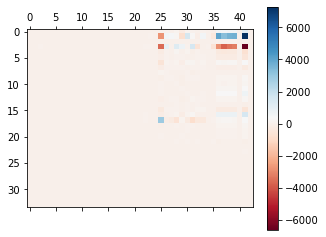

In [19]:
G = X_prima.dot( Omega_pinv)
plt.matshow(G, cmap=plt.cm.RdBu)
plt.colorbar()
plt.show()
plt.matshow(G.iloc[:5,:5], cmap=plt.cm.RdBu)
plt.colorbar()
plt.show()

Step 1
------

$$\Omega = \tilde U \tilde \Sigma \tilde V^* $$

In [20]:
%%time
U_tilde,kS_tilde,V_tilde_star = np.linalg.svd(Omega,
                          full_matrices=False)

#kS = np.einsum('ij,j->ij',
#                              np.identity(len(Sigma)),
#                              Sigma
#                             )
Sigma_tilde = pd.DataFrame(np.diag(kS_tilde),
                      index=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                      columns=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                     )

V_tilde_star = pd.DataFrame(V_tilde_star,
                            columns=Omega.columns,
                            index=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                           )

U_tilde = pd.DataFrame(U_tilde,index=Omega.index,
                      columns=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],)



print("{} = {}·{}·{}".format(Omega.shape,U_tilde.shape,Sigma_tilde.shape,V_tilde_star.shape))

(43, 367) = (43, 43)·(43, 43)·(43, 367)
CPU times: user 15.6 ms, sys: 9.19 ms, total: 24.8 ms
Wall time: 3.83 ms


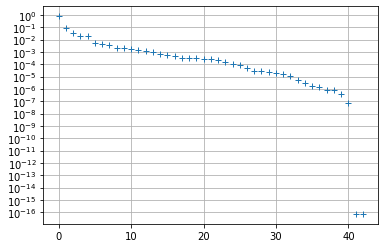

In [21]:
plt.plot(kS_tilde/kS_tilde.sum(),'+')

plt.yscale('symlog', linthresh=1.e-29)
#plt.xscale('symlog', linthreshx=50)
#plt.xlim(-1,210)
plt.grid()

In [22]:
r_tilde=np.min([len(X_prima.columns),len(X_prima.index)])#205#33#25#41#65#11#43#33
corRed_tilde = ['$P_{{{}}}$'.format(i) for i in range(r_tilde)]

Step 2
-------
$$ G_{nx(n+q)} = X'\Omega^\dagger = X' \tilde V \tilde \Sigma^{-1}\tilde U^*$$

$$ [{A}_{nxn},B_{nxq}] = [ X' \tilde V \tilde \Sigma^{-1}\tilde U^*_1, X' \tilde V \tilde \Sigma^{-1}\tilde U^*_2]$$

In [23]:
U_tilde

$P_{0}$   $P_{1}$  \
Casos                                             -0.093957 -0.237862   
test coresp                                       -0.691870 -0.326387   
Tasa de positividad (%)                           -0.002749  0.000111   
Nº de pacientes a los que se ha realizado pruebas -0.630135 -0.005165   
Asintomáticos                                     -0.047395 -0.130451   
Asintomáticos (%)                                 -0.010926  0.022399   
Zaragoza                                          -0.065755 -0.148943   
Zaragoza (%)                                      -0.015930  0.042416   
1 a 14 años                                       -0.011268 -0.022563   
15 a 24 años                                      -0.014434 -0.033921   
25 a 34 años                                      -0.011595 -0.030291   
35 a 44 años                                      -0.012275 -0.029158   
45 a 54 años                                      -0.013308 -0.033381   
55 a 64 años                                      -0.010811 -0.031338   
65 a 74 años                                      -0.006408 -0.017382   
75 años o más                                     -0.009387 -0.027763   
Camas Ocup                                        -0.100321 -0.059196   
Camas libres                                      -0.303597  0.872060   
Camas (%)                                         -0.007692 -0.009400   
UCI ocupadas                                      -0.014053  0.012512   
UCI libres con resp                               -0.017203  0.059741   
UCI (%)                                           -0.021069 -0.009777   
Rs                                                -0.000242  0.000331   
Rd                                                -0.000246  0.000504   
Inoculados                                        -0.019645  0.038797   
Total Casos                                       -0.020545  0.046263   
Total Casos 1 a 14 años                           -0.020776  0.047063   
Total Casos 15 a 24 años                          -0.020095  0.044790   
Total Casos 25 a 34 años                          -0.020413  0.045866   
Total Casos 35 a 44 años                          -0.020671  0.046756   
Total Casos 45 a 54 años                          -0.020546  0.046285   
Total Casos 55 a 64 años                          -0.020601  0.046521   
Total Casos 65 a 74 años                          -0.020849  0.047438   
Total Casos 75 años o más                         -0.020506  0.046154   
Alarma                                            -0.000233  0.000305   
Festivo                                           -0.000011  0.000027   
NoLaboral                                         -0.000070  0.000187   
Laboral                                           -0.000152  0.000332   
NoLectivo                                         -0.000118  0.000418   
Lectivo                                           -0.000104  0.000102   
Reuniones                                         -0.000061  0.000706   
Bias                                              -0.000222  0.000519   
Vacunas                                           -0.001003  0.004426   

                                                    $P_{2}$   $P_{3}$  \
Casos                                             -0.207007  0.026041   
test coresp                                       -0.348428 -0.438377   
Tasa de positividad (%)                           -0.003679  0.001102   
Nº de pacientes a los que se ha realizado pruebas  0.407319  0.656783   
Asintomáticos                                     -0.124496 -0.003409   
Asintomáticos (%)                                 -0.002466 -0.012489   
Zaragoza                                          -0.145224  0.009676   
Zaragoza (%)                                      -0.001176 -0.001118   
1 a 14 años                                       -0.033605 -0.008707   
15 a 24 años                                      -0.167367  0.168801   
25 a 34 años                        

In [24]:
%%time
U_tilde_r = U_tilde.loc[:,corRed_tilde]
Sigma_tilde_r = Sigma_tilde.loc[corRed_tilde,corRed_tilde]

Sigma_tilde_inv = pd.DataFrame(np.einsum('ij,j->ij',
                              np.identity(len(kS_tilde)),
                              1./kS_tilde
                             ),
                      index=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                      columns=['$P_{{{}}}$'.format(i) for i in range(len(kS_tilde))],
                     )

Sigma_tilde_inv_r = Sigma_tilde_inv.loc[corRed_tilde,corRed_tilde]
V_tilde = V_tilde_star.T
V_tilde_r = V_tilde.loc[:,corRed_tilde]

U_tilde_1 = U_tilde.loc[X_prima.index]
U_tilde_2 = U_tilde.loc[['Alarma']]
U_tilde_1_r = U_tilde_1.loc[:,corRed_tilde]
U_tilde_2_r = U_tilde_2.loc[:,corRed_tilde]

CPU times: user 2.05 ms, sys: 321 µs, total: 2.37 ms
Wall time: 2.1 ms


In [25]:
%%time
G = X_prima.dot(V_tilde_r).dot(Sigma_tilde_inv_r).dot(U_tilde_r.T)
G

CPU times: user 73 ms, sys: 2.66 ms, total: 75.6 ms
Wall time: 11.3 ms


Casos  test coresp  \
Casos                                              1.280644    -0.010075   
test coresp                                       -1.955033     0.748249   
Tasa de positividad (%)                            0.006449     0.000636   
Nº de pacientes a los que se ha realizado pruebas  3.387561     0.005419   
Asintomáticos                                      0.141147    -0.016269   
Asintomáticos (%)                                  0.011529     0.001220   
Zaragoza                                           0.351819    -0.006886   
Zaragoza (%)                                      -0.000322    -0.001175   
1 a 14 años                                        0.020605    -0.002356   
15 a 24 años                                       0.070471     0.004879   
25 a 34 años                                       0.035614    -0.000836   
35 a 44 años                                       0.023677    -0.001012   
45 a 54 años                                       0.076808    -0.000934   
55 a 64 años                                       0.060135    -0.001686   
65 a 74 años                                       0.065032     0.000047   
75 años o más                                      0.093446    -0.007997   
Camas Ocup                                         0.096060     0.015477   
Camas libres                                       0.161408     0.001856   
Camas (%)                                          0.024089     0.001012   
UCI ocupadas                                       0.044057     0.003623   
UCI libres con resp                               -0.001052    -0.001553   
UCI (%)                                            0.123421     0.005746   
Rs                                                 0.000054    -0.000027   
Rd                                                -0.002153     0.000060   
Inoculados                                         0.000202    -0.000042   
Total Casos                                       -0.000128    -0.000001   
Total Casos 1 a 14 años                            0.000475    -0.000028   
Total Casos 15 a 24 años                          -0.000079     0.000021   
Total Casos 25 a 34 años                          -0.000669    -0.000008   
Total Casos 35 a 44 años                          -0.000582     0.000043   
Total Casos 45 a 54 años                          -0.001272     0.000028   
Total Casos 55 a 64 años                          -0.000130     0.000033   
Total Casos 65 a 74 años                           0.000214     0.000015   
Total Casos 75 años o más                          0.001452    -0.000023   

                                                   Tasa de positividad (%)  \
Casos                                                             2.099429   
test coresp                                                      -5.818480   
Tasa de positividad (%)                                           1.030976   
Nº de pacientes a los que se ha realizado pruebas                22.723133   
Asintomáticos                                                     0.936107   
Asintomáticos (%)                                                 0.533676   
Zaragoza                                                          0.794741   
Zaragoza (%)                                                     -0.427881   
1 a 14 años                                                       0.378786   
15 a 24 años                                                      1.235150   
25 a 34 años                                                      0.471903   
35 a 44 años                                                      0.728975   
45 a 54 años                                                      0.634811   
55 a 64 años                                                      0.491605   
65 a 74 años                                                      0.241487   
75 años o más                                                    -1.631370   
Camas Ocup                                                        3

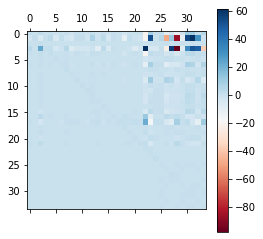

Casos  test coresp  \
Casos                                              1.280644    -0.010075   
test coresp                                       -1.955033     0.748249   
Tasa de positividad (%)                            0.006449     0.000636   
Nº de pacientes a los que se ha realizado pruebas  3.387561     0.005419   
Asintomáticos                                      0.141147    -0.016269   
Asintomáticos (%)                                  0.011529     0.001220   
Zaragoza                                           0.351819    -0.006886   
Zaragoza (%)                                      -0.000322    -0.001175   
1 a 14 años                                        0.020605    -0.002356   
15 a 24 años                                       0.070471     0.004879   
25 a 34 años                                       0.035614    -0.000836   
35 a 44 años                                       0.023677    -0.001012   
45 a 54 años                                       0.076808    -0.000934   
55 a 64 años                                       0.060135    -0.001686   
65 a 74 años                                       0.065032     0.000047   
75 años o más                                      0.093446    -0.007997   
Camas Ocup                                         0.096060     0.015477   
Camas libres                                       0.161408     0.001856   
Camas (%)                                          0.024089     0.001012   
UCI ocupadas                                       0.044057     0.003623   
UCI libres con resp                               -0.001052    -0.001553   
UCI (%)                                            0.123421     0.005746   
Rs                                                 0.000054    -0.000027   
Rd                                                -0.002153     0.000060   
Inoculados                                         0.000202    -0.000042   
Total Casos                                       -0.000128    -0.000001   
Total Casos 1 a 14 años                            0.000475    -0.000028   
Total Casos 15 a 24 años                          -0.000079     0.000021   
Total Casos 25 a 34 años                          -0.000669    -0.000008   
Total Casos 35 a 44 años                          -0.000582     0.000043   
Total Casos 45 a 54 años                          -0.001272     0.000028   
Total Casos 55 a 64 años                          -0.000130     0.000033   
Total Casos 65 a 74 años                           0.000214     0.000015   
Total Casos 75 años o más                          0.001452    -0.000023   

                                                   Tasa de positividad (%)  \
Casos                                                             2.099429   
test coresp                                                      -5.818480   
Tasa de positividad (%)                                           1.030976   
Nº de pacientes a los que se ha realizado pruebas                22.723133   
Asintomáticos                                                     0.936107   
Asintomáticos (%)                                                 0.533676   
Zaragoza                                                          0.794741   
Zaragoza (%)                                                     -0.427881   
1 a 14 años                                                       0.378786   
15 a 24 años                                                      1.235150   
25 a 34 años                                                      0.471903   
35 a 44 años                                                      0.728975   
45 a 54 años                                                      0.634811   
55 a 64 años                                                      0.491605   
65 a 74 años                                                      0.241487   
75 años o más                                                    -1.631370   
Camas Ocup                                                        3

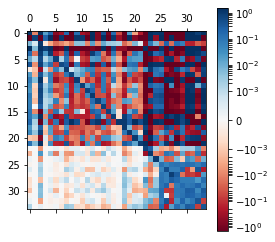

In [26]:
A = G.loc[:,celdas]
B = G.loc[:,entradas]
#D = G.loc[:,salidas]
#A_tilde[:11,:11].round(0).astype(int)

#import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.matshow(A, cmap=plt.cm.RdBu)#, vmin=-100.0, vmax=100.0)
plt.colorbar()
plt.show()
plt.matshow(A, cmap=plt.cm.RdBu,norm=colors.SymLogNorm(linthresh=1.e-3, linscale=1.0,
                                              vmin=-1.5, vmax=1.5))
plt.colorbar()
A

In [27]:
%%time
U_hat,kS_hat,V_hat_star = np.linalg.svd(X_prima,
                          full_matrices=False)

#kS = np.einsum('ij,j->ij',
#                              np.identity(len(Sigma)),
#                              Sigma
#                             )
Sigma_hat = pd.DataFrame(np.diag(kS_hat),
                      index=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                      columns=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                     )

V_hat_star = pd.DataFrame(V_hat_star,
                            columns=X_prima.columns,
                            index=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                           )

U_hat = pd.DataFrame(U_hat,index=X_prima.index,
                      columns=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],)

V_hat = V_hat_star.T


print("{} = {}·{}·{}".format(X_prima.shape,U_hat.shape,Sigma_hat.shape,V_hat_star.shape))
#plt.plot(Sigma/np.sum(Sigma),'+')
plt.plot(kS_hat/kS_hat.sum(),'+')

plt.yscale('symlog', linthresh=1.e-22)
#plt.xscale('symlog', linthreshx=50)
#plt.xlim(-1,200)
plt.grid()

(34, 367) = (34, 34)·(34, 34)·(34, 367)
CPU times: user 50.8 ms, sys: 30.2 ms, total: 81.1 ms
Wall time: 13 ms


In [28]:
#GOTO0
thresh = 1e-6#6
#np.where(kS_hat/kS_hat.sum()<thresh)[0][0]
try:
    print(np.where(kS_hat/kS_hat.sum()<thresh)[0][0])#7#33#25#41#65#11#43#33  )
except:
    print(len(kS_hat))

32


In [29]:
r=len(kS_hat)
try:
    r = np.where(kS_hat/kS_hat.sum()<thresh)[0][0]#7#33#25#41#65#11#43#33  
except:
    r=len(kS_hat)
corRed = ['$\tilde x^{{{}}}$'.format(i) for i in range(r)]
U_hat.loc[:,corRed]

$\tilde x^{0}$  \
Casos                                                   -0.093946   
test coresp                                             -0.691802   
Tasa de positividad (%)                                 -0.002748   
Nº de pacientes a los que se ha realizado pruebas       -0.630217   
Asintomáticos                                           -0.047378   
Asintomáticos (%)                                       -0.010924   
Zaragoza                                                -0.065743   
Zaragoza (%)                                            -0.015933   
1 a 14 años                                             -0.011272   
15 a 24 años                                            -0.014436   
25 a 34 años                                            -0.011592   
35 a 44 años                                            -0.012275   
45 a 54 años                                            -0.013306   
55 a 64 años                                            -0.010805   
65 a 74 años                                            -0.006405   
75 años o más                                           -0.009383   
Camas Ocup                                              -0.100212   
Camas libres                                            -0.303632   
Camas (%)                                               -0.007686   
UCI ocupadas                                            -0.014045   
UCI libres con resp                                     -0.017226   
UCI (%)                                                 -0.021038   
Rs                                                      -0.000242   
Rd                                                      -0.000246   
Inoculados                                              -0.019626   
Total Casos                                             -0.020545   
Total Casos 1 a 14 años                                 -0.020776   
Total Casos 15 a 24 años                                -0.020092   
Total Casos 25 a 34 años                                -0.020412   
Total Casos 35 a 44 años                                -0.020672   
Total Casos 45 a 54 años                                -0.020546   
Total Casos 55 a 64 años                                -0.020602   
Total Casos 65 a 74 años                                -0.020851   
Total Casos 75 años o más                               -0.020507   

                                                   $\tilde x^{1}$  \
Casos                                                   -0.237753   
test coresp                                             -0.326507   
Tasa de positividad (%)                                  0.000101   
Nº de pacientes a los que se ha realizado pruebas       -0.004927   
Asintomáticos                                           -0.130449   
Asintomáticos (%)                                        0.022390   
Zaragoza                                                -0.148954   
Zaragoza (%)                                             0.042421   
1 a 14 años                                             -0.022494   
15 a 24 años                                            -0.033887   
25 a 34 años                                            -0.030299   
35 a 44 años                                            -0.029129   
45 a 54 años                                            -0.033374   
55 a 64 años                                            -0.031361   
65 a 74 años                                            -0.017403   
75 años o más                                           -0.027768   
Camas Ocup                                              -0.060250   
Camas libres                                             0.871995   
Camas (%)                                               -0.009456   
UCI ocupadas                                             0.012404   
UCI libres con resp                                      0.059915   
UCI (%)                                                 -0.010059   
Rs                                              

In [30]:
U_hat_r = U_hat.loc[:,corRed]
Sigma_hat_r = Sigma_hat.loc[corRed,corRed]

Sigma_hat_inv = pd.DataFrame(np.einsum('ij,j->ij',
                              np.identity(len(kS_hat)),
                              1./kS_hat
                             ),
                      index=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                      columns=['$\tilde x^{{{}}}$'.format(i) for i in range(len(kS_hat))],
                     )

Sigma_hat_inv_r = Sigma_hat_inv.loc[corRed,corRed]
V_hat =   V_hat_star.T
V_hat_r = V_hat.loc[:,corRed]

$$ \tilde A \tilde = \hat U_r ^* X' \tilde V \tilde \Sigma^{-1} \tilde U_1^* \hat U_r$$
$$ \tilde B \tilde = \hat U_r ^* X' \tilde V \tilde \Sigma^{-1} \tilde U_2^* $$

$$\tilde x_{k+1} = \tilde A\tilde x_k + \tilde B u_k $$
$$ Con: x  \tilde = \hat U_r \tilde x; \tilde x = \hat U_r^* x$$

$$ x_{k+1} = A_{nxn}x_k+B_{nx1}u_k $$

$$\tilde x_{k+1} = \tilde A_{rxr}\tilde x_k + \tilde B_{rx1} u_k $$

$$ x_{k+1} \tilde = \hat U_{nxr} \tilde x_{k+1} $$

In [31]:
A_tilde = U_hat_r.T.dot(A).dot(U_hat_r.loc[celdas])
B_tilde = U_hat_r.T.dot(B)

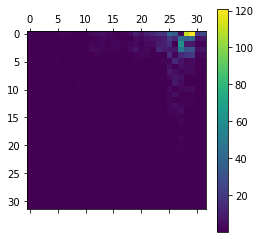

In [32]:
plt.matshow(np.absolute(A_tilde))#, cmap=plt.cm.RdBu)#, vmin=-100.0, vmax=100.0)
plt.colorbar()
plt.show()
plt.matshow(A_tilde, cmap=plt.cm.RdBu,norm=colors.SymLogNorm(linthresh=1.e-3, linscale=1.0,
                                              vmin=-1.5, vmax=1.5))
plt.colorbar()

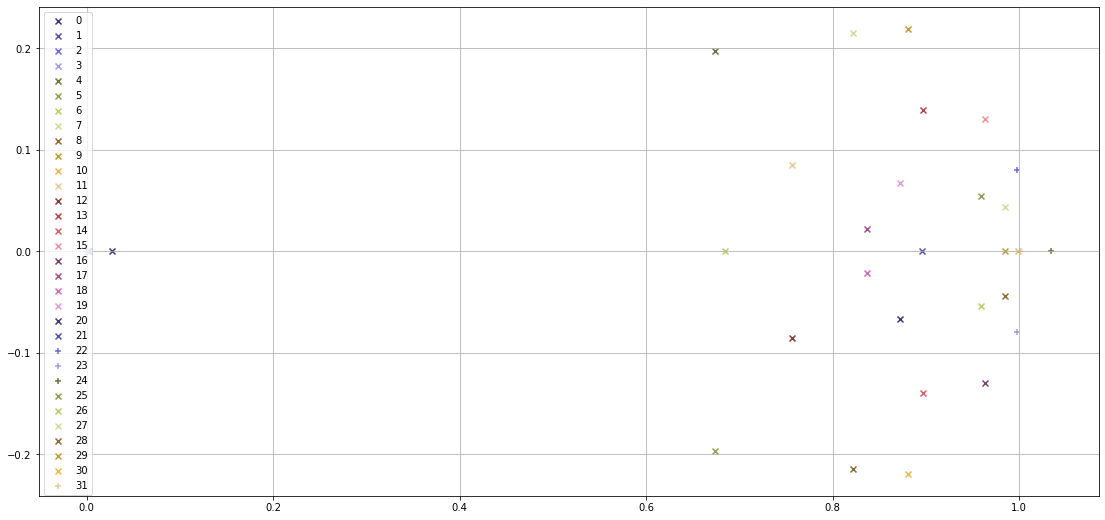

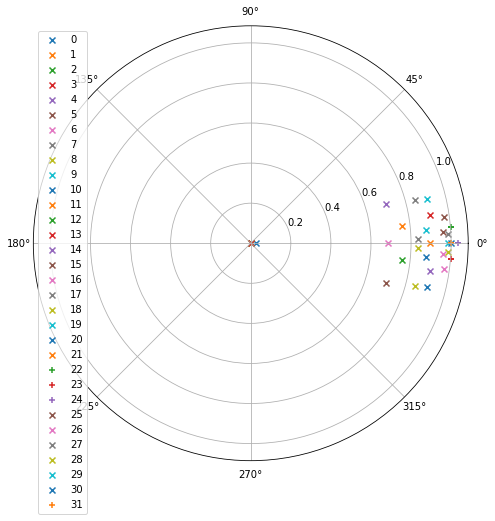

In [33]:
Lambda,W = np.linalg.eig(A_tilde)
colores = plt.cm.tab20b.colors
colores = colores + colores

fig = plt.figure(figsize=(19,9))
for i in range(len(Lambda)):
    if np.abs(Lambda[i]) >= 1:
        plt.scatter(Lambda[i].real,Lambda[i].imag,color=colores[i],label=i,marker='+')
    else:    
        plt.scatter(Lambda[i].real,Lambda[i].imag,color=colores[i],label=i,marker='x')
plt.legend(loc=2)
plt.grid()
plt.show()

#fig, ax = plt.subplots(figsize=(9, 9))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='polar')
j = 0
for i in Lambda:
    if np.abs(i) > 1:
        ax.scatter([np.angle(i)],[np.abs(i)],marker='+',label=j)
    else:
        ax.scatter([np.angle(i)],[np.abs(i)],marker='x',label=j)
    j+=1
plt.legend(loc=2)
plt.show()

In [34]:
X_interp = A.dot(Omega.loc[celdas])
puntos_int = X_interp.T.shift(1)
display(puntos.shift(-1).tail())
display(puntos_int.tail())

Día de la semana       Casos  test coresp  \
Fecha                                                   
2021-09-08               4.0  134.714286  1772.571429   
2021-09-09               4.0  129.428571  1770.000000   
2021-09-10               4.0  116.571429  1746.000000   
2021-09-11               4.0  109.285714  1720.571429   
2021-09-12               NaN         NaN          NaN   

            Nº de pacientes a los que se ha realizado pruebas  \
Fecha                                                           
2021-09-08                                        1814.428571   
2021-09-09                                        1702.285714   
2021-09-10                                        1649.571429   
2021-09-11                                        1628.714286   
2021-09-12                                                NaN   

            Tasa de positividad (%)  Asintomáticos   Zaragoza  1 a 14 años  \
Fecha                                                                        
2021-09-08                 7.757143      76.827143  91.285714    22.142857   
2021-09-09                 7.491429      70.471429  87.714286    23.000000   
2021-09-10                 6.688571      61.000000  81.428571    22.142857   
2021-09-11                 6.052857      55.144286  78.142857    22.285714   
2021-09-12                      NaN            NaN        NaN          NaN   

            15 a 24 años  25 a 34 años  ...  Inoculados  Total Casos  \
Fecha                                   ...                            
2021-09-08     13.142857     12.285714  ...   45.199838    87.908041   
2021-09-09     13.142857     12.142857  ...   44.965853    87.898231   
2021-09-10     12.142857     10.857143  ...   44.731868    87.889395   
2021-09-11     11.857143     10.142857  ...   44.449195    87.881111   
2021-09-12           NaN           NaN  ...         NaN          NaN   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Fecha                                                           
2021-09-08                89.177183                 81.383648   
2021-09-09                89.164720                 81.373037   
2021-09-10                89.152721                 81.363234   
2021-09-11                89.140645                 81.353662   
2021-09-12                      NaN                       NaN   

            Total Casos 25 a 34 años  Total Casos 35 a 44 años  \
Fecha                                                            
2021-09-08                 86.293472                 89.220720   
2021-09-09                 86.284903                 89.210820   
2021-09-10                 86.277241                 89.201489   
2021-09-11                 86.270084                 89.192515   
2021-09-12                       NaN                       NaN   

            Total Casos 45 a 54 años  Total Casos 55 a 64 años  \
Fecha                                                            
2021-09-08                 88.741037                 89.315662   
2021-09-09                 88.732722                 89.309603   
2021-09-10                 88.724684                 89.303867   
2021-09-11                 88.716924                 89.298373   
2021-09-12                       NaN                       NaN   

            Total Casos 65 a 74 años  Total Casos 75 años o más  
Fecha                                                            
2021-09-08                 91.264936                  89.141962  
2021-09-09                 91.259863                  89.128286  
2021-09-10                 91.255847                  89.118314  
2021-09-11                 91.251937                  89.110621  
2021-09-12                       NaN                        NaN  

[5 rows x 50 columns]

Casos  test coresp  Tasa de positividad (%)  \
Fecha                                                          
2021-09-08  159.945155  1978.343069                 8.022258   
2021-09-09  154.641433  2011.143055                 7.597855   
2021-09-10  146.869802  2025.569895                 7.001548   
2021-09-11  142.754974  1985.258313                 6.870958   
2021-09-12  133.912543  1962.869519                 6.660317   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
Fecha                                                                          
2021-09-08                                        1844.343733      92.661194   
2021-09-09                                        1857.532232      90.413942   
2021-09-10                                        1912.227246      91.367948   
2021-09-11                                        1883.515660      89.620466   
2021-09-12                                        1801.240231      79.038712   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
Fecha                                                                  
2021-09-08          56.287432  101.101414     65.269038    28.209901   
2021-09-09          56.540775   99.647835     66.476510    26.535702   
2021-09-10          58.874473   94.821783     66.371487    24.980906   
2021-09-11          59.166293   92.402120     66.815640    23.137089   
2021-09-12          55.936057   85.247874     66.688206    23.123318   

            15 a 24 años  ...  Inoculados  Total Casos  \
Fecha                     ...                            
2021-09-08     27.209438  ...   45.842573    87.922063   
2021-09-09     26.086786  ...   45.595797    87.907338   
2021-09-10     24.664613  ...   45.356156    87.895170   
2021-09-11     22.458607  ...   45.122412    87.882641   
2021-09-12     23.226735  ...   44.889009    87.873774   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Fecha                                                           
2021-09-08                89.138655                 81.405819   
2021-09-09                89.125190                 81.391562   
2021-09-10                89.111933                 81.379206   
2021-09-11                89.103978                 81.367914   
2021-09-12                89.096965                 81.357105   

            Total Casos 25 a 34 años  Total Casos 35 a 44 años  \
Fecha                                                            
2021-09-08                 86.286675                 89.215644   
2021-09-09                 86.278559                 89.204661   
2021-09-10                 86.266425                 89.195544   
2021-09-11                 86.256288                 89.184801   
2021-09-12                 86.250280                 89.174884   

            Total Casos 45 a 54 años  Total Casos 55 a 64 años  \
Fecha                                                            
2021-09-08                 88.787894                 89.343179   
2021-09-09                 88.774004                 89.331838   
2021-09-10                 88.760034                 89.323108   
2021-09-11                 88.743108                 89.311116   
2021-09-12                 88.737062                 89.296861   

            Total Casos 65 a 74 años  Total Casos 75 años o más  
Fecha                                                            
2021-09-08                 91.254265                  89.149884  
2021-09-09                 91.247836                  89.137968  
2021-09-10                 91.241421                  89.122614  
2021-09-11                 91.235851                  89.116491  
2021-09-12                 91.233410                  89.118127  

[5 rows x 34 columns]

In [35]:
#for i in variables:
#    fig, ax = plt.subplots(figsize=(15,6))
#    #Omega.T[[i]].plot(ax=ax,label='{} interpolado'.format(i))
#    X_prima.T[[i]].plot(ls='-',ax=ax,label='{} interpolado'.format(i))
#    X_interp.T[[i]].plot(ls='--',ax=ax,label='{} interpolado'.format(i))
#    plt.grid()
#    plt.legend()
#    plt.show()

In [36]:
(X_interp-X_prima).divide(X_prima/100.).T.describe()

Casos  test coresp  Tasa de positividad (%)  \
count  367.000000   367.000000               367.000000   
mean     7.144131     6.901512                -1.332571   
std      6.350100     3.493547                 4.012294   
min     -8.504529    -4.715706               -14.445726   
25%      2.623874     4.672689                -4.067514   
50%      6.217397     6.551877                -1.149773   
75%     11.035500     8.546130                 1.430443   
max     28.683437    23.961264                12.023462   

       Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
count                                         367.000000     367.000000   
mean                                            4.828621      12.689645   
std                                             4.315761      11.223657   
min                                            -8.122523      -8.691257   
25%                                             2.311131       4.685218   
50%                                             4.243423      10.569002   
75%                                             7.014196      18.083419   
max                                            23.506996      56.194951   

       Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  15 a 24 años  \
count         367.000000  367.000000    367.000000   367.000000    367.000000   
mean            3.691778    4.440047     -1.335228     5.008599     36.247542   
std             3.781314    5.786167      1.760342     7.126858     25.380035   
min            -4.816620  -13.005423     -8.676507   -14.548715     -7.785284   
25%             1.186770    0.817967     -2.192401     0.653390     14.791150   
50%             3.399347    3.873628     -1.320579     4.388451     31.633779   
75%             6.055019    7.995265     -0.407525     8.852995     57.693071   
max            20.387955   23.742937      8.391083    31.730828    109.517493   

       ...  Inoculados  Total Casos  Total Casos 1 a 14 años  \
count  ...  367.000000   367.000000               367.000000   
mean   ...    0.145548    -0.012892                -0.057202   
std    ...    0.201902     0.008325                 0.025606   
min    ...   -0.058801    -0.031949                -0.124783   
25%    ...   -0.006453    -0.016455                -0.074829   
50%    ...    0.045672    -0.013066                -0.055098   
75%    ...    0.300460    -0.009433                -0.037477   
max    ...    0.723723     0.111318                 0.031593   

       Total Casos 15 a 24 años  Total Casos 25 a 34 años  \
count                367.000000                367.000000   
mean                  -0.004362                 -0.015698   
std                    0.018505                  0.017990   
min                   -0.040670                 -0.059252   
25%                   -0.015525                 -0.024137   
50%                   -0.000740                 -0.013845   
75%                    0.007276                 -0.004382   
max                    0.108366                  0.125970   

       Total Casos 35 a 44 años  Total Casos 45 a 54 años  \
count                367.000000                367.000000   
mean                  -0.022687                  0.031544   
std                    0.016033                  0.038183   
min                   -0.055905                 -0.037807   
25%                   -0.033561                  0.001180   
50%                   -0.026117                  0.019414   
75%                   -0.011492                  0.069038   
max                    0.080265                  0.156269   

       Total Casos 55 a 64 años  Total Casos 65 a 74 años  \
count                367.000000                367.000000   
mean                   0.007688                 -0.033792   
std                    0.023385                  0.016120   
min                   -0.042331                 -0.070669   
25%                   -0.010630                 -0.045136   
50%                    0.009624

In [37]:
x1 = puntos[variables].T.iloc[:,-12]
display(x1)
display(puntos[variables].T.iloc[:,-11])
A.dot(x1)

Casos                                                 176.428571
test coresp                                          1915.428571
Tasa de positividad (%)                                 9.038571
Nº de pacientes a los que se ha realizado pruebas    1673.285714
Asintomáticos                                          81.127143
Asintomáticos (%)                                      46.857143
Zaragoza                                              104.285714
Zaragoza (%)                                           58.662942
1 a 14 años                                            33.285714
15 a 24 años                                           18.571429
25 a 34 años                                           18.285714
35 a 44 años                                           20.714286
45 a 54 años                                           20.714286
55 a 64 años                                           13.142857
65 a 74 años                                            6.857143
75 años o más            

Casos                                                 172.428571
test coresp                                          1898.285714
Tasa de positividad (%)                                 8.928571
Nº de pacientes a los que se ha realizado pruebas    1662.000000
Asintomáticos                                          78.077143
Asintomáticos (%)                                      46.428571
Zaragoza                                              103.857143
Zaragoza (%)                                           59.772346
1 a 14 años                                            31.000000
15 a 24 años                                           19.142857
25 a 34 años                                           15.571429
35 a 44 años                                           20.714286
45 a 54 años                                           19.428571
55 a 64 años                                           13.714286
65 a 74 años                                            7.571429
75 años o más            

Casos                                                 183.715255
test coresp                                          2053.227260
Tasa de positividad (%)                                 8.670761
Nº de pacientes a los que se ha realizado pruebas    1823.029204
Asintomáticos                                          89.212220
Asintomáticos (%)                                      49.825203
Zaragoza                                              103.518506
Zaragoza (%)                                           57.863747
1 a 14 años                                            32.022599
15 a 24 años                                           30.836611
25 a 34 años                                           19.293487
35 a 44 años                                           19.875692
45 a 54 años                                           18.276647
55 a 64 años                                           11.257742
65 a 74 años                                            6.990366
75 años o más            

Alarma  Festivo  Reuniones  VacunasD  Vacunas  Casos  Lectivo
2021-08-29     1.0      0.0        0.0     0.005    0.028   69.0      0.0
2021-08-30     1.0      0.0        0.0     2.440    4.803  148.0      0.0
2021-08-31     1.0      0.0        0.0     7.122    9.370  219.0      0.0
2021-09-01     1.0      0.0        0.0    11.418   17.933  201.0      0.0
2021-09-02     1.0      0.0        0.0     9.476   16.574  189.0      0.0
2021-09-03     1.0      0.0        0.0     5.187    0.000  153.0      0.0
2021-09-04     1.0      0.0        0.0     0.000    0.000  150.0      0.0
2021-09-05     1.0      0.0        0.0     0.003    0.000   82.0      0.0
2021-09-06     1.0      0.0        0.0     1.448    8.211  127.0      0.0
2021-09-07     1.0      0.0        0.0     4.818   13.120  173.0      0.0
2021-09-08     1.0      0.0        0.0     9.867   16.789  121.0      0.0
2021-09-09     1.0      0.0        0.0     7.186   14.821  137.0      0.0
2021-09-10     1.0      0.0        7.0     4.692    0.000  116.0      0.0
2021-09-11     1.0      0.0        7.0     0.000    0.000   60.0      0.0
2021-09-12     1.0      0.0        0.0     0.000   11.016   31.0      0.0
2021-09-13     0.0      0.0        0.0     0.926    4.264  121.0      1.0
2021-09-14     0.0      0.0        0.0     3.094    7.745   83.0      1.0
2021-09-15     0.0      0.0        0.0     8.176   13.822  128.0      1.0
2021-09-16     0.0      0.0        0.0     0.037   12.277   86.0      1.0
2021-09-17     0.0      0.0        0.0     7.677    7.676   92.0      1.0
2021-09-18     0.0      0.0        0.0     0.000    0.000   61.0      0.0
2021-09-19     0.0      0.0        0.0       NaN    0.005   51.0      0.0
2021-09-20     0.0      0.0        0.0       NaN    2.440   89.0      1.0
2021-09-21     0.0      0.0        0.0       NaN    7.122  130.0      1.0
2021-09-22     0.0      0.0        0.0       NaN   11.418   86.0      1.0
2021-09-23     0.0      0.0        0.0       NaN    9.476    NaN      1.0
2021-09-24     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-09-25     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-09-26     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-09-27     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-09-28     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-09-29     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-09-30     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-10-01     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-10-02     0.0      NaN        NaN       NaN      NaN    NaN      NaN
2021-10-03     0.0      NaN        NaN       NaN      NaN    NaN      NaN

Alarma  Festivo  NoLaboral   Laboral  NoLectivo   Lectivo  \
2021-09-04  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-05  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-06  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-07  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-08  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-09  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-10  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-11  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-12  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-13  0.857143      0.0   0.285714  0.714286   0.857143  0.142857   
2021-09-14  0.714286      0.0   0.285714  0.714286   0.714286  0.285714   
2021-09-15  0.571429      0.0   0.285714  0.714286   0.571429  0.428571   
2021-09-16  0.428571      0.0   0.285714  0.714286   0.428571  0.571429   
2021-09-17  0.285714      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-18  0.142857      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-19  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-20  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-21  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-22  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-23  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-24  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-25  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-26  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-27  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-28  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-29  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-30  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-10-01  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-10-02  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-10-03  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   

            Reuniones  Bias   Vacunas  
2021-09-04        0.0   1.0  6.958286  
2021-09-05        0.0   1.0  6.954286  
2021-09-06        0.0   1.0  7.441143  
2021-09-07        0.0   1.0  7.976857  
2021-09-08        0.0   1.0  7.813429  
2021-09-09        0.0   1.0  7.563000  
2021-09-10        1.0   1.0  7.563000  
2021-09-11        2.0   1.0  7.563000  
2021-09-12        2.0   1.0  9.136714  
2021-09-13        2.0   1.0  8.572857  
2021-09-14        2.0   1.0  7.805000  
2021-09-15        2.0   1.0  7.381143  
2021-09-16        2.0   1.0  7.017714  
2021-09-17        2.0   1.0  8.114286  
2021-09-18        2.0   1.0  8.114286  
2021-09-19        2.0   1.0  6.541286  
2021-09-20        2.0   1.0  6.280714  
2021-09-21        2.0   1.0  6.191714  
2021-09-22        2.0   1.0  5.848286  
2021-09-23        2.0   1.0  5.448143  
2021-09-24        2.0   1.0  5.092571  
2021-09-25        2.0   1.0  5.092571  
2021-09-26        2.0   1.0  5.092286  
2021-09-27        2.0   1.0  4.950571  
2021-09-28        2.0   1.0  4.621429  
2021-09-29        2.0   1.0  4.399857  
2021-09-30        2.0   1.0  4.072714  
2021-10-01        1.0   1.0  4.002000  
2021-10-02        0.0   1.0  4.002000  
2021-10-03        0.0   1.0  4.001571

Alarma  Festivo  NoLaboral   Laboral  NoLectivo   Lectivo  \
2021-09-04  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-05  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-06  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-07  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-08  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-09  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-10  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-11  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-12  1.000000      0.0   0.285714  0.714286   1.000000  0.000000   
2021-09-13  0.857143      0.0   0.285714  0.714286   0.857143  0.142857   
2021-09-14  0.714286      0.0   0.285714  0.714286   0.714286  0.285714   
2021-09-15  0.571429      0.0   0.285714  0.714286   0.571429  0.428571   
2021-09-16  0.428571      0.0   0.285714  0.714286   0.428571  0.571429   
2021-09-17  0.285714      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-18  0.142857      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-19  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-20  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-21  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-22  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-23  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-24  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-25  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-26  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-27  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-28  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-29  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-09-30  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-10-01  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-10-02  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   
2021-10-03  0.000000      0.0   0.285714  0.714286   0.285714  0.714286   

            Reuniones  Bias   Vacunas  
2021-09-04        0.0   1.0  6.958286  
2021-09-05        0.0   1.0  6.954286  
2021-09-06        0.0   1.0  7.441143  
2021-09-07        0.0   1.0  7.976857  
2021-09-08        0.0   1.0  7.813429  
2021-09-09        0.0   1.0  7.563000  
2021-09-10        1.0   1.0  7.563000  
2021-09-11        2.0   1.0  7.563000  
2021-09-12        2.0   1.0  9.136714  
2021-09-13        2.0   1.0  8.572857  
2021-09-14        2.0   1.0  7.805000  
2021-09-15        2.0   1.0  7.381143  
2021-09-16        2.0   1.0  7.017714  
2021-09-17        2.0   1.0  8.114286  
2021-09-18        2.0   1.0  8.114286  
2021-09-19        2.0   1.0  6.541286  
2021-09-20        2.0   1.0  6.280714  
2021-09-21        2.0   1.0  6.191714  
2021-09-22        2.0   1.0  5.848286  
2021-09-23        2.0   1.0  5.448143  
2021-09-24        2.0   1.0  5.092571  
2021-09-25        2.0   1.0  5.092571  
2021-09-26        2.0   1.0  5.092286  
2021-09-27        2.0   1.0  4.950571  
2021-09-28        2.0   1.0  4.621429  
2021-09-29        2.0   1.0  4.399857  
2021-09-30        2.0   1.0  4.072714  
2021-10-01        1.0   1.0  4.002000  
2021-10-02        0.0   1.0  4.002000  
2021-10-03        0.0   1.0  4.001571

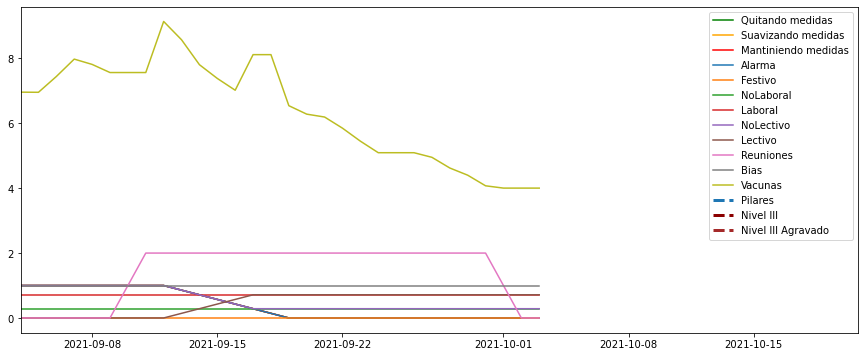

In [38]:
#x1 = puntos.loc[pd.date_range('2020-9-07',periods=83,freq='d')].copy()
x1 = puntos.loc['2020-10-21':].copy() #goto0
#x1 = puntos.loc['2020-10-7':].copy() #goto0
##x1 = puntos.loc['2020-10-1':].copy() #goto0
##x1 = puntos.loc['2020-11-1':].copy()
diasCalc = 21
x1 = puntos.iloc[-15:].copy()
#x1 = puntos.iloc[-29:].copy()
#x1 = puntos.iloc[-8:].copy()
#x1 = puntos.iloc[-1:].copy()


#x1 = puntos.loc['2021-7-1':].copy() 
U1 = x1[entradas]
U1 = total.loc[x1.index,['Alarma']]
U0 = pd.concat([U1,
    pd.DataFrame(np.ones(diasCalc)*0,index=pd.date_range(U1.index[-1]+pd.offsets.DateOffset(1),
                                   U1.index[-1]+pd.offsets.DateOffset(diasCalc)
                                  ),columns=['Alarma'])])
                                                   
U2 = pd.concat([U1,
    pd.DataFrame(np.ones(diasCalc)*0,index=pd.date_range(U1.index[-1]+pd.offsets.DateOffset(1),
                                   U1.index[-1]+pd.offsets.DateOffset(diasCalc)
                                  ),columns=['Alarma'])])
x1_0 = x1.iloc[7].copy()
U1 = pd.concat([U1,
    pd.DataFrame(np.ones(diasCalc)*0,index=pd.date_range(U1.index[-1]+pd.offsets.DateOffset(1),
                                   U1.index[-1]+pd.offsets.DateOffset(diasCalc)
                                  ),columns=['Alarma'])])
##U0.loc['2021-9-26':,'Alarma'] = 1
##U1.loc['2021-9-26':,'Alarma'] = 1
##U2.loc['2021-9-26':,'Alarma'] = 1
###
###U0.loc['2020-12-5':'2020-12-9','Alarma'] = 0
###U1.loc['2020-12-5':'2020-12-9','Alarma'] = 0
###U2.loc['2020-12-5':'2020-12-9','Alarma'] = 0
U0.Alarma.fillna(method="ffill",inplace=True)
U1.Alarma.fillna(method="ffill",inplace=True)
U2.Alarma.fillna(method="ffill",inplace=True)
#U0.Alarma.fillna(0,inplace=True)
#U1.Alarma.fillna(0,inplace=True)
#U2.Alarma.fillna(0,inplace=True)


#U1.Alarma = total.Alarma
#U0.Alarma = total.Alarma
#U2.Alarma = total.Alarma

#U1 = Al1.copy()
U1['Festivo'] = total['Festivo']
U0['Festivo'] = total['Festivo']
U2['Festivo'] = total['Festivo']

U1['Reuniones'] = total['Reuniones']
U0['Reuniones'] = total['Reuniones']
U2['Reuniones'] = total['Reuniones']

U1['VacunasD'] = total['VacunasD']
U0['VacunasD'] = total['VacunasD']
U2['VacunasD'] = total['VacunasD']


U1['Vacunas'] = total['Vacunas']
U0['Vacunas'] = total['Vacunas']
U2['Vacunas'] = total['Vacunas']

U1['Casos'] = total['Casos']
U0['Casos'] = total['Casos']
U2['Casos'] = total['Casos']




U1['Lectivo']   = total['Lectivo']

display(U1)

U1.Festivo.fillna(0,inplace=True)
#U1.loc['2021-04-23':'2021-04-24','Festivo']=1
U0['Festivo'] = U1.Festivo
U2['Festivo'] = U1.Festivo

U1.Reuniones.fillna(0,inplace=True)
U1.loc['2021-09-17':'2021-09-18','Reuniones']=7
U1.loc['2021-09-24':'2021-09-25','Reuniones']=7
U0['Reuniones'] = U1.Reuniones
U2['Reuniones'] = U1.Reuniones

for i in U0.index:
    if i in vacunasD.index:
        #display(i)
        U0.loc[i,'VacunasD'] = vacunasD.at[i,'Vacunas']
        U1.loc[i,'VacunasD'] = vacunasD.at[i,'Vacunas']
        U2.loc[i,'VacunasD'] = vacunasD.at[i,'Vacunas']
U0.VacunasD.fillna(1,inplace=True)
#U0.Vacunas = 0
U1.VacunasD.fillna(2,inplace=True)
U2.VacunasD.fillna(3,inplace=True)
for i in U0.index:
    if i in vacunas.index:
        #display(i)
        U0.loc[i,'Vacunas'] = vacunas.at[i,'Vacunas']
        U1.loc[i,'Vacunas'] = vacunas.at[i,'Vacunas']
        U2.loc[i,'Vacunas'] = vacunas.at[i,'Vacunas']
U0.Vacunas.fillna(12,inplace=True)
#U0.Vacunas = 0
U1.Vacunas.fillna(14,inplace=True)
U2.Vacunas.fillna(16,inplace=True)
U0.Casos.fillna(100,inplace=True)
U1.Casos.fillna(100,inplace=True)
U2.Casos.fillna(100,inplace=True)


U0.loc[:,'Inoculados'] = U0.Vacunas.cumsum()/2# + U0.Casos.cumsum()
U1.loc[:,'Inoculados'] = U1.Vacunas.cumsum()/2# + U1.Casos.cumsum()
U2.loc[:,'Inoculados'] = U2.Vacunas.cumsum()/2# + U2.Casos.cumsum()

U1.loc[:,'Laboral'] = 1 #- total.Festivo/7
U1.loc[U1[[(x.weekday()+1 > 5) for x in U1.index]].index,
       'Laboral' ] =0
U0['Laboral'] = U1.Laboral
U2['Laboral'] = U1.Laboral

U1.Lectivo.fillna(1,inplace=True)#llegan las vacaciones
U1.loc[U1[[(x.weekday()+1 > 5) for x in U1.index]].index,
       'Lectivo' ] =0
U1.loc['2021-06-21':'2021-09-08','Lectivo']=0 #vacaciones
U0['Lectivo'] = U1.Lectivo
U2['Lectivo'] = U1.Lectivo

U1.loc[:,'NoLectivo'] = 1-U1.Lectivo
U0.loc[:,'NoLectivo'] = U1.NoLectivo
U2.loc[:,'NoLectivo'] = U1.NoLectivo

U1.loc[:,'NoLaboral'] = 1-U1.Laboral
U0.loc[:,'NoLaboral'] = U1.NoLaboral
U2.loc[:,'NoLaboral'] = U1.NoLaboral

U0['Bias'] = 1
U1['Bias'] = 1
U2['Bias'] = 1


U0 = U0.rolling(7,center=False).mean().copy().dropna()
U1 = U1.rolling(7,center=False).mean().copy().dropna()
U2 = U2.rolling(7,center=False).mean().copy().dropna()

fig, ax = plt.subplots(figsize=(15,6))
#highlight_datetimes(pd.concat([diario.loc['2020-9-7':],U1]).index.unique(), ax,items=False)

plt.plot(U0.index,U0.Alarma,axes=ax,c='green',label='Quitando medidas')
plt.plot(U1.index,U1.Alarma,axes=ax,c='orange',label='Suavizando medidas')
plt.plot(U2.index,U2.Alarma,axes=ax,c='r',label='Mantiniendo medidas')
for i in entradas:
    plt.plot(U1.index,U1[i],axes=ax,label=i)
    
ax.axvline(pd.Timestamp('2020-10-12'),lw=3,ls='--',label='Pilares')
ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
plt.legend()
plt.xlim(left=U0.index[0])

display(U2[entradas],U1[entradas])

In [39]:
import control as ct

#C = np.identity(len(A_tilde.columns))
C = U_hat_r.loc[celdas]
D = np.zeros((len(A_tilde.columns),len(B_tilde.columns)))

In [40]:
fsys_A_tilde = ct.ss(A_tilde,B_tilde,C,np.zeros((len(C.index),len(B_tilde.columns))),1)

In [41]:
np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),x1[entradas].T.values
np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0,0,1]))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [42]:
%time
Ukk = U1.copy()
Ukk.Alarma=0
Ukk.Vacunas = 0
t,y,x = ct.forced_response(fsys_A_tilde,#return_x=True,
                           T=np.arange(len(Ukk.index)),   
                         return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(U1.index)),[0,0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=Ukk[entradas].T.values, 
                         #U=x1[[entradas]].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]).values)
noAction = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(noAction.T)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


Casos  test coresp  Tasa de positividad (%)  \
2021-09-04  163.142858  1853.857143                 8.805717   
2021-09-05  156.562756  1827.116405                 8.877487   
2021-09-06  150.418060  1786.552772                 8.929215   
2021-09-07  145.526723  1744.928231                 8.940125   
2021-09-08  141.895094  1709.783009                 8.890848   
2021-09-09  138.975144  1683.557074                 8.769565   
2021-09-10  135.960848  1665.254410                 8.571210   
2021-09-11  133.497212  1656.713797                 8.322194   
2021-09-12  131.195416  1654.447585                 8.031705   
2021-09-13  127.145579  1649.158213                 7.686103   
2021-09-14  119.994171  1641.814240                 7.249232   
2021-09-15  109.994071  1631.000365                 6.732346   
2021-09-16   97.406238  1615.380053                 6.148125   
2021-09-17   82.495527  1593.815680                 5.509488   
2021-09-18   65.533158  1565.390253                 4.829292   
2021-09-19   47.448452  1523.624836                 4.165208   
2021-09-20   27.872279  1465.957618                 3.527264   
2021-09-21    6.668526  1391.014654                 2.924074   
2021-09-22  -16.099067  1298.469228                 2.363463   
2021-09-23  -40.204331  1188.937664                 1.852422   
2021-09-24  -65.298428  1063.818665                 1.397098   
2021-09-25  -90.946570   925.114787                 1.002825   
2021-09-26 -116.659126   775.261110                 0.674192   
2021-09-27 -141.916515   616.974105                 0.415121   
2021-09-28 -166.188289   453.125731                 0.228959   
2021-09-29 -188.947303   286.642998                 0.118561   
2021-09-30 -209.680007   120.430584                 0.086367   
2021-10-01 -227.893811   -42.687023                 0.134464   
2021-10-02 -244.631867  -204.903912                 0.238643   
2021-10-03 -259.870770  -364.265649                 0.395787   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2021-09-04                                        1759.142857      85.181428   
2021-09-05                                        1627.323056      88.886165   
2021-09-06                                        1547.814901      90.068354   
2021-09-07                                        1501.294024      90.820943   
2021-09-08                                        1475.297920      92.113403   
2021-09-09                                        1460.008253      94.135830   
2021-09-10                                        1448.061197      96.610366   
2021-09-11                                        1440.583554      98.822167   
2021-09-12                                        1434.479799     100.622553   
2021-09-13                                        1420.502416     102.034590   
2021-09-14                                        1409.312409     101.758459   
2021-09-15                                        1400.081321      99.768714   
2021-09-16                                        1391.101402      96.097199   
2021-09-17                                        1380.545495      90.803477   
2021-09-18                                        1366.756726      83.962068   
2021-09-19                                        1335.328409      76.392632   
2021-09-20                                        1285.511131      67.806930   
2021-09-21                                        1218.408122      58.023665   
2021-09-22                                        1135.996701      46.985831   
2021-09-23                                        1040.706942      34.754157   
2021-09-24                                         935.147051      21.487948   
2021-09-25                                         821.931584       7.421380   
2021-09-26                                         703.582082      -7.159879   
2021-09-27                                         582.475867     -21.939209   
2021-09-28                      

In [43]:
%%time 
t,y,x = ct.forced_response(fsys_A_tilde,#return_x=True,
                           T=range(len(U1.index)),   
                         return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=U1[entradas].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]))


kControl = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(kControl.T)


t,y,x = ct.forced_response(fsys_A_tilde,#return_x=True,
                           T=range(len(U1.index)),   
                         return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=U0[entradas].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]))


rellaxed = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(rellaxed.T)


t,y,x = ct.forced_response(fsys_A_tilde,#return_x=True,
                           T=range(len(U1.index)),   
                         return_x=True,
                         #U=np.transpose(np.einsum('i,j->ij',np.ones(len(x1.index)),[0])),#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         U=U2[entradas].T,#[[273.15,0],[273.15,0]],#x1[['Tw','q']],
                         #interpolate=True,
                         #transpose=True,
                         X0=U_hat_r.loc[celdas].T.dot(x1_0[celdas]))


hard = pd.DataFrame(U_hat_r.loc[celdas].dot(x).values,index=celdas,columns=U1.index)
display(hard.T)

Casos  test coresp  Tasa de positividad (%)  \
2021-09-04  163.142858  1853.857143                 8.805717   
2021-09-05  154.625038  1805.464017                 8.589585   
2021-09-06  146.333781  1762.794888                 8.339184   
2021-09-07  138.362608  1725.026007                 8.070657   
2021-09-08  130.613573  1691.766743                 7.791160   
2021-09-09  122.527721  1661.371342                 7.495741   
2021-09-10  113.864245  1632.182709                 7.184036   
2021-09-11  106.084008  1607.700910                 6.886454   
2021-09-12   99.433707  1587.204834                 6.609141   
2021-09-13   93.497379  1566.397787                 6.357300   
2021-09-14   87.060106  1552.291707                 6.120280   
2021-09-15   80.674133  1543.748101                 5.900574   
2021-09-16   75.229624  1541.495303                 5.706006   
2021-09-17   71.405232  1547.081575                 5.539423   
2021-09-18   70.628430  1563.906919                 5.424659   
2021-09-19   73.426134  1587.431650                 5.399190   
2021-09-20   78.557218  1615.246465                 5.436597   
2021-09-21   85.590883  1643.153404                 5.488802   
2021-09-22   94.300299  1673.118029                 5.547836   
2021-09-23  104.108037  1705.146391                 5.604073   
2021-09-24  114.523432  1738.231405                 5.652934   
2021-09-25  125.148129  1770.821582                 5.694277   
2021-09-26  135.847039  1801.531536                 5.735470   
2021-09-27  146.385804  1828.852556                 5.782063   
2021-09-28  156.541678  1851.340841                 5.837833   
2021-09-29  166.131779  1867.676587                 5.905023   
2021-09-30  175.197280  1877.079819                 5.989115   
2021-10-01  183.701948  1878.969982                 6.092442   
2021-10-02  190.348017  1868.577572                 6.195611   
2021-10-03  194.865854  1845.673448                 6.298834   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2021-09-04                                        1759.142857      85.181428   
2021-09-05                                        1694.289336      82.542295   
2021-09-06                                        1646.076979      79.191926   
2021-09-07                                        1608.131310      75.340238   
2021-09-08                                        1576.926436      71.167390   
2021-09-09                                        1548.024611      66.899798   
2021-09-10                                        1520.636960      62.485076   
2021-09-11                                        1501.050615      57.568451   
2021-09-12                                        1488.503154      52.513066   
2021-09-13                                        1480.154231      47.454795   
2021-09-14                                        1472.143195      42.812863   
2021-09-15                                        1470.092251      38.647775   
2021-09-16                                        1477.834451      35.102968   
2021-09-17                                        1495.845296      32.500926   
2021-09-18                                        1528.190672      30.820053   
2021-09-19                                        1555.398729      31.436844   
2021-09-20                                        1573.160139      34.490988   
2021-09-21                                        1595.244622      38.652496   
2021-09-22                                        1618.088568      43.909413   
2021-09-23                                        1638.154641      50.161233   
2021-09-24                                        1654.125283      57.139032   
2021-09-25                                        1665.511111      64.533333   
2021-09-26                                        1673.064168      72.001166   
2021-09-27                                        1676.208303      79.370289   
2021-09-28                      

Casos  test coresp  Tasa de positividad (%)  \
2021-09-04  163.142858  1853.857143                 8.805717   
2021-09-05  154.625038  1805.464017                 8.589585   
2021-09-06  146.333781  1762.794888                 8.339184   
2021-09-07  138.362608  1725.026007                 8.070657   
2021-09-08  130.613573  1691.766743                 7.791160   
2021-09-09  122.527721  1661.371342                 7.495741   
2021-09-10  113.864245  1632.182709                 7.184036   
2021-09-11  106.084008  1607.700910                 6.886454   
2021-09-12   99.433707  1587.204834                 6.609141   
2021-09-13   93.497379  1566.397787                 6.357300   
2021-09-14   87.060106  1552.291707                 6.120280   
2021-09-15   80.674133  1543.748101                 5.900574   
2021-09-16   75.229624  1541.495303                 5.706006   
2021-09-17   71.405232  1547.081575                 5.539423   
2021-09-18   70.628430  1563.906919                 5.424659   
2021-09-19   73.426134  1587.431650                 5.399190   
2021-09-20   78.557218  1615.246465                 5.436597   
2021-09-21   85.590883  1643.153404                 5.488802   
2021-09-22   94.300299  1673.118029                 5.547836   
2021-09-23  104.108037  1705.146391                 5.604073   
2021-09-24  114.523432  1738.231405                 5.652934   
2021-09-25  125.148129  1770.821582                 5.694277   
2021-09-26  135.847039  1801.531536                 5.735470   
2021-09-27  146.385804  1828.852556                 5.782063   
2021-09-28  156.541678  1851.340841                 5.837833   
2021-09-29  166.131779  1867.676587                 5.905023   
2021-09-30  175.197280  1877.079819                 5.989115   
2021-10-01  183.701948  1878.969982                 6.092442   
2021-10-02  190.348017  1868.577572                 6.195611   
2021-10-03  194.865854  1845.673448                 6.298834   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2021-09-04                                        1759.142857      85.181428   
2021-09-05                                        1694.289336      82.542295   
2021-09-06                                        1646.076979      79.191926   
2021-09-07                                        1608.131310      75.340238   
2021-09-08                                        1576.926436      71.167390   
2021-09-09                                        1548.024611      66.899798   
2021-09-10                                        1520.636960      62.485076   
2021-09-11                                        1501.050615      57.568451   
2021-09-12                                        1488.503154      52.513066   
2021-09-13                                        1480.154231      47.454795   
2021-09-14                                        1472.143195      42.812863   
2021-09-15                                        1470.092251      38.647775   
2021-09-16                                        1477.834451      35.102968   
2021-09-17                                        1495.845296      32.500926   
2021-09-18                                        1528.190672      30.820053   
2021-09-19                                        1555.398729      31.436844   
2021-09-20                                        1573.160139      34.490988   
2021-09-21                                        1595.244622      38.652496   
2021-09-22                                        1618.088568      43.909413   
2021-09-23                                        1638.154641      50.161233   
2021-09-24                                        1654.125283      57.139032   
2021-09-25                                        1665.511111      64.533333   
2021-09-26                                        1673.064168      72.001166   
2021-09-27                                        1676.208303      79.370289   
2021-09-28                      

Casos  test coresp  Tasa de positividad (%)  \
2021-09-04  163.142858  1853.857143                 8.805717   
2021-09-05  154.625038  1805.464017                 8.589585   
2021-09-06  146.333781  1762.794888                 8.339184   
2021-09-07  138.362608  1725.026007                 8.070657   
2021-09-08  130.613573  1691.766743                 7.791160   
2021-09-09  122.527721  1661.371342                 7.495741   
2021-09-10  113.864245  1632.182709                 7.184036   
2021-09-11  106.084008  1607.700910                 6.886454   
2021-09-12   99.433707  1587.204834                 6.609141   
2021-09-13   93.497379  1566.397787                 6.357300   
2021-09-14   87.060106  1552.291707                 6.120280   
2021-09-15   80.674133  1543.748101                 5.900574   
2021-09-16   75.229624  1541.495303                 5.706006   
2021-09-17   71.405232  1547.081575                 5.539423   
2021-09-18   70.628430  1563.906919                 5.424659   
2021-09-19   73.426134  1587.431650                 5.399190   
2021-09-20   78.557218  1615.246465                 5.436597   
2021-09-21   85.590883  1643.153404                 5.488802   
2021-09-22   94.300299  1673.118029                 5.547836   
2021-09-23  104.108037  1705.146391                 5.604073   
2021-09-24  114.523432  1738.231405                 5.652934   
2021-09-25  125.148129  1770.821582                 5.694277   
2021-09-26  135.847039  1801.531536                 5.735470   
2021-09-27  146.385804  1828.852556                 5.782063   
2021-09-28  156.541678  1851.340841                 5.837833   
2021-09-29  166.131779  1867.676587                 5.905023   
2021-09-30  175.197280  1877.079819                 5.989115   
2021-10-01  183.701948  1878.969982                 6.092442   
2021-10-02  190.348017  1868.577572                 6.195611   
2021-10-03  194.865854  1845.673448                 6.298834   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2021-09-04                                        1759.142857      85.181428   
2021-09-05                                        1694.289336      82.542295   
2021-09-06                                        1646.076979      79.191926   
2021-09-07                                        1608.131310      75.340238   
2021-09-08                                        1576.926436      71.167390   
2021-09-09                                        1548.024611      66.899798   
2021-09-10                                        1520.636960      62.485076   
2021-09-11                                        1501.050615      57.568451   
2021-09-12                                        1488.503154      52.513066   
2021-09-13                                        1480.154231      47.454795   
2021-09-14                                        1472.143195      42.812863   
2021-09-15                                        1470.092251      38.647775   
2021-09-16                                        1477.834451      35.102968   
2021-09-17                                        1495.845296      32.500926   
2021-09-18                                        1528.190672      30.820053   
2021-09-19                                        1555.398729      31.436844   
2021-09-20                                        1573.160139      34.490988   
2021-09-21                                        1595.244622      38.652496   
2021-09-22                                        1618.088568      43.909413   
2021-09-23                                        1638.154641      50.161233   
2021-09-24                                        1654.125283      57.139032   
2021-09-25                                        1665.511111      64.533333   
2021-09-26                                        1673.064168      72.001166   
2021-09-27                                        1676.208303      79.370289   
2021-09-28                      

CPU times: user 41.3 ms, sys: 2.09 ms, total: 43.4 ms
Wall time: 42.8 ms


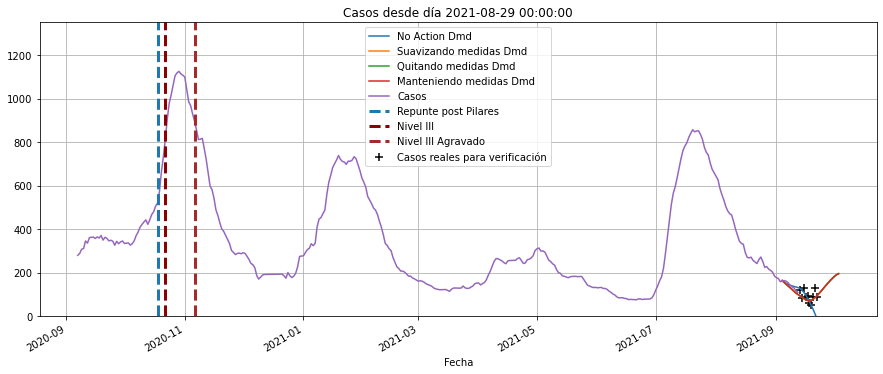

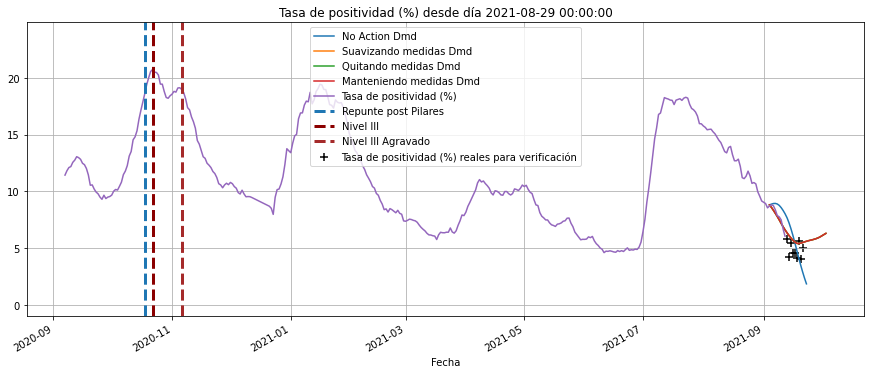

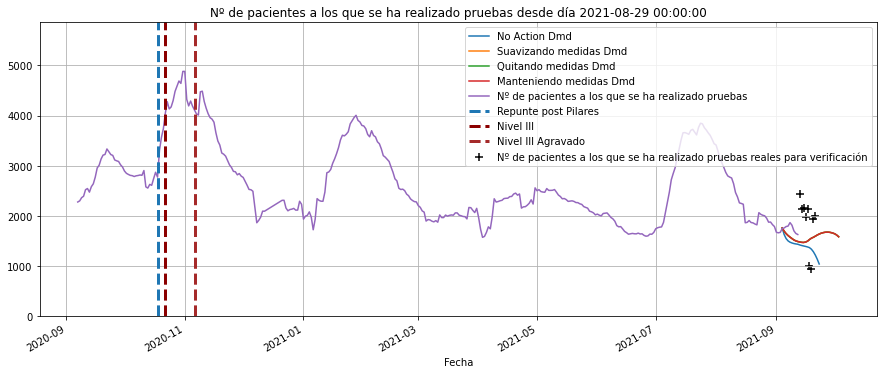

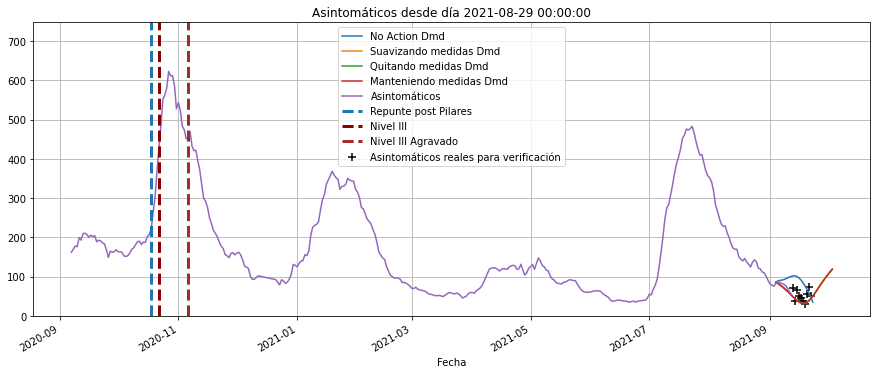

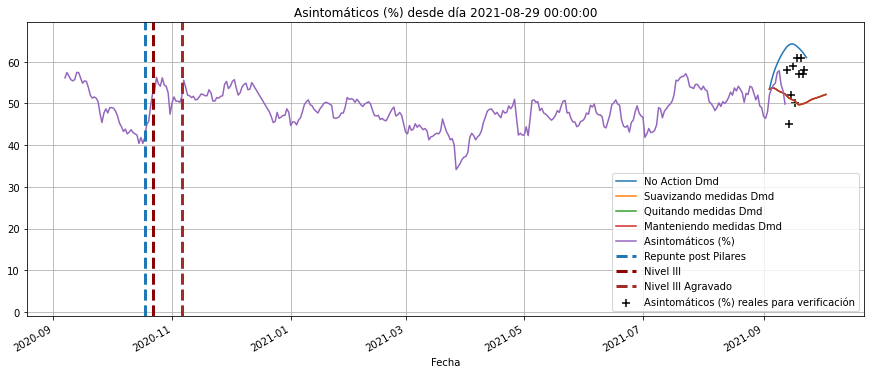

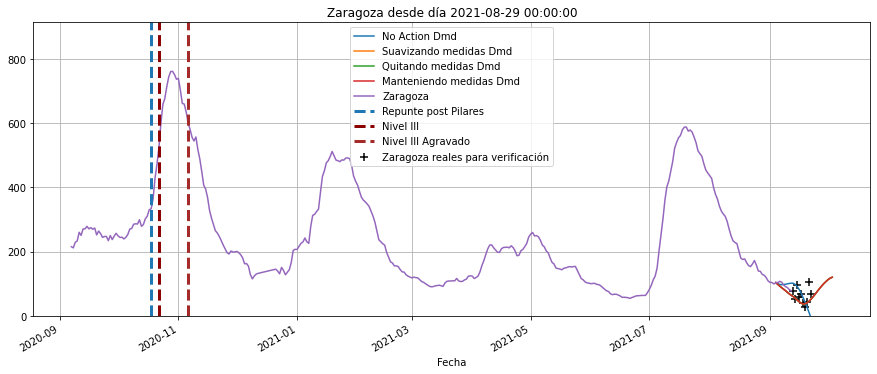

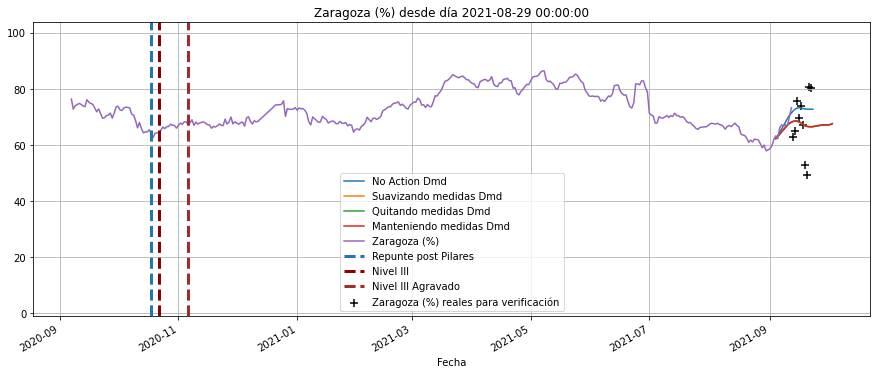

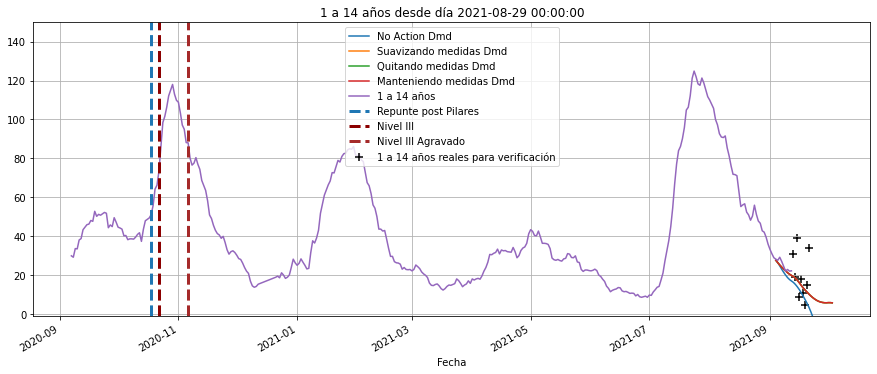

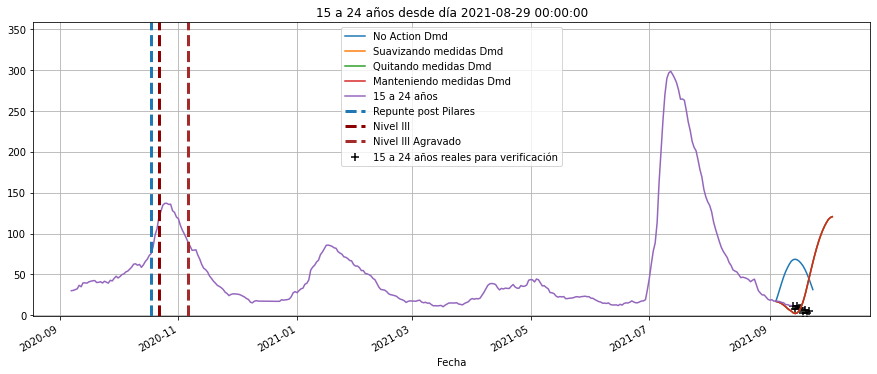

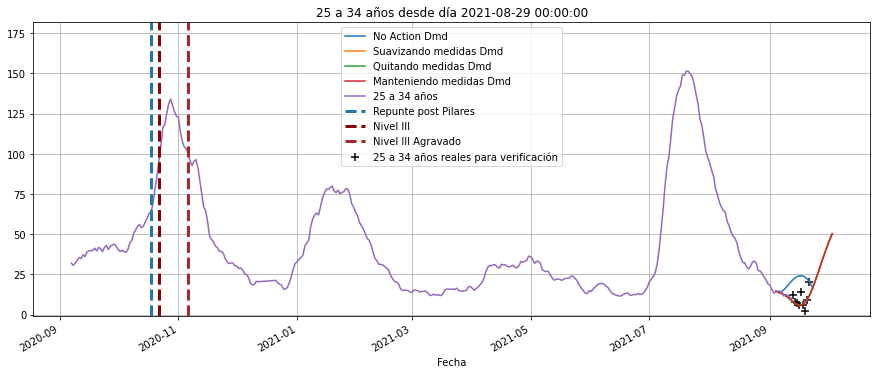

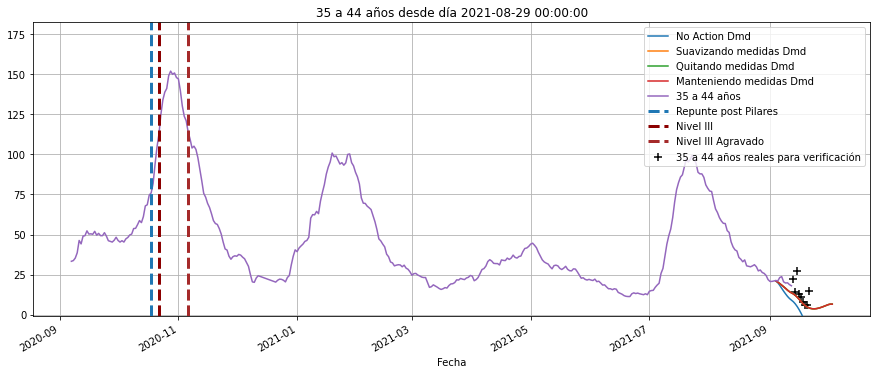

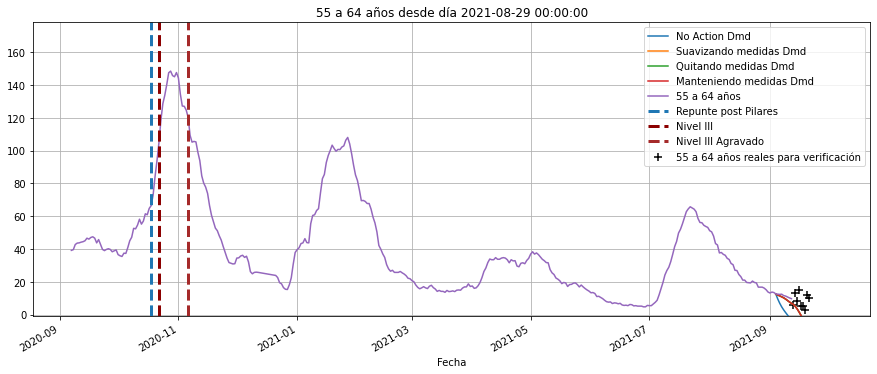

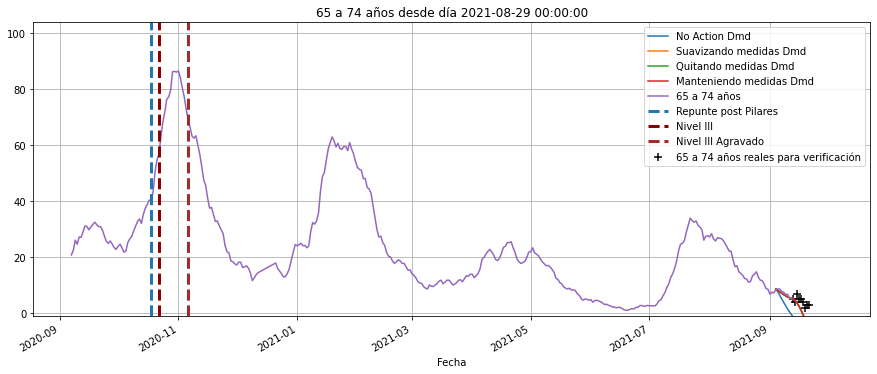

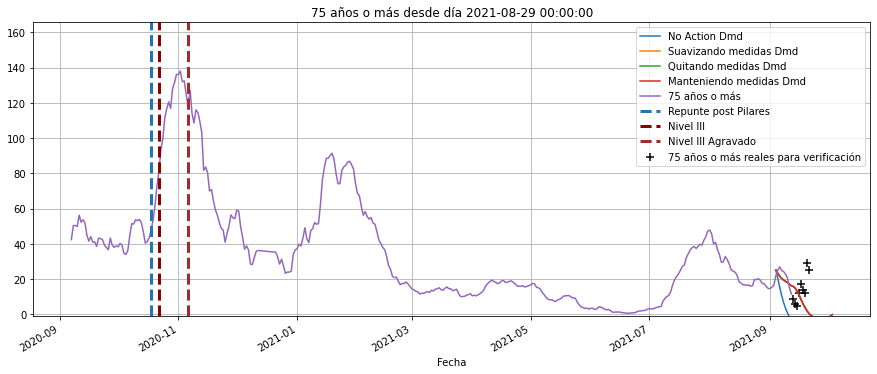

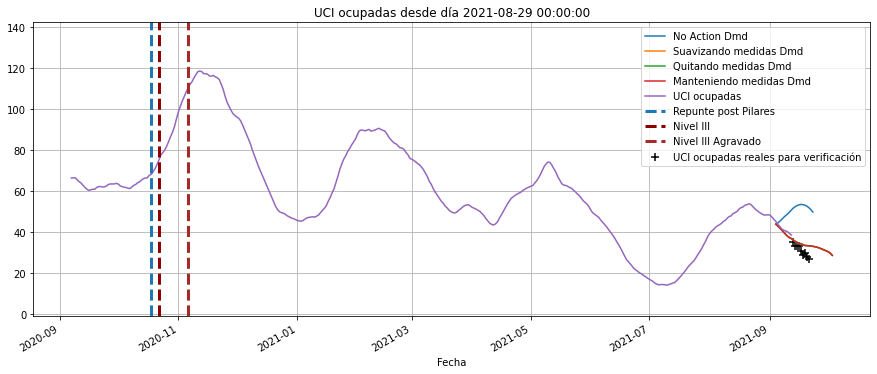

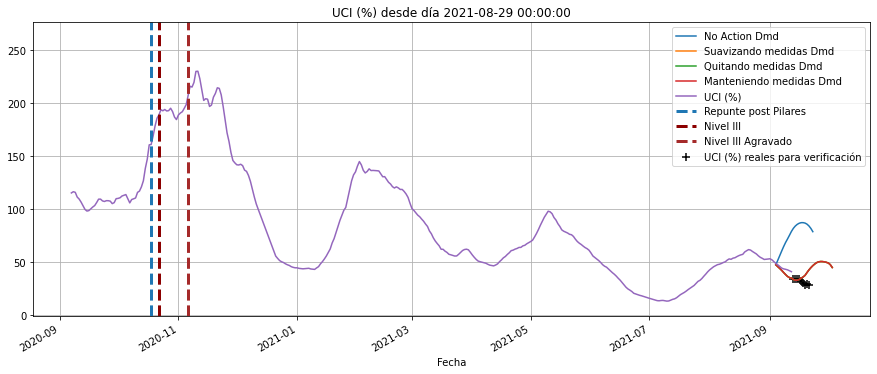

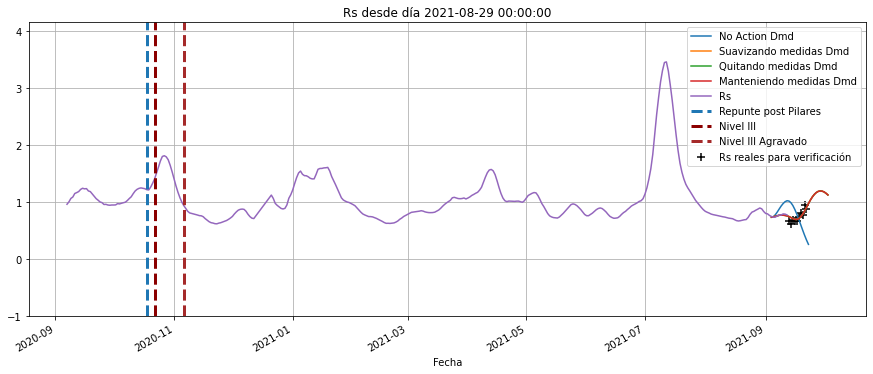

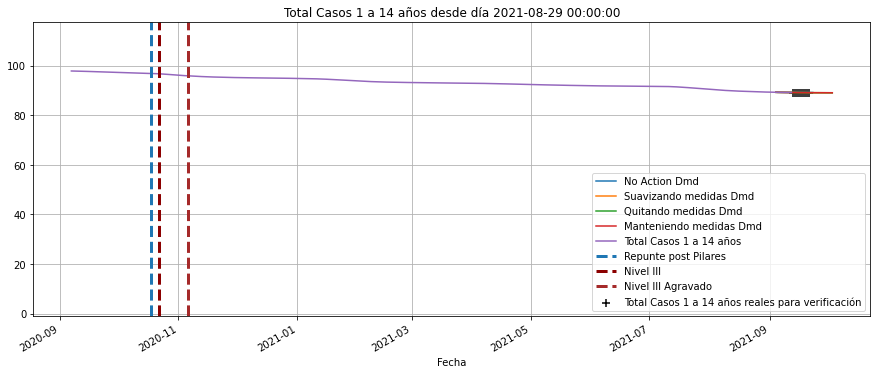

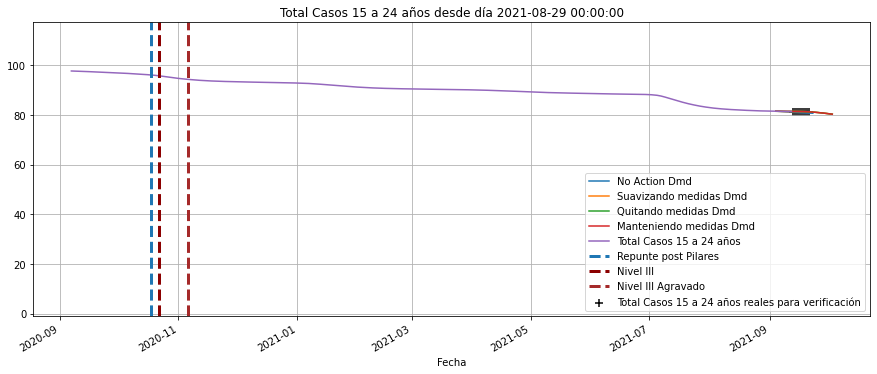

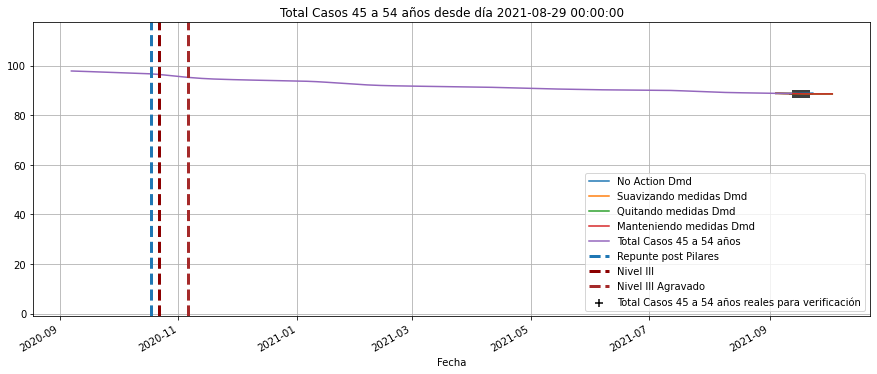

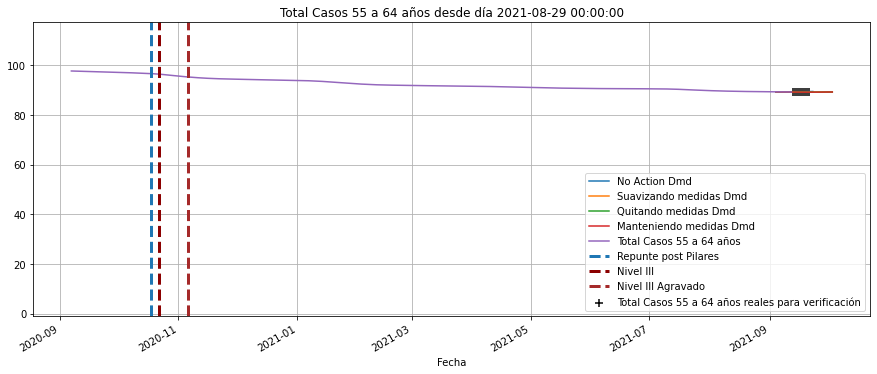

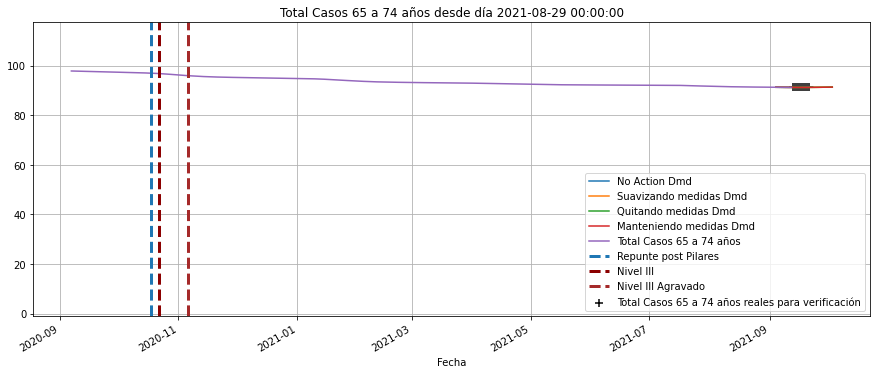

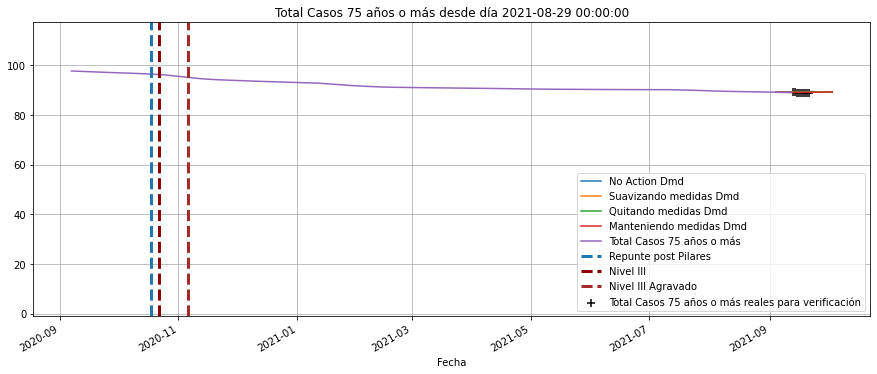

In [44]:
for i in kControl.T.columns:
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #
    ax.plot(noAction.T.loc[:nuevos.index[-1]].index,
            noAction.T.loc[:nuevos.index[-1]][[i]],axes=ax,label='No Action Dmd')
    ax.plot(kControl.T.index,
            kControl.T[[i]],axes=ax,label='Suavizando medidas Dmd')
    ax.plot(rellaxed.T.index,
            rellaxed.T[[i]],axes=ax,label='Quitando medidas Dmd')
    ax.plot(hard.T.index,
            hard.T[[i]],axes=ax,label='Manteniendo medidas Dmd')
    X_prima.T.shift(0).loc['2020-9-7':,i].plot(ax=ax,label='{}'.format(i))
    ax.scatter(nuevos.loc['2020-9-7':].index,
            nuevos.loc['2020-9-7':,[i]],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    plt.title("{} desde día {}".format(i,x1.index[0]))
    plt.legend()
    plt.grid()
    plt.ylim(bottom=-1,top=1.2*X_prima.T.loc['2020-9-7':,i].max())
    plt.show()
  

In [45]:
import datetime as datetime

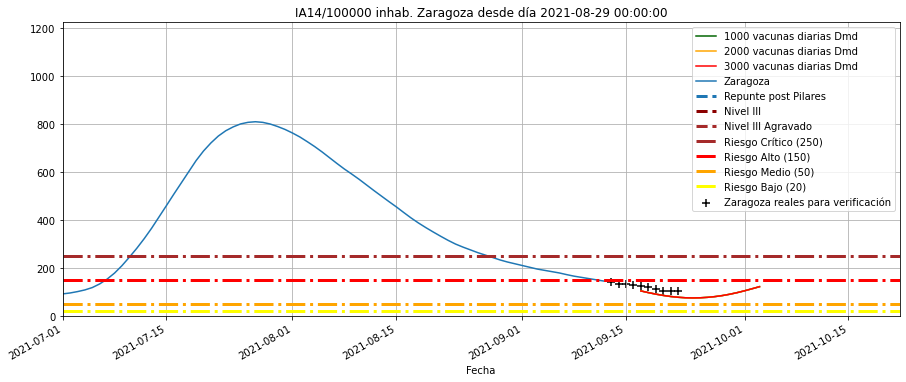

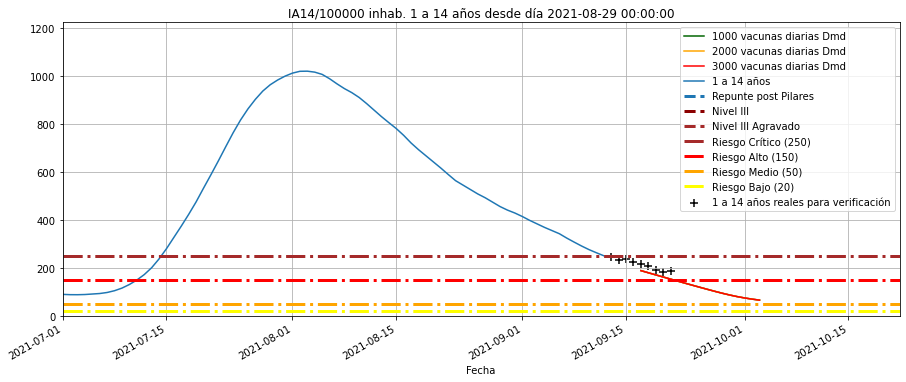

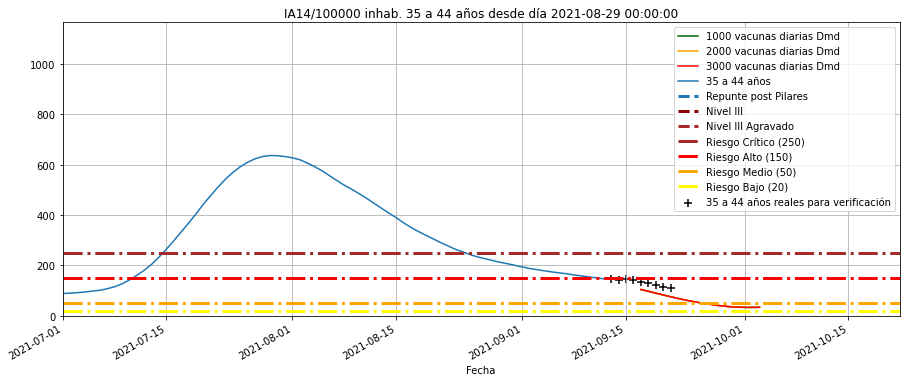

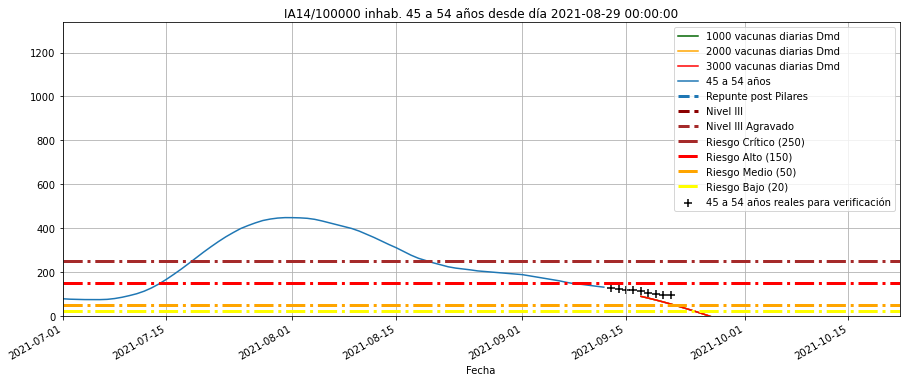

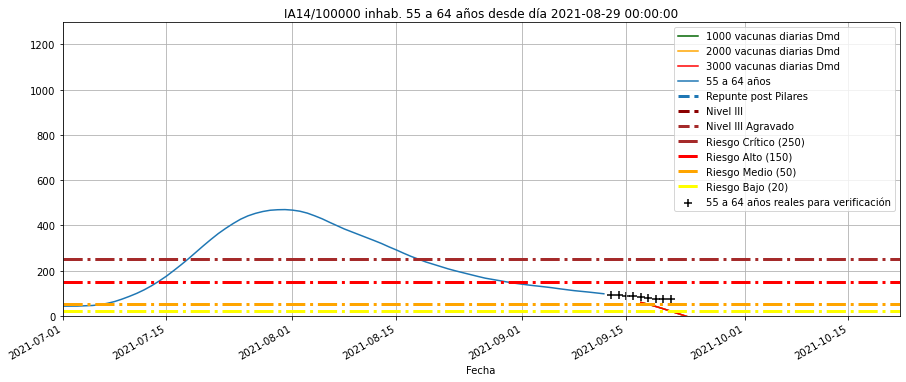

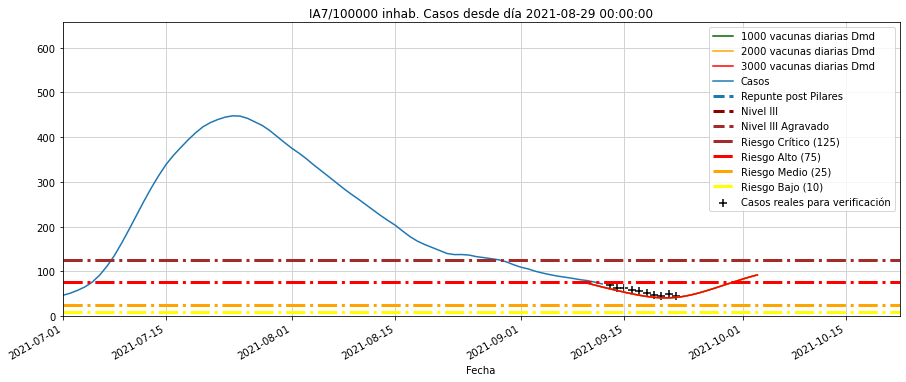

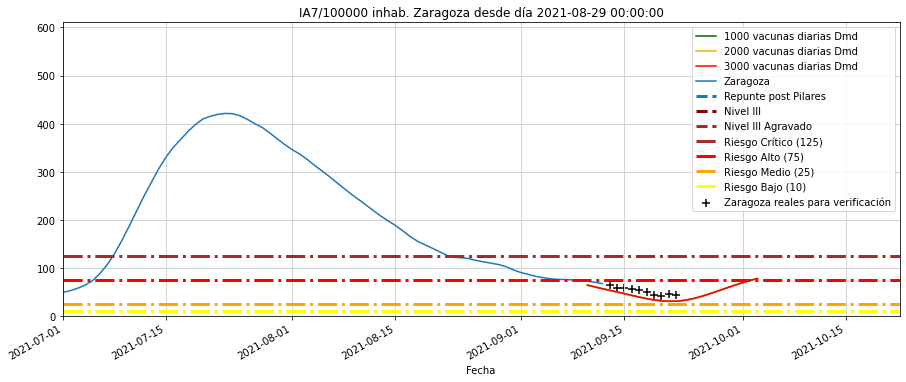

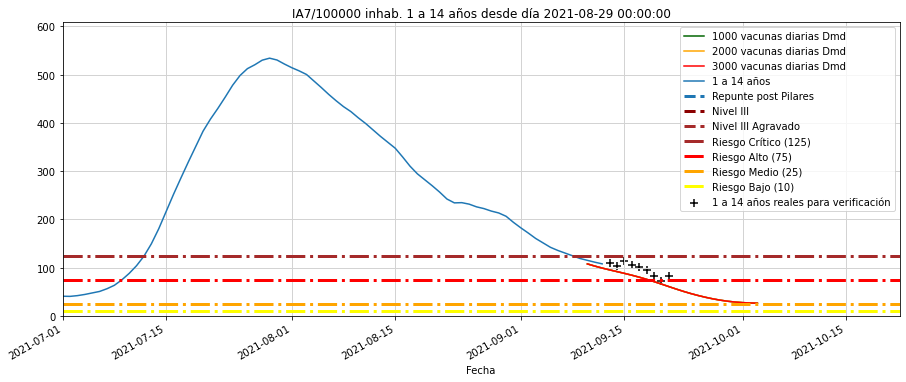

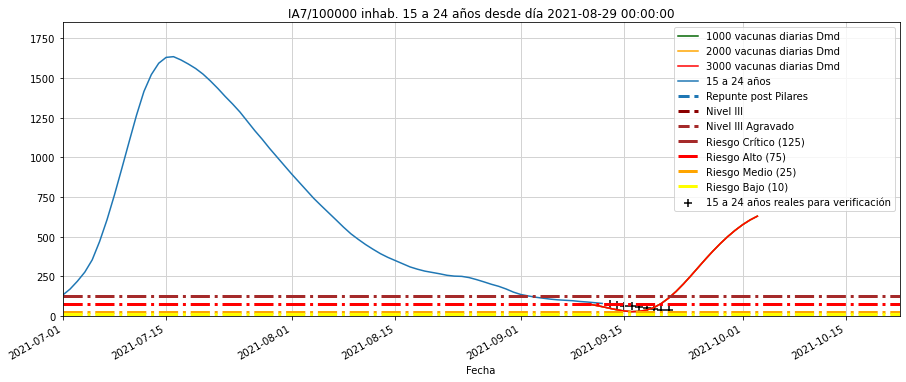

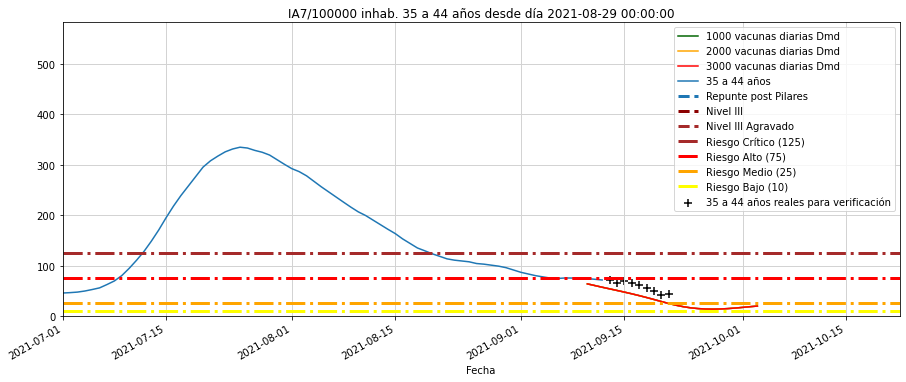

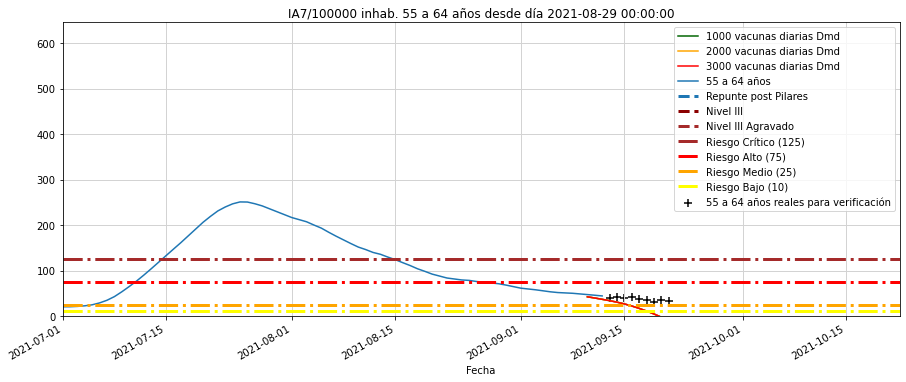

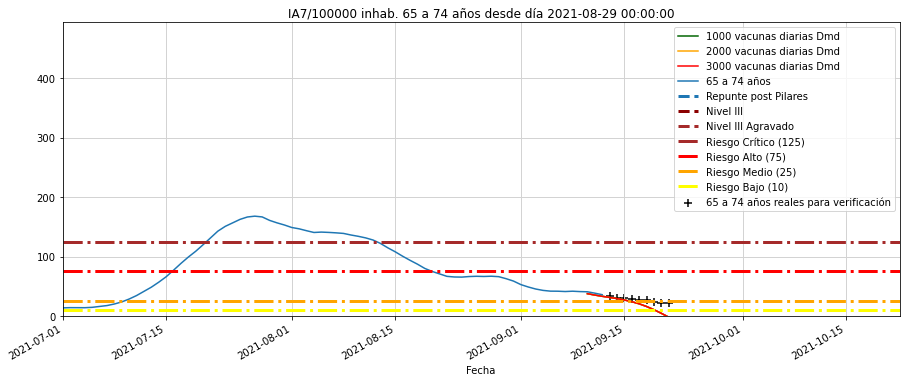

In [46]:
coef = {
    'Casos':13.19,
    #'test coresp':13,
    #'Nº de pacientes a los que se ha realizado pruebas':13,
    #'Asintomáticos':13,
    'Zaragoza':9.6,
    '1 a 14 años':1.58,
    '15 a 24 años':1.24,
    '25 a 34 años':1.42,
    '35 a 44 años':2.01,
    '45 a 54 años':2.06, 
    '55 a 64 años':1.77, 
    '65 a 74 años':1.35,
    '75 años o más':1.50,
}
for i in coef.keys():
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #
    #ax.plot(noAction.T.index,
    #        noAction.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='No Action Dmd')
    ax.plot(rellaxed.T.index,
            rellaxed.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='1000 vacunas diarias Dmd',c='darkgreen')
    ax.plot(kControl.T.index,
            kControl.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='2000 vacunas diarias Dmd',c='orange')
    ax.plot(hard.T.index,
            hard.T[[i]].rolling(14,center=False).sum()/coef[i],axes=ax,label='3000 vacunas diarias Dmd',c='red')
    (X_prima.T.shift(0).loc['2020-9-7':,i].rolling(14,center=False).sum()/coef[i]).plot(ax=ax,label='{}'.format(i))
    #ax.plot(total.loc['2020-9-7':].index,
    #            (total.rolling(14,center=False).sum()/coef[i]).loc['2020-9-7':,[i]],
    #            axes=ax,label='Desde datos diarios'.format(i))
    ax.scatter((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T.loc[nuevos.index[0]:].index,
            ((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T[[i]].rolling(14,center=False).sum()/coef[i]
            ).loc[nuevos.index[0]:],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    ax.axhline(250,lw=3,ls='-.',c='brown',label='Riesgo Crítico (250)')
    ax.axhline(150,lw=3,ls='-.',c='red',label='Riesgo Alto (150)')
    ax.axhline(50,lw=3,ls='-.',c='orange',label='Riesgo Medio (50)')
    ax.axhline(20,lw=3,ls='-.',c='yellow',label='Riesgo Bajo (20)')
    plt.title("IA14/100000 inhab. {} desde día {}".format(i,x1.index[0]))
    plt.legend()
    plt.grid()
    plt.ylim(bottom=-1,top=1.2*(X_prima.T.loc['2020-9-7':,i].rolling(14,center=False).sum()/coef[i]).max())
    plt.xlim(left=datetime.datetime(2020, 9, 7))
    
    plt.xlim(left=pd.Timestamp('2021-2'))
    plt.xlim(left=pd.Timestamp('2021-7'))
    plt.show()

for i in coef.keys():
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #
    #ax.plot(noAction.T.index,
    #        noAction.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='No Action Dmd')
    ax.plot(rellaxed.T.index,
            rellaxed.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='1000 vacunas diarias Dmd',c='darkgreen')
    ax.plot(kControl.T.index,
            kControl.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='2000 vacunas diarias Dmd',c='orange')
    ax.plot(hard.T.index,
            hard.T[[i]].rolling(7,center=False).sum()/coef[i],axes=ax,label='3000 vacunas diarias Dmd',c='red')
    (X_prima.T.shift(0).loc['2020-9-7':,i].rolling(7,center=False).sum()/coef[i]).plot(ax=ax,label='{}'.format(i))
    #(pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1).T.loc['2020-9-7':,i].rolling(7,center=False).sum()/coef[i]).plot(ax=ax,label='{}'.format(i))
    #ax.plot(total.loc['2020-9-7':].index,
    #            (total.rolling(14,center=False).sum()/coef[i]).loc['2020-9-7':,[i]],
    #            axes=ax,label='Desde datos diarios'.format(i))
    ax.scatter((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T.loc[nuevos.index[0]:].index,
            ((pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)).T[[i]].rolling(7,center=False).sum()/coef[i]
            ).loc[nuevos.index[-0]:],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    ax.axhline(125,lw=3,ls='-.',c='brown',label='Riesgo Crítico (125)')
    ax.axhline(75,lw=3,ls='-.',c='red',label='Riesgo Alto (75)')
    ax.axhline(25,lw=3,ls='-.',c='orange',label='Riesgo Medio (25)')
    ax.axhline(10,lw=3,ls='-.',c='yellow',label='Riesgo Bajo (10)')
    plt.title("IA7/100000 inhab. {} desde día {}".format(i,x1.index[0]))
    plt.legend()
    #plt.grid()
    plt.grid(which='minor',axis ='both', linestyle=':', linewidth='0.5', color='lightgrey')
    plt.grid(which='major',axis ='both', linewidth='1', color='lightgrey')
    plt.ylim(bottom=-1,
             top=1.2*(X_prima.T.loc['2020-9-7':,i].rolling(7,center=False).sum()/coef[i]).max())
    plt.ylim(bottom=.0*np.max([0,
                           np.min([total.loc['2020-9-7':,i].rolling(7,center=False).sum().min()/coef[i],
                                   #nuevos.loc['2020-9-7':,i].rolling(7,center=False).sum().min()/coef[i],
                                   kControl.T.loc[:,i].min()])]),
         top=1.1*np.max([total.loc['2020-9-7':,i].rolling(7,center=False).sum().max()/coef[i],
                         #nuevos.loc['2020-9-7':,i].rolling(7,center=False).sum().max()/coef[i],
                         kControl.T.loc[:,i].max()]))

    plt.xlim(left=datetime.datetime(2020, 9, 7))
    
    plt.xlim(left=pd.Timestamp('2021-2'))
    plt.xlim(left=pd.Timestamp('2021-7'))
    plt.show()
  

In [47]:
pd.concat([X_prima,nuevos.T.loc[X_prima.index]],axis=1)
#nuevos.T.shift(0).loc[X_prima.index[0]:]
#X_prima
i='Casos'
((pd.concat([diario.T,nuevos.T.loc[X_prima.index]],axis=1)).T[[i]].rolling(14,center=False).sum()/coef[i]).loc[X_prima.T.index[-5]:].round(0)
nuevos.tail()

Día de la semana  Casos  test coresp  \
Fecha                                              
2021-09-19                 7   51.0        913.0   
2021-09-20                 1   89.0       2203.0   
2021-09-21                 2  130.0       2577.0   
2021-09-22                 3   86.0          NaN   
2021-09-23                 4    NaN          NaN   

            Nº de pacientes a los que se ha realizado pruebas  \
Fecha                                                           
2021-09-19                                              947.0   
2021-09-20                                             1938.0   
2021-09-21                                             2000.0   
2021-09-22                                                NaN   
2021-09-23                                                NaN   

            Tasa de positividad (%)  Asintomáticos  Zaragoza  1 a 14 años  \
Fecha                                                                       
2021-09-19                     5.59          29.07      27.0          5.0   
2021-09-20                     4.04          54.29      44.0         15.0   
2021-09-21                     5.04          74.10     105.0         34.0   
2021-09-22                      NaN          49.88      69.0          NaN   
2021-09-23                      NaN            NaN       NaN          NaN   

            15 a 24 años  25 a 34 años  ...  Inoculados  Total Casos  \
Fecha                                   ...                            
2021-09-19           6.0           2.0  ...   42.337537    87.814734   
2021-09-20           3.0           9.0  ...   42.262048    87.807988   
2021-09-21           5.0          20.0  ...   42.041707    87.798134   
2021-09-22           NaN           NaN  ...   41.688456    87.791615   
2021-09-23           NaN           NaN  ...   41.395287          NaN   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
Fecha                                                           
2021-09-19                89.039236                 81.285388   
2021-09-20                89.031107                 81.282966   
2021-09-21                89.012683                 81.278930   
2021-09-22                      NaN                       NaN   
2021-09-23                      NaN                       NaN   

            Total Casos 25 a 34 años  Total Casos 35 a 44 años  \
Fecha                                                            
2021-09-19                 86.214841                 89.121434   
2021-09-20                 86.208490                 89.118443   
2021-09-21                 86.194377                 89.110964   
2021-09-22                       NaN                       NaN   
2021-09-23                       NaN                       NaN   

            Total Casos 45 a 54 años  Total Casos 55 a 64 años  \
Fecha                                                            
2021-09-19                 88.661837                 89.254745   
2021-09-20                 88.656502                 89.247959   
2021-09-21                 88.648256                 89.242304   
2021-09-22                       NaN                       NaN   
2021-09-23                       NaN                       NaN   

            Total Casos 65 a 74 años  Total Casos 75 años o más  
Fecha                                                            
2021-09-19                 91.218331                  89.043855  
2021-09-20                 91.216112                  89.024576  
2021-09-21                 91.213893                  89.007956  
2021-09-22                       NaN                        NaN  
2021-09-23                       NaN                        NaN  

[5 rows x 50 columns]

In [48]:
noAction2 = noAction *repartoDiaSemana.loc[noAction.T.index.dayofweek+1,kControl.index].T.values
kControl2 = kControl *repartoDiaSemana.loc[kControl.T.index.dayofweek+1,kControl.index].T.values
rellaxed2 = rellaxed *repartoDiaSemana.loc[rellaxed.T.index.dayofweek+1,kControl.index].T.values
hard2 = hard *repartoDiaSemana.loc[hard.T.index.dayofweek+1,kControl.index].T.values
media2 = ((rellaxed.clip(lower=0)+kControl.clip(lower=0)+hard.clip(lower=0))/3.)*repartoDiaSemana.loc[rellaxed.T.index.dayofweek+1,kControl.index].T.values

In [49]:
from matplotlib.dates import HourLocator, MonthLocator, YearLocator, WeekdayLocator

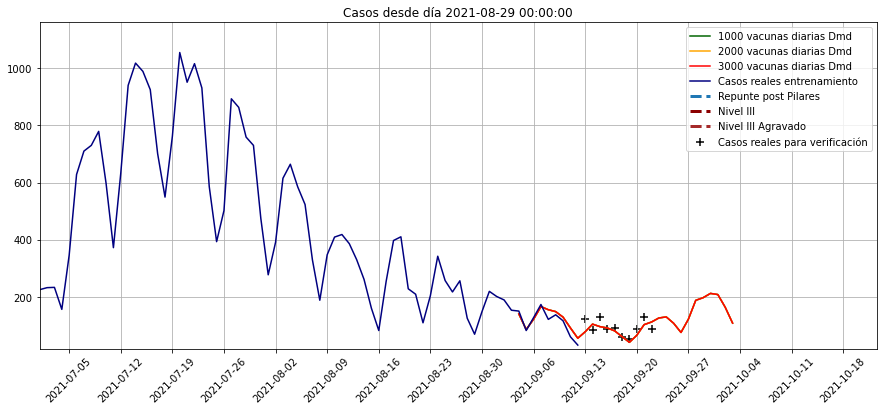

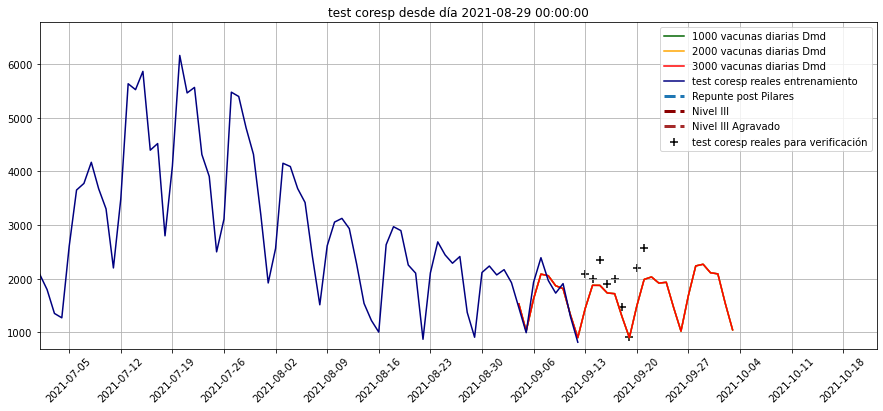

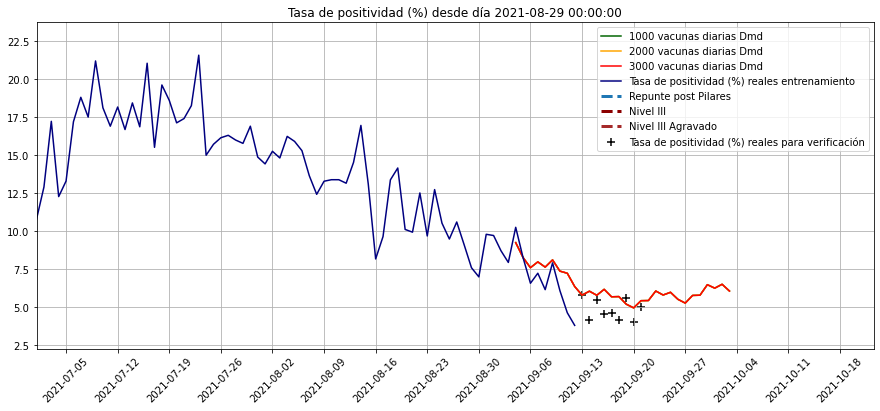

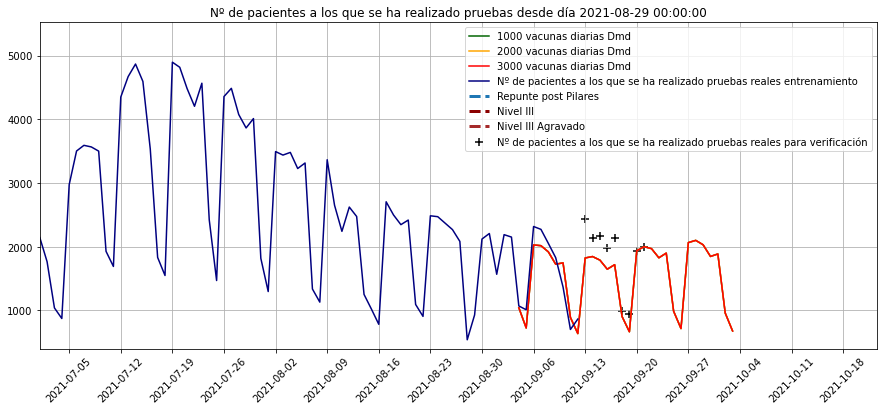

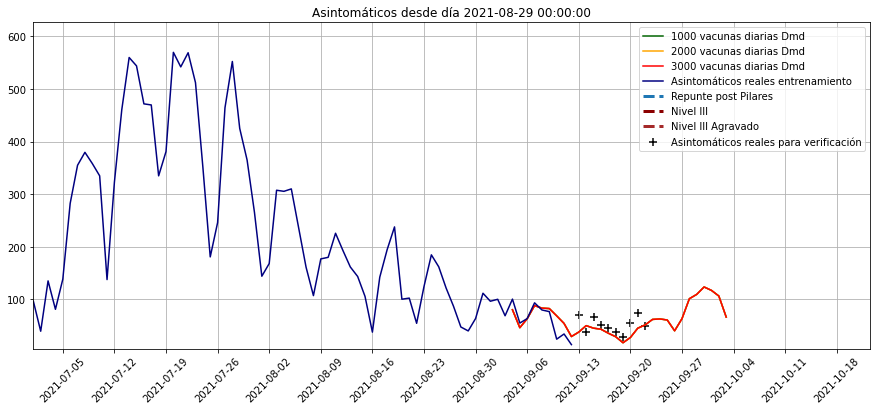

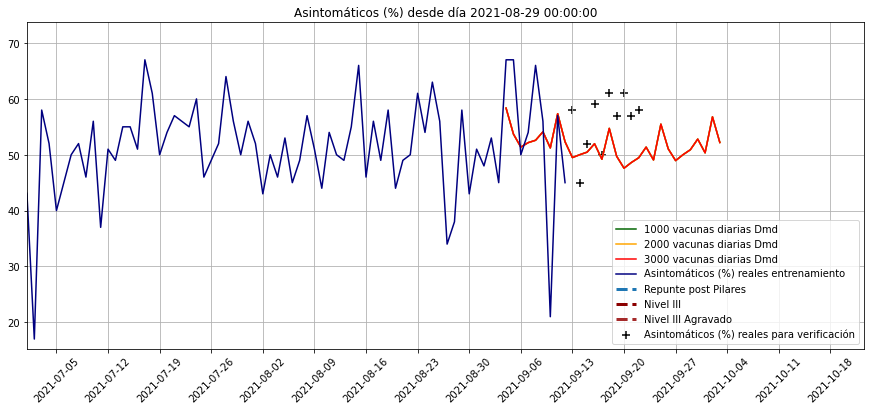

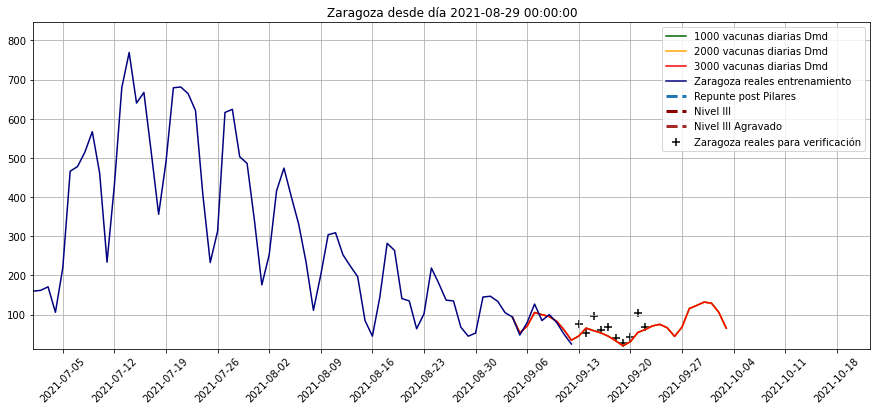

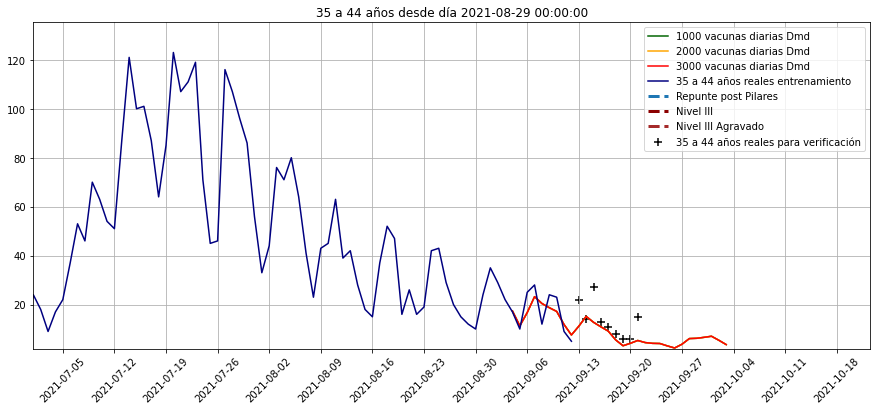

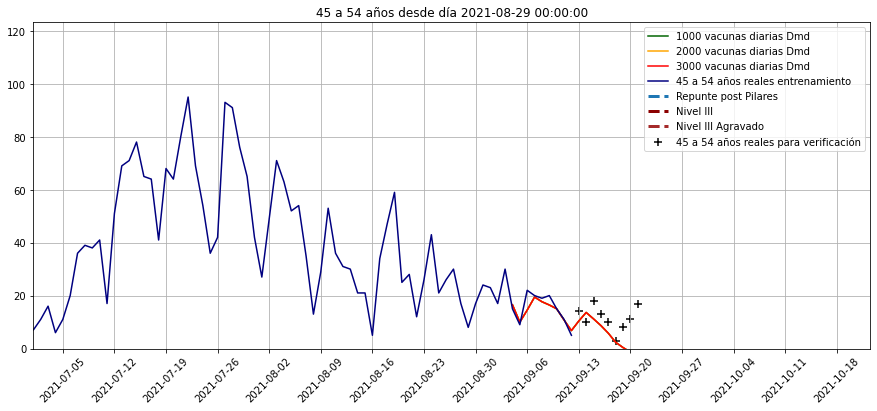

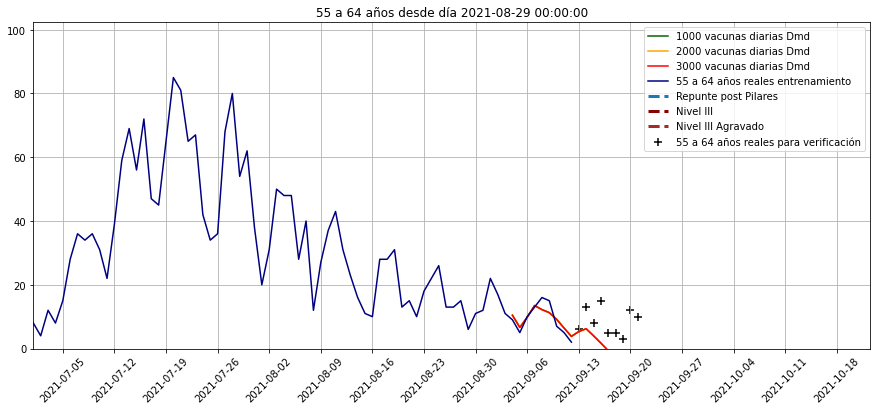

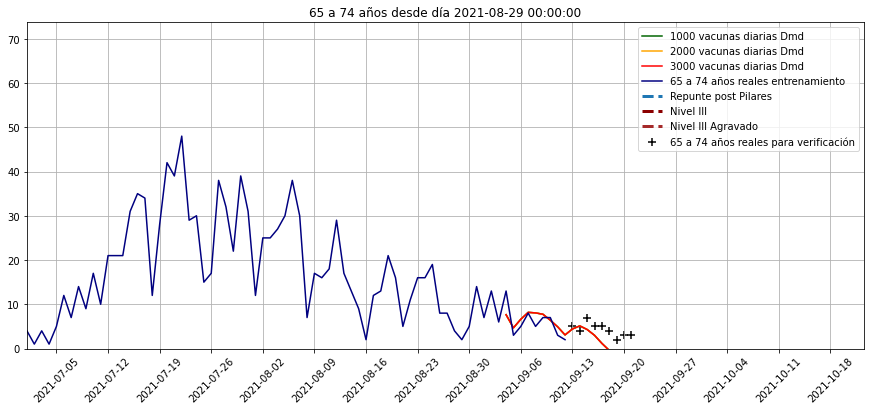

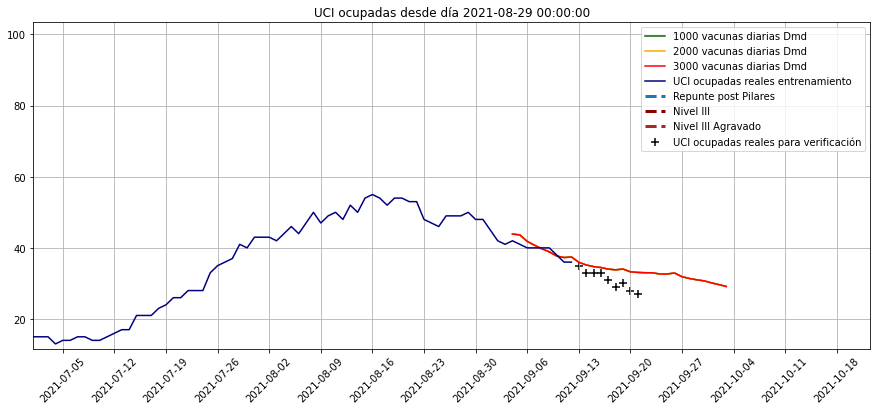

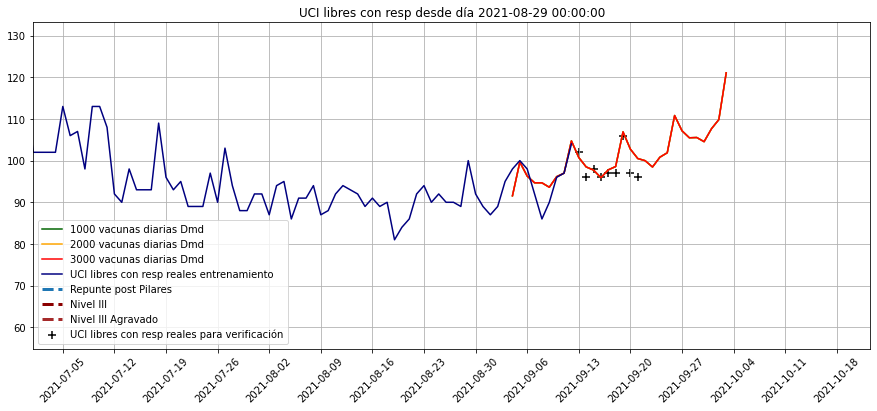

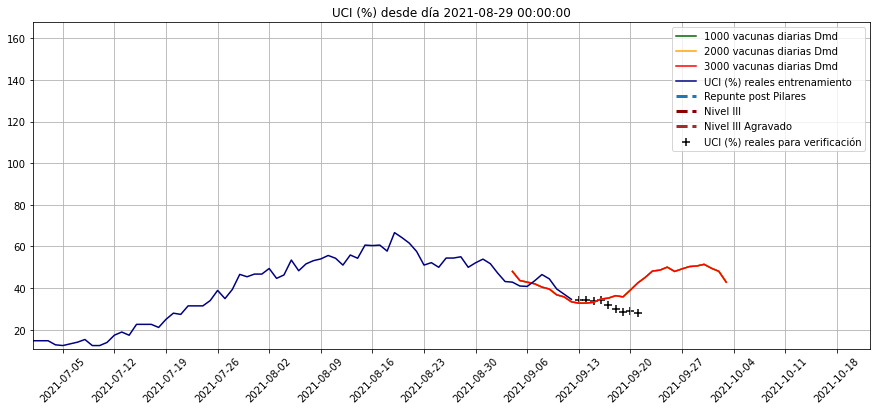

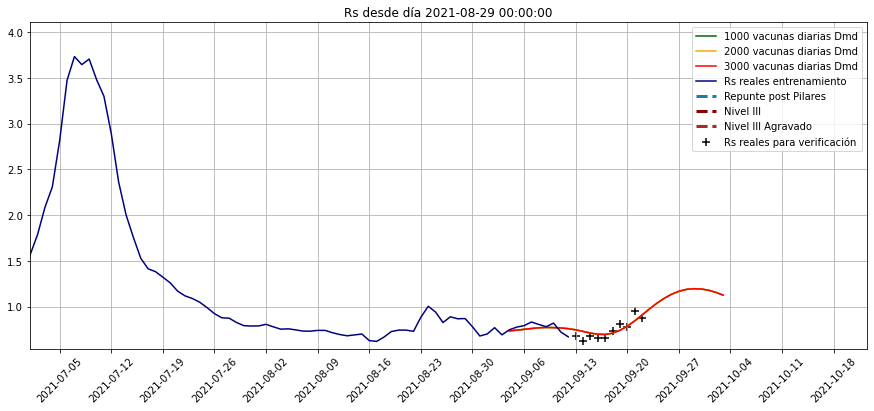

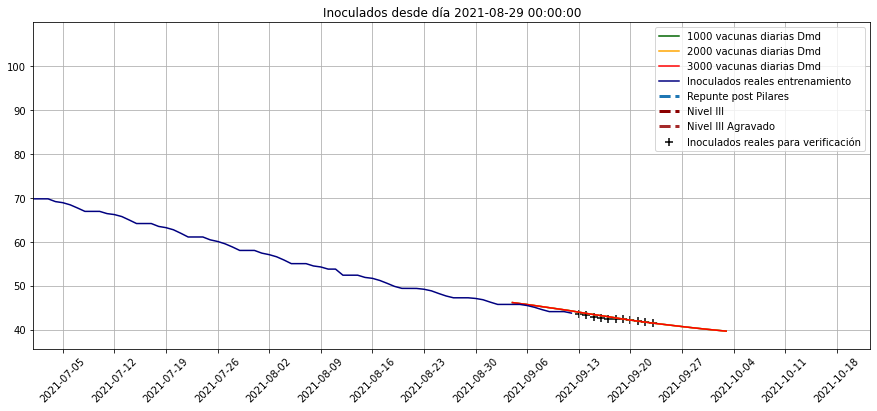

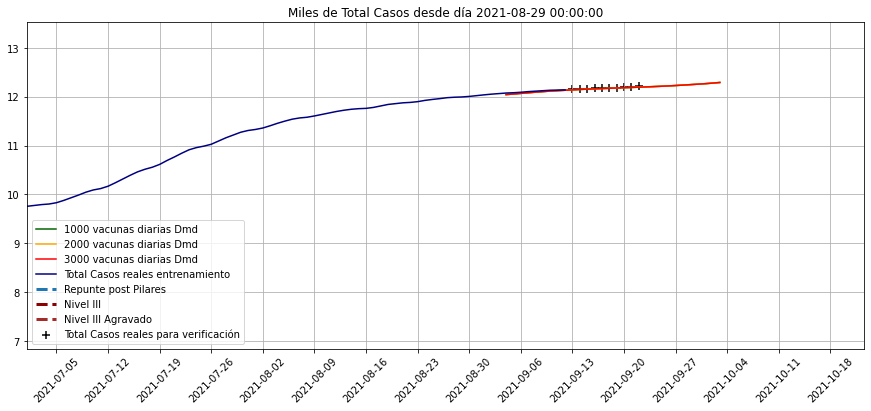

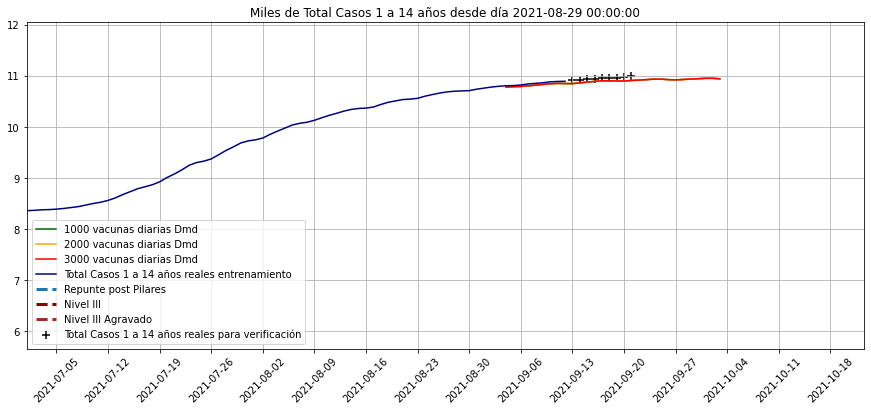

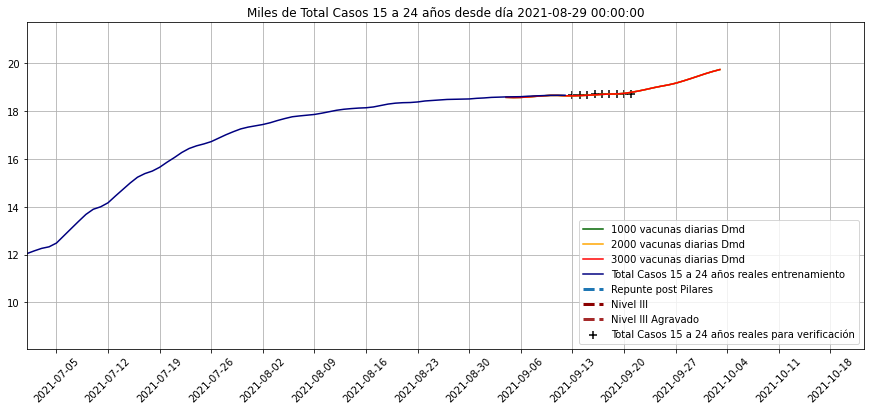

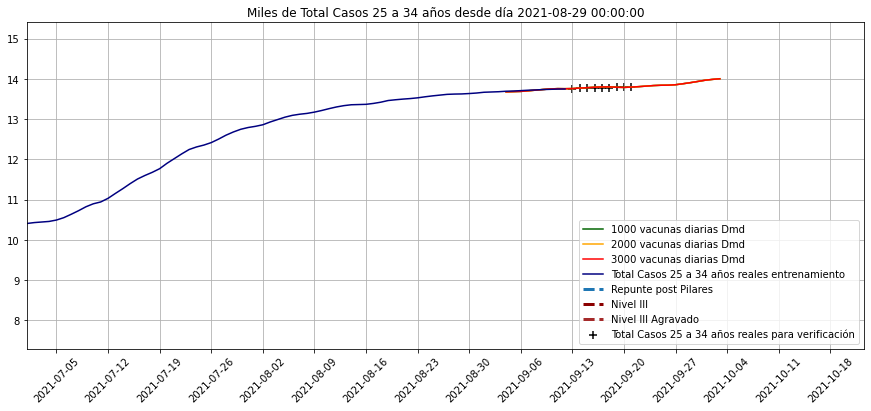

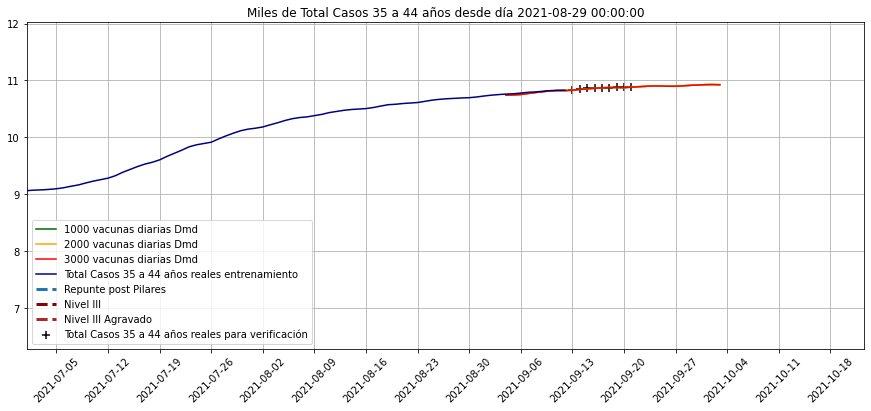

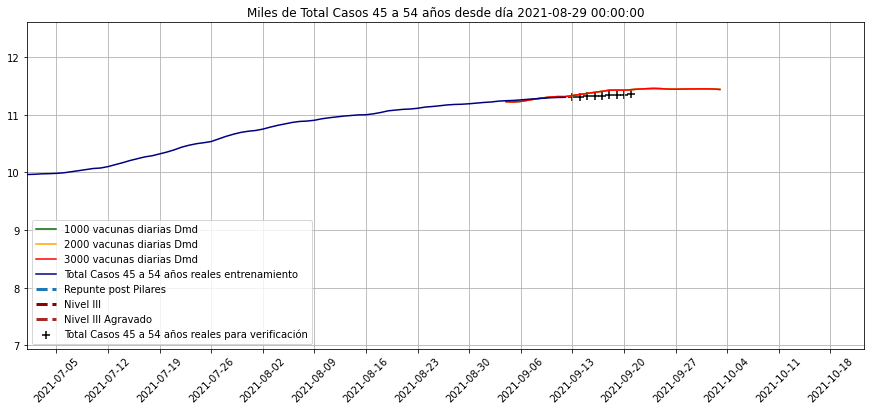

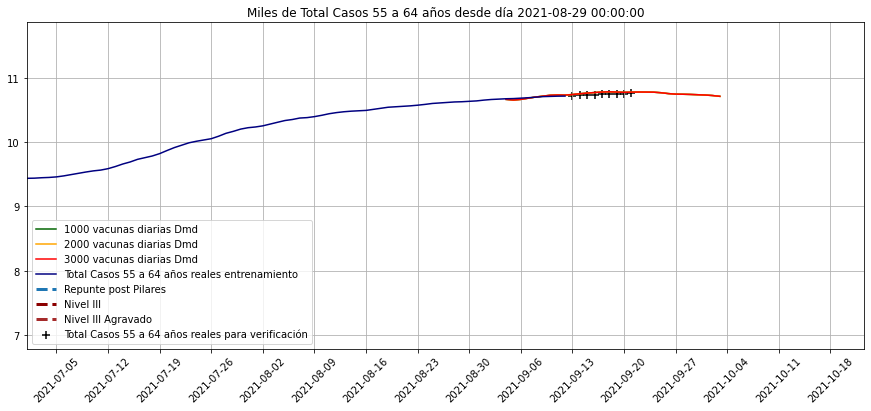

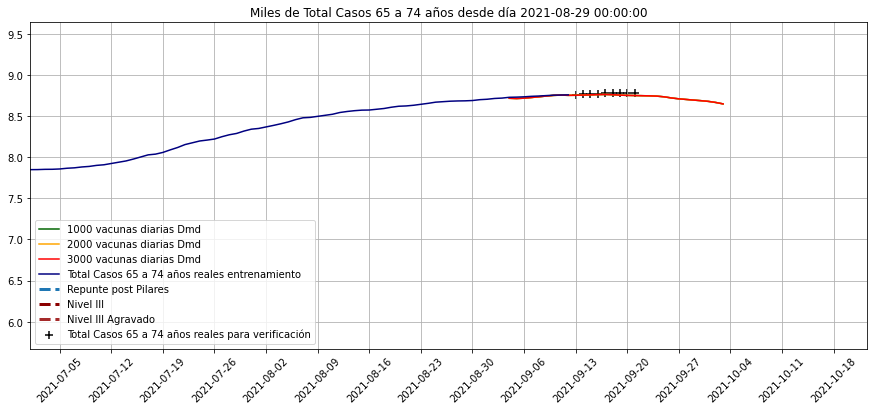

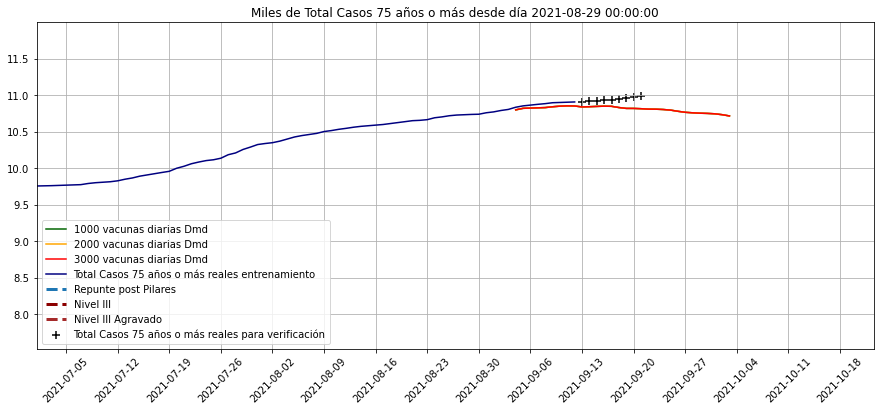

In [50]:
for i in kControl.T.columns[:-9]:
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #ax.plot(noAction2.T.index,
    #        noAction2.T[[i]],axes=ax,label='No Action Dmd')
    ax.plot(rellaxed2.T.index,
            rellaxed2.T[[i]],axes=ax,label='1000 vacunas diarias Dmd',c='darkgreen')
    ax.plot(kControl2.T.index,
            kControl2.T[[i]],axes=ax,label='2000 vacunas diarias Dmd',c='orange')
    ax.plot(hard2.T.index,
            hard2.T[[i]],axes=ax,label='3000 vacunas diarias Dmd',c='red')    
    #ax.plot(media2.T.index,
    #        media2.T[[i]],axes=ax,label='media de Dmd',c='orange',lw=5,ls='--')
    ax.plot(diario.loc['2020-9-7':].index,
        diario.loc['2020-9-7':,[i]],axes=ax,label='{} reales entrenamiento'.format(i),c='navy')
    #X_prima.T.loc['2020-9-7':,i].plot(ax=ax,label='{}'.format(i))
    ax.scatter(nuevos.loc['2020-9-7':].index,
            nuevos.loc['2020-9-7':,[i]],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    plt.legend()
    plt.title("{} desde día {}".format(i,x1.index[0]))
    plt.ylim(bottom=0,top=3.0*diario.loc['2021-2':,i].max())
    #plt.ylim(bottom=.5*np.max([0,total.loc[:,i].min()]),top=1.75*X_prima.T.loc['2021-2':,i].max())
    plt.ylim(bottom=.9*np.max([0,
                               np.min([diario.loc['2021-2':,i].min(),
                                       #nuevos.loc['2021-2':,i].min(),
                                       kControl2.T.loc['2021-2':,i].min()])]),
             top=1.1*np.max([diario.loc['2021-2':,i].max(),
                                  #nuevos.loc['2021-2':,i].max(),
                                  kControl2.T.loc['2021-2':,i].max()]))


        
    plt.xlim(left=pd.Timestamp('2021-2'))
    plt.xlim(left=pd.Timestamp('2021-7'))
    plt.grid()
    
    #plt.grid(which='major',axis ='y', linewidth='1', color='black')
    #plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    #ax.tick_params(which='both', # Options for both major and minor ticks
    #                top='off', # turn off top ticks
    #                left='off', # turn off left ticks
    #                right='off',  # turn off right ticks
    #                bottom='off') # turn off bottom ticks
    #ax.minorticks_on()
    ax.xaxis.set_major_locator(WeekdayLocator(0))
    
    plt.xticks(rotation=45)
    plt.show()
for i in kControl.T.columns[-9:]:
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #ax.plot(noAction2.T.index,
    #        noAction2.T[[i]],axes=ax,label='No Action Dmd')
    ax.plot(rellaxed2.T.index,
            100-rellaxed2.T[[i]],axes=ax,label='1000 vacunas diarias Dmd',c='darkgreen')
    ax.plot(kControl2.T.index,
            100-kControl2.T[[i]],axes=ax,label='2000 vacunas diarias Dmd',c='orange')
    ax.plot(hard2.T.index,
            100-hard2.T[[i]],axes=ax,label='3000 vacunas diarias Dmd',c='red')    
    #ax.plot(media2.T.index,
    #        media2.T[[i]],axes=ax,label='media de Dmd',c='orange',lw=5,ls='--')
    ax.plot(diario.loc['2020-9-7':].index,
        100-diario.loc['2020-9-7':,[i]],axes=ax,label='{} reales entrenamiento'.format(i),c='navy')
    #X_prima.T.loc['2020-9-7':,i].plot(ax=ax,label='{}'.format(i))
    ax.scatter(nuevos.loc['2020-9-7':].index,
            100-nuevos.loc['2020-9-7':,[i]],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    plt.legend()
    plt.title("Miles de {} desde día {}".format(i,x1.index[0]))
    plt.ylim(bottom=0,top=1.1*diario.loc['2021-2':,i].max())
    plt.ylim(bottom=.9*np.max([0,100-np.max([diario.loc['2021-2':,i].max(),
                                             #nuevos.loc['2021-2':,i].max(),
                                             kControl2.T.loc['2021-2':,i].max()])]),
             top=1.1*(100-np.min([diario.loc['2021-2':,i].min(),
                                  #nuevos.loc['2021-2':,i].min(),
                                  kControl2.T.loc['2021-2':,i].min()])))
    
    plt.xlim(left=pd.Timestamp('2021-2'))
    plt.xlim(left=pd.Timestamp('2021-7'))
    plt.grid()
    
    #plt.grid(which='major',axis ='y', linewidth='1', color='black')
    #plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    #ax.tick_params(which='both', # Options for both major and minor ticks
    #                top='off', # turn off top ticks
    #                left='off', # turn off left ticks
    #                right='off',  # turn off right ticks
    #                bottom='off') # turn off bottom ticks
    #ax.minorticks_on()
    ax.xaxis.set_major_locator(WeekdayLocator(0))
    
    plt.xticks(rotation=45)
    plt.show()
    

In [51]:
kControl2.index

Index(['Casos', 'test coresp', 'Tasa de positividad (%)',
       'Nº de pacientes a los que se ha realizado pruebas', 'Asintomáticos',
       'Asintomáticos (%)', 'Zaragoza', 'Zaragoza (%)', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más', 'Camas Ocup',
       'Camas libres', 'Camas (%)', 'UCI ocupadas', 'UCI libres con resp',
       'UCI (%)', 'Rs', 'Rd', 'Inoculados', 'Total Casos',
       'Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más'],
      dtype='object')

In [52]:
kControl2.loc[['Casos', 'test coresp', 
       'Nº de pacientes a los que se ha realizado pruebas', 'Tasa de positividad (%)',
       'Asintomáticos (%)', 'Zaragoza', 'UCI ocupadas', 'UCI libres con resp', 'Camas Ocup',
       'Camas libres', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más'],'2021-9-20':'2021-9-26'].round(0).astype(int).T.sort_index(ascending=False).to_excel('kControl2.xlsx')
kControl2.loc[['Casos', 'test coresp', 
       'Nº de pacientes a los que se ha realizado pruebas', 'Tasa de positividad (%)',
       'Asintomáticos (%)', 'Zaragoza', 'UCI ocupadas', 'UCI libres con resp', 'Camas Ocup',
       'Camas libres', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más'],'2021-9-20':'2021-9-26'].round(0).astype(int).T.sort_index(ascending=False)

Casos  test coresp  \
2021-09-26     75         1022   
2021-09-25    107         1463   
2021-09-24    130         1934   
2021-09-23    126         1918   
2021-09-22    112         2033   
2021-09-21    103         1987   
2021-09-20     65         1488   

            Nº de pacientes a los que se ha realizado pruebas  \
2021-09-26                                                715   
2021-09-25                                                987   
2021-09-24                                               1900   
2021-09-23                                               1826   
2021-09-22                                               1969   
2021-09-21                                               2000   
2021-09-20                                               1938   

            Tasa de positividad (%)  Asintomáticos (%)  Zaragoza  \
2021-09-26                        6                 51        45   
2021-09-25                        6                 55        66   
2021-09-24                        6                 49        75   
2021-09-23                        6                 51        71   
2021-09-22                        5                 49        62   
2021-09-21                        5                 49        54   
2021-09-20                        5                 48        31   

            UCI ocupadas  UCI libres con resp  Camas Ocup  Camas libres  \
2021-09-26            33                  111          51          1660   
2021-09-25            33                  102          59          1680   
2021-09-24            33                  101          67          1645   
2021-09-23            33                   98          78          1479   
2021-09-22            33                  100          89          1426   
2021-09-21            33                  101         100          1410   
2021-09-20            33                  103         110          1429   

            1 a 14 años  15 a 24 años  25 a 34 años  35 a 44 años  \
2021-09-26            3            46            15             2   
2021-09-25            7            69            20             3   
2021-09-24            9            87            23             4   
2021-09-23           10            80            21             4   
2021-09-22           11            68            17             4   
2021-09-21           13            53            13             5   
2021-09-20            8            27             7             4   

            45 a 54 años  55 a 64 años  65 a 74 años  75 años o más  
2021-09-26            -6            -6            -5             -1  
2021-09-25            -8            -9            -7             -2  
2021-09-24            -9           -11            -8             -2  
2021-09-23            -8           -11            -8             -2  
2021-09-22            -6           -11            -6             -1  
2021-09-21            -4           -10            -5              1  
2021-09-20            -1            -5            -3              2

In [53]:
kControl2.T.head()

Casos  test coresp  Tasa de positividad (%)  \
2021-09-04  140.018622  1531.632164                 9.242749   
2021-09-05   85.545631  1024.588095                 8.261469   
2021-09-06  121.382489  1624.280903                 7.594423   
2021-09-07  165.851766  2085.950087                 7.976325   
2021-09-08  154.749592  2056.011545                 7.630914   

            Nº de pacientes a los que se ha realizado pruebas  Asintomáticos  \
2021-09-04                                        1042.293406      80.278891   
2021-09-05                                         724.067932      46.134455   
2021-09-06                                        2027.620560      63.189024   
2021-09-07                                        2016.018004      88.127344   
2021-09-08                                        1919.377568      83.358866   

            Asintomáticos (%)    Zaragoza  Zaragoza (%)  1 a 14 años  \
2021-09-04          58.351972   93.206348     65.126767    25.740649   
2021-09-05          53.699224   53.404661     62.208840    12.521971   
2021-09-06          51.373300   70.810309     58.994926    17.873431   
2021-09-07          52.167434  105.434710     64.673642    30.634668   
2021-09-08          52.590652   99.899223     66.611899    27.728664   

            15 a 24 años  ...  Inoculados  Total Casos  \
2021-09-04     14.336367  ...   46.152535    87.957641   
2021-09-05      8.428494  ...   45.930629    87.946315   
2021-09-06     12.049902  ...   45.709261    87.933205   
2021-09-07     16.859201  ...   45.476379    87.920559   
2021-09-08     15.613166  ...   45.230486    87.908225   

            Total Casos 1 a 14 años  Total Casos 15 a 24 años  \
2021-09-04                89.225401                 81.421238   
2021-09-05                89.216756                 81.429687   
2021-09-06                89.212491                 81.424292   
2021-09-07                89.199747                 81.402934   
2021-09-08                89.187529                 81.379368   

            Total Casos 25 a 34 años  Total Casos 35 a 44 años  \
2021-09-04                 86.323509                 89.259873   
2021-09-05                 86.318038                 89.254326   
2021-09-06                 86.312976                 89.246875   
2021-09-07                 86.297613                 89.229299   
2021-09-08                 86.281897                 89.211776   

            Total Casos 45 a 54 años  Total Casos 55 a 64 años  \
2021-09-04                 88.773269                 89.336980   
2021-09-05                 88.778948                 89.346899   
2021-09-06                 88.769048                 89.337057   
2021-09-07                 88.748243                 89.318590   
2021-09-08                 88.726200                 89.300725   

            Total Casos 65 a 74 años  Total Casos 75 años o más  
2021-09-04                 91.283509                  89.202332  
2021-09-05                 91.286551                  89.181063  
2021-09-06                 91.282149                  89.177980  
2021-09-07                 91.274023                  89.174150  
2021-09-08                 91.265473                  89.170925  

[5 rows x 34 columns]

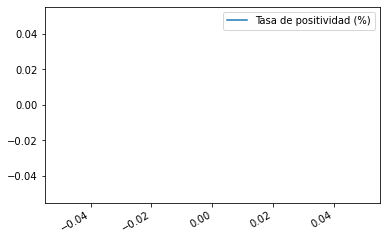

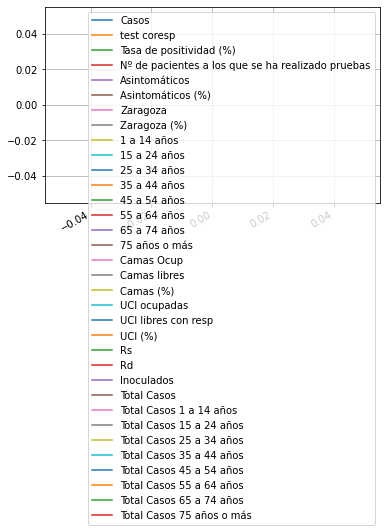

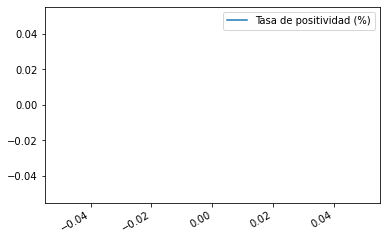

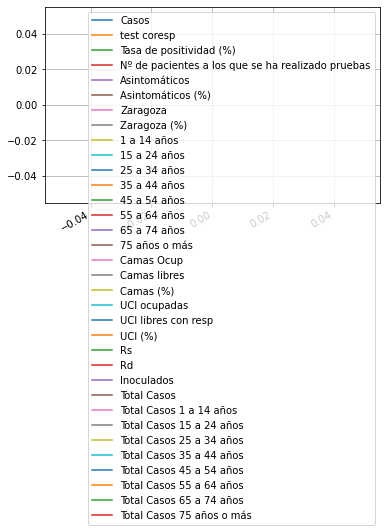

In [54]:
hard2.T.loc['2020-10-1':'2021-3-27',['Tasa de positividad (%)']].plot()
(hard2.T.loc['2020-10-1':'2021-3-27'].apply(lambda x: 100.*x.Casos/x['test coresp'],axis=1)).plot()
plt.grid()
plt.show()
kControl2.T.loc[:'2021-3-27',['Tasa de positividad (%)']].plot()
(kControl2.T.loc[:'2021-3-27'].apply(lambda x: 100.*x.Casos/x['test coresp'],axis=1)).plot()
plt.grid()#goto

In [55]:
diario.loc['2020-10-1':].apply(lambda x: 100.*x.Casos/x['test coresp'],axis=1)

Fecha
2020-10-01    10.849057
2020-10-02    10.931583
2020-10-03    10.202768
2020-10-04    12.485459
2020-10-05    11.167315
                ...    
2021-09-08     6.154629
2021-09-09     7.909931
2021-09-10     6.076480
2021-09-11     4.633205
2021-09-12     3.799020
Length: 347, dtype: float64

<AxesSubplot:xlabel='Fecha'>

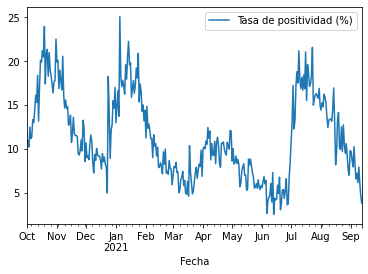

In [56]:
diario.loc['2020-10-1':,['Tasa de positividad (%)']].plot()

In [57]:
((kControl2.T-nuevos)*100./nuevos).dropna(axis=0,how='all').dropna(axis=1,how='all').describe().T

count        mean  \
1 a 14 años                                          9.0   -3.925140   
15 a 24 años                                         9.0  225.636508   
25 a 34 años                                         9.0   -3.245466   
35 a 44 años                                         9.0  -33.300133   
45 a 54 años                                         9.0  -50.648135   
55 a 64 años                                         9.0 -109.812241   
65 a 74 años                                         9.0  -94.472897   
75 años o más                                        9.0    5.006950   
Asintomáticos                                       10.0  -22.765628   
Asintomáticos (%)                                   10.0   -9.446790   
Camas (%)                                            9.0    1.294814   
Camas Ocup                                           9.0   -9.851702   
Camas libres                                         9.0    0.574933   
Casos                                               10.0   -8.083760   
Inoculados                                          11.0    0.563215   
Nº de pacientes a los que se ha realizado pruebas    9.0  -14.551250   
Rd                                                  10.0    1.430406   
Rs                                                  10.0    2.349707   
Tasa de positividad (%)                              9.0   19.081921   
Total Casos                                         10.0    0.011594   
Total Casos 1 a 14 años                              9.0    0.072147   
Total Casos 15 a 24 años                             9.0    0.000773   
Total Casos 25 a 34 años                             9.0   -0.009226   
Total Casos 35 a 44 años                             9.0    0.005773   
Total Casos 45 a 54 años                             9.0   -0.073155   
Total Casos 55 a 64 años                             9.0   -0.031592   
Total Casos 65 a 74 años                             9.0    0.020902   
Total Casos 75 años o más                            9.0    0.123264   
UCI (%)                                              9.0   15.008410   
UCI libres con resp                                  9.0    1.656056   
UCI ocupadas                                         9.0   11.164857   
Zaragoza                                            10.0  -23.315573   
Zaragoza (%)                                        10.0    0.998767   
test coresp                                          9.0  -16.512406   

                                                          std         min  \
1 a 14 años                                         58.049911  -61.493644   
15 a 24 años                                       394.983694  -78.911532   
25 a 34 años                                        46.849645  -53.587443   
35 a 44 años                                        22.697066  -64.572470   
45 a 54 años                                        51.134083 -125.125239   
55 a 64 años                                        63.983428 -196.942648   
65 a 74 años                                        92.021368 -258.588570   
75 años o más                                      113.401993  -97.340425   
Asintomáticos                                       25.482726  -49.307171   
Asintomáticos (%)                                    9.338149  -21.984378   
Camas (%)                                            8.658340  -12.183458   
Camas Ocup                                           6.205832  -19.005205   
Camas libres                                         3.907866   -5.313409   
Casos                                               22.588973  -35.904800   
Inoculados                                           0.613863   -0.256030   
Nº de pacientes a los que se ha realizado pruebas   10.226455  -29.808666   
Rd                                                  41.078056  -43.779232   
Rs                                                   8.559529  -11.344134   
Tasa de positividad (%)                             18.257041   -7.

In [58]:
nuevos['Nº de pacientes a los que se ha realizado pruebas']

Fecha
2021-09-13    2432.0
2021-09-14    2132.0
2021-09-15    2166.0
2021-09-16    1981.0
2021-09-17    2134.0
2021-09-18     994.0
2021-09-19     947.0
2021-09-20    1938.0
2021-09-21    2000.0
2021-09-22       NaN
2021-09-23       NaN
Name: Nº de pacientes a los que se ha realizado pruebas, dtype: float64

<AxesSubplot:xlabel='Tasa de positividad (%)', ylabel='Asintomáticos (%)'>

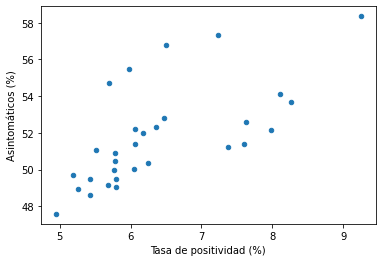

In [59]:
kControl2.T.plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',kind='scatter')

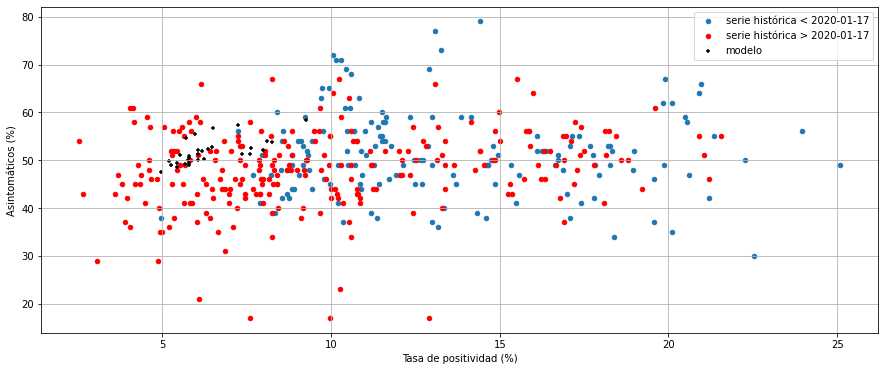

In [60]:
fig, ax = plt.subplots(figsize=(15,6))
total.loc[:'2021-01-17'].plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',
                              kind='scatter',label='serie histórica < 2020-01-17',ax=ax,marker='o')
total.loc['2021-01-17':].plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',
                              kind='scatter',label='serie histórica > 2020-01-17',ax=ax,c='r',marker='o')
kControl2.T.plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',kind='scatter',label='modelo',ax=ax,
                 c='k',marker='+')
plt.grid()

In [61]:
kControl2.T.columns

Index(['Casos', 'test coresp', 'Tasa de positividad (%)',
       'Nº de pacientes a los que se ha realizado pruebas', 'Asintomáticos',
       'Asintomáticos (%)', 'Zaragoza', 'Zaragoza (%)', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más', 'Camas Ocup',
       'Camas libres', 'Camas (%)', 'UCI ocupadas', 'UCI libres con resp',
       'UCI (%)', 'Rs', 'Rd', 'Inoculados', 'Total Casos',
       'Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más'],
      dtype='object')

In [62]:
total.T

Fecha                                               2020-08-14   2020-08-15  \
Día de la semana                                      5.000000     6.000000   
Casos                                               624.000000   482.000000   
test coresp                                        4177.000000  3243.000000   
Nº de pacientes a los que se ha realizado pruebas  3481.000000  1907.000000   
Tasa de positividad (%)                              14.940000    14.860000   
Asintomáticos                                       318.240000   216.900000   
Zaragoza                                            541.000000   428.000000   
1 a 14 años                                          96.000000    67.000000   
15 a 24 años                                         78.000000    51.000000   
25 a 34 años                                         85.000000    64.000000   
35 a 44 años                                         84.000000    83.000000   
45 a 54 años                                         85.000000    67.000000   
55 a 64 años                                         87.000000    57.000000   
65 a 74 años                                         48.000000    33.000000   
75 años o más                                        53.000000    56.000000   
Camas Ocup                                          514.000000   527.000000   
Camas libres                                       1601.000000  1606.000000   
UCI ocupadas                                         59.000000    60.000000   
UCI libres con resp                                  72.000000    73.000000   
Alarma                                                0.000000     0.000000   
Asintomáticos (%)                                    51.000000    45.000000   
Zaragoza (%)                                         86.698718    88.796680   
UCI/Camas (%)                                        11.478599    11.385199   
Camas/UCI                                             8.711864     8.783333   
Casos/Camas                                           1.214008     0.914611   
Camas/Casos                                           0.823718     1.093361   
Camas (%)                                            32.104934    32.814446   
UCI (%)                                              81.944444    82.191781   
Día                                                  -0.781831    -0.974928   
Rs                                                         NaN          NaN   
Rd                                                         NaN          NaN   
Bias                                                  1.000000     1.000000   
Festivo                                               0.000000     0.000000   
Lectivo                                               0.000000     0.000000   
Laboral                                               1.000000     0.000000   
NoLaboral                                             0.000000     1.000000   
NoLectivo                                             1.000000     1.000000   
Reuniones                                             0.000000     0.000000   
VacunasD                                              0.000000     0.000000   
Vacunas                                               0.000000     0.000000   
Inoculados                                          100.000000   100.000000   
Total Casos                                          98.337212    98.300677   
Total Casos 1 a 14 años                              98.247979    98.211673   
Total Casos 15 a 24 años                             98.237031    98.195859   
Total Casos 25 a 34 años                             98.240019    98.194856   
Total Casos 35 a 44 años                             98.258121    98.216740   
Total Casos 45 a 54 años                             98.258772    98.226274   
Total Casos 55 a 64 años                             98.250798    98.218562   
Total Casos 65 a 74 años                             98.264492    98.240080   
Total Casos 75 años o más                         

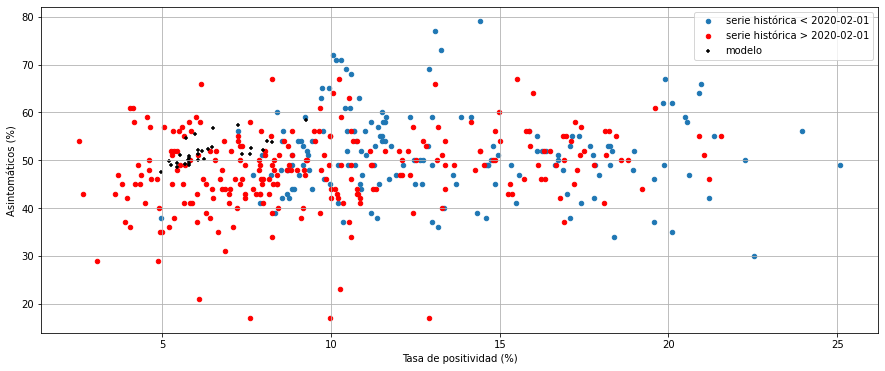

In [63]:
fig, ax = plt.subplots(figsize=(15,6))
total.loc[:'2021-01-17'].plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',
                              kind='scatter',label='serie histórica < 2020-02-01',ax=ax,marker='o')
total.loc['2021-01-17':].plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',
                              kind='scatter',label='serie histórica > 2020-02-01',ax=ax,c='r',marker='o')
kControl2.T.plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',kind='scatter',label='modelo',ax=ax,
                 c='k',marker='+')
plt.grid()

In [64]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

total[['Tasa de positividad (%)','Asintomáticos (%)']].corr(min_periods=2)


Tasa de positividad (%)  Asintomáticos (%)
Tasa de positividad (%)                 1.000000           0.169118
Asintomáticos (%)                       0.169118           1.000000

<AxesSubplot:xlabel='Tasa de positividad (%)', ylabel='Asintomáticos (%)'>

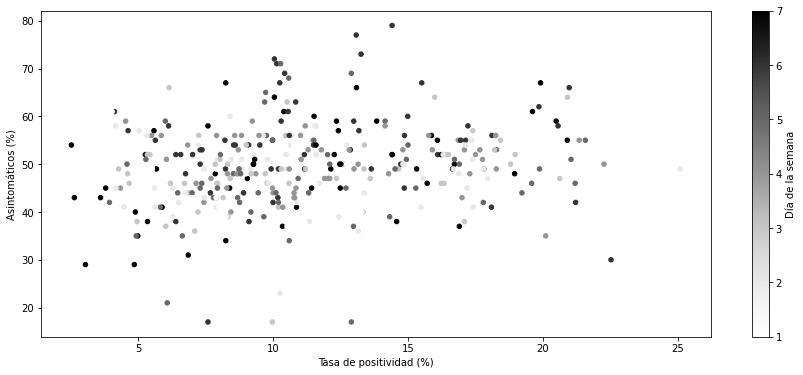

In [65]:
fig, ax = plt.subplots(figsize=(15,6))
total.plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',kind='scatter',c='Día de la semana',ax=ax)

In [66]:
kControl2.loc['Día de la semana',:] = pd.to_datetime(kControl2.columns.values).weekday+1

In [67]:
kControl2

2021-09-04   2021-09-05  \
Casos                                               140.018622    85.545631   
test coresp                                        1531.632164  1024.588095   
Tasa de positividad (%)                               9.242749     8.261469   
Nº de pacientes a los que se ha realizado pruebas  1042.293406   724.067932   
Asintomáticos                                        80.278891    46.134455   
Asintomáticos (%)                                    58.351972    53.699224   
Zaragoza                                             93.206348    53.404661   
Zaragoza (%)                                         65.126767    62.208840   
1 a 14 años                                          25.740649    12.521971   
15 a 24 años                                         14.336367     8.428494   
25 a 34 años                                         12.347193     7.617982   
35 a 44 años                                         17.383798    11.299853   
45 a 54 años                                         16.537089     9.983759   
55 a 64 años                                         10.433871     6.631761   
65 a 74 años                                          7.647692     4.680559   
75 años o más                                        24.108109    14.830286   
Camas Ocup                                          196.799721   202.073968   
Camas libres                                       1665.081085  1623.151269   
Camas (%)                                            11.781518    12.480261   
UCI ocupadas                                         43.890326    43.651853   
UCI libres con resp                                  91.559136    99.647335   
UCI (%)                                              48.008957    43.640410   
Rs                                                    0.735807     0.743542   
Rd                                                    0.857887     0.871606   
Inoculados                                           46.152535    45.930629   
Total Casos                                          87.957641    87.946315   
Total Casos 1 a 14 años                              89.225401    89.216756   
Total Casos 15 a 24 años                             81.421238    81.429687   
Total Casos 25 a 34 años                             86.323509    86.318038   
Total Casos 35 a 44 años                             89.259873    89.254326   
Total Casos 45 a 54 años                             88.773269    88.778948   
Total Casos 55 a 64 años                             89.336980    89.346899   
Total Casos 65 a 74 años                             91.283509    91.286551   
Total Casos 75 años o más                            89.202332    89.181063   
Día de la semana                                      6.000000     7.000000   

                                                    2021-09-06   2021-09-07  \
Casos                                               121.382489   165.851766   
test coresp                                        1624.280903  2085.950087   
Tasa de positividad (%)                               7.594423     7.976325   
Nº de pacientes a los que se ha realizado pruebas  2027.620560  2016.018004   
Asintomáticos                                        63.189024    88.127344   
Asintomáticos (%)                                    51.373300    52.167434   
Zaragoza                                             70.810309   105.434710   
Zaragoza (%)                                         58.994926    64.673642   
1 a 14 años                                          17.873431    30.634668   
15 a 24 años                                         12.049902    16.859201   
25 a 34 años                                         11.118099    15.589393   
35 a 44 años                                         16.692817    23.228552   
45 a 54 años                                         14.517857    19.443673   
55 a 64 años                                          9.802179    13.488981   
65 a 74 años          

<AxesSubplot:xlabel='Tasa de positividad (%)', ylabel='Asintomáticos (%)'>

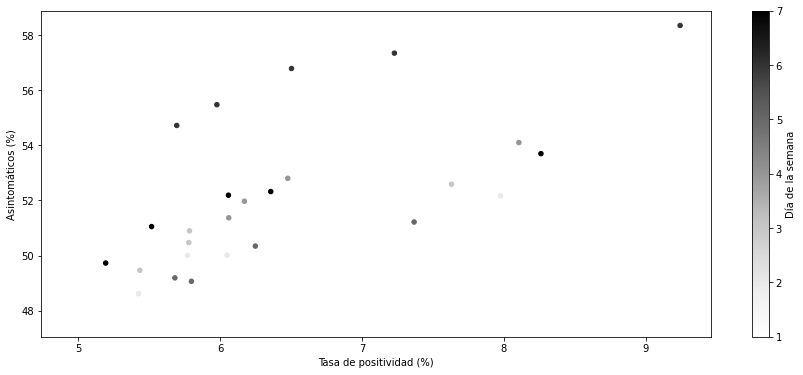

In [68]:
fig, ax = plt.subplots(figsize=(15,6))
kControl2.T.plot(x='Tasa de positividad (%)',y='Asintomáticos (%)',kind='scatter',c='Día de la semana',ax=ax)

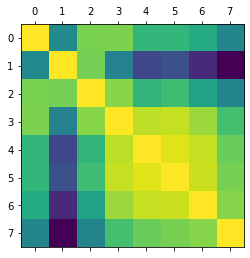

Index(['Día de la semana', 'Casos', 'test coresp',
       'Nº de pacientes a los que se ha realizado pruebas',
       'Tasa de positividad (%)', 'Asintomáticos', 'Zaragoza', '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más', 'Camas Ocup',
       'Camas libres', 'UCI ocupadas', 'UCI libres con resp', 'Alarma',
       'Asintomáticos (%)', 'Zaragoza (%)', 'UCI/Camas (%)', 'Camas/UCI',
       'Casos/Camas', 'Camas/Casos', 'Camas (%)', 'UCI (%)', 'Día', 'Rs', 'Rd',
       'Bias', 'Festivo', 'Lectivo', 'Laboral', 'NoLaboral', 'NoLectivo',
       'Reuniones', 'VacunasD', 'Vacunas', 'Inoculados', 'Total Casos',
       'Total Casos 1 a 14 años', 'Total Casos 15 a 24 años',
       'Total Casos 25 a 34 años', 'Total Casos 35 a 44 años',
       'Total Casos 45 a 54 años', 'Total Casos 55 a 64 años',
       'Total Casos 65 a 74 años', 'Total Casos 75 años o más'],
      dtype='object')

In [69]:
plt.matshow(total[[ '1 a 14 años',
       '15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
       '55 a 64 años', '65 a 74 años', '75 años o más']].corr())
plt.show()
total.columns

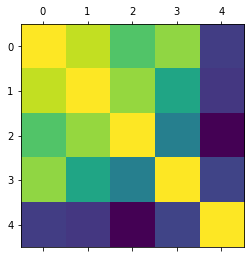

In [70]:
plt.matshow(total[[ 'Casos', 'test coresp',
       'Nº de pacientes a los que se ha realizado pruebas',
       'Tasa de positividad (%)', 'Asintomáticos (%)']].corr(min_periods=21))
plt.show()

(1.0, 28.0)

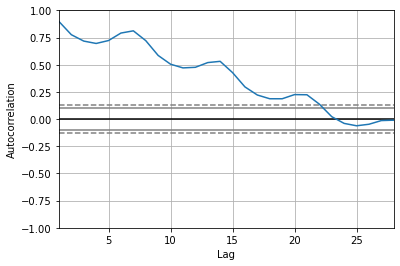

In [71]:
s = diario.Casos
pd.plotting.autocorrelation_plot(s)
plt.xlim(right=28)

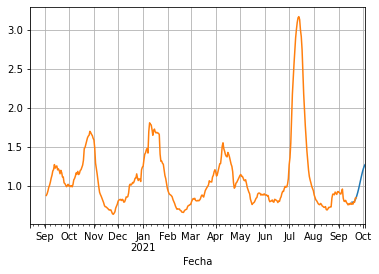

In [72]:
kControl2.T.Rd.rolling(14).mean().plot()
total.Rd.rolling(14).mean().plot()
plt.grid()

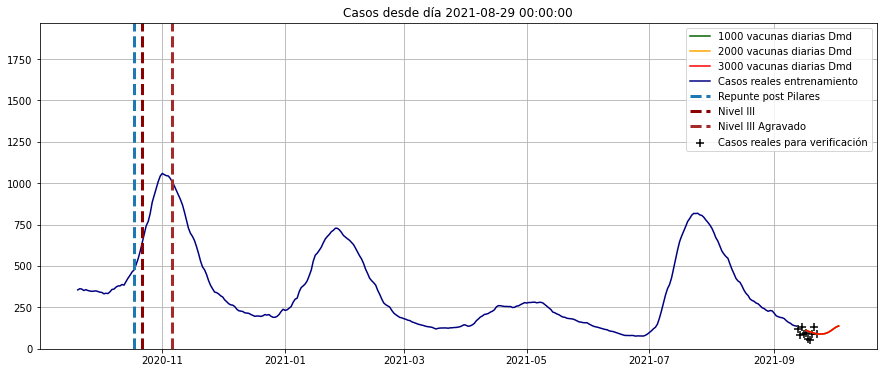

In [ ]:
for i in kControl.T.columns:
    
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #ax.plot(noAction2.T.index,
    #        noAction2.T[[i]],axes=ax,label='No Action Dmd')
    ax.plot(rellaxed2.T.index,
            rellaxed2.T[[i]].rolling(14).mean(),axes=ax,label='1000 vacunas diarias Dmd',c='darkgreen')
    ax.plot(kControl2.T.index,
            kControl2.T[[i]].rolling(14).mean(),axes=ax,label='2000 vacunas diarias Dmd',c='orange')
    ax.plot(hard2.T.index,
            hard2.T[[i]].rolling(14).mean(),axes=ax,label='3000 vacunas diarias Dmd',c='red')    
    #ax.plot(media2.T.index,
    #        media2.T[[i]],axes=ax,label='media de Dmd',c='orange',lw=5,ls='--')
    ax.plot(diario.loc['2020-9-7':].index,
        diario.loc['2020-9-7':,[i]].rolling(14).mean(),axes=ax,label='{} reales entrenamiento'.format(i),c='navy')
    #X_prima.T.loc['2020-9-7':,i].plot(ax=ax,label='{}'.format(i))
    ax.scatter(nuevos.loc['2020-9-7':].index,
            nuevos.loc['2020-9-7':,[i]],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    plt.legend()
    plt.title("{} desde día {}".format(i,x1.index[0]))
    plt.ylim(bottom=-1,top=1.75*X_prima.T.loc['2020-9-7':,i].max())
    plt.grid()
    plt.show()

In [ ]:
#for i in ['Casos',
#          'test coresp', #'Tasa de positividad (%)',
#          #'Nº de pacientes a los que se ha realizado pruebas', 'Asintomáticos',
#          #'Asintomáticos (%)', 'Zaragoza', 'Zaragoza (%)', '1 a 14 años',
#          #'15 a 24 años', '25 a 34 años', '35 a 44 años', '45 a 54 años',
#          #'55 a 64 años', '65 a 74 años', '75 años o más', 
#          #'Camas Ocup', 'Camas libres', 'Camas (%)', 
#          'UCI ocupadas', 'UCI libres con resp', 'UCI (%)', 
#          #'Rs', 'Rd',
#          #'Inoculados', 'Total Casos'
#         ]:
for i in kControl.T.columns:
    fig, ax = plt.subplots(figsize=(15,6))
    #highlight_datetimes(pd.concat([diario.loc['2020-9-7':],kControl.T]).index.unique(), ax,items=False)
    
    
    #ax.plot(noAction2.T.index,
    #        noAction2.T[[i]],axes=ax,label='No Action Dmd')
    ax.plot(rellaxed2.T.index,
            rellaxed2.T[[i]],axes=ax,label='1000 vacunas diarias Dmd',c='darkgreen')
    ax.plot(kControl2.T.index,
            kControl2.T[[i]],axes=ax,label='2000 vacunas diarias Dmd',c='orange')
    ax.plot(hard2.T.index,
            hard2.T[[i]],axes=ax,label='3000 vacunas diarias Dmd',c='red')    
    #ax.plot(media2.T.index,
    #        media2.T[[i]],axes=ax,label='media de Dmd',c='orange',lw=5,ls='--')
    ax.plot(diario.loc[:].index,
        diario.loc[:,[i]],axes=ax,label='{} reales entrenamiento'.format(i),c='navy')
    #X_prima.T.loc['2020-9-7':,i].plot(ax=ax,label='{}'.format(i))
    ax.scatter(nuevos.loc[:].index,
            nuevos.loc[:,[i]],axes=ax,label='{} reales para verificación'.format(i),marker='+',c='k',s=50)
    ax.axvline(pd.Timestamp('2020-10-18'),lw=3,ls='--',label='Repunte post Pilares')
    ax.axvline(pd.Timestamp('2020-10-22'),lw=3,ls='--',c='darkred',label='Nivel III')
    ax.axvline(pd.Timestamp('2020-11-6'),lw=3,ls='--',c='brown',label='Nivel III Agravado')
    plt.legend()
    plt.title("{} desde día {}".format(i,x1.index[0]))
    plt.ylim(bottom=.5*np.max([0,total.loc[:,i].min()]),top=1.15*total.loc[:,i].max())
    #plt.xlim(left=pd.Timestamp('2021-2'))
    plt.grid()
    plt.show()
  

In [ ]:
kControl.T.columns


In [ ]:
entrenoDesde = '2020-08-16'
entrenoDesde = '2021-03-19'
entrenoHasta = '2021-04-29'
#X = Omega.loc[['Casos', 'test coresp', #'Tasa de positividad (%)',
#       'Nº de pacientes a los que se ha realizado pruebas','Asintomáticos (%)']].iloc[:,:nAjuste]
#X.loc['Bias',:] = 1
variablesAjuste = ['Casos', 'test coresp', #'Tasa de positividad (%)',
       'Nº de pacientes a los que se ha realizado pruebas','Asintomáticos (%)',
                   #'UCI ocupadas','Camas Ocup',
                   #'Bias',
                  ]
X_total = total[variablesAjuste].dropna(axis=0).loc[entrenoDesde:].iloc[:-1].T
#X_total.loc['Bias',:] = 1
X = X_total.loc[:,:entrenoHasta]
X

In [ ]:

X_pinv = pd.DataFrame(np.linalg.pinv(X),columns=X.index,index=X.columns)
X_pinv

In [ ]:
#X_prima.loc[['Casos']].iloc[:,-nAjuste:]
X_prima_total =total[['Casos']].shift(-1)#.loc[[X.columns],:]
X_prima = X_prima_total.loc[X.columns,['Casos']].T
X_prima

In [ ]:
A = X_prima.loc[['Casos']].dot( X_pinv)
A

In [ ]:
#A.dot(pd.DataFrame([372,3732,3099,17,1],index=X.index))
display(total.T.loc[X.index].iloc[:,[-3]])
ultimaPrevision = A.dot(total.T.loc[X.index].iloc[:,[-3]])
ultimaPrevision.columns = ultimaPrevision.columns + pd.Timedelta(1,unit='D')
ultimaPrevision

In [ ]:
def verPrevision(fecha=['2021-05-01'],debug=False,A=A):
    dato = total.T.loc[X.index].loc[:,pd.DatetimeIndex(fecha) - pd.Timedelta(1,unit='D')]
    if debug:
        display(dato.T)
    prevision = A.dot(dato)
    prevision.columns = prevision.columns + pd.Timedelta(1,unit='D')
    prevision.index = ['Casos est. linal']
    return prevision.T
verPrevision(['2021-05-03'])

In [ ]:
verPrevision(['2021-04-17','2021-04-18','2021-04-19','2021-04-20'])

In [ ]:
Casos = total.loc['2020-08-16':,['Casos']].dropna()
Casos = pd.concat([Casos,verPrevision(Casos.index)],axis=1)
Casos

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))


Casos.iloc[-42:].plot(color=['r','b'],style='-o',ax=ax)
plt.axvline(x=entrenoHasta,ls='--',linewidth=4, color='purple',alpha=.4,label='dejo de entrenar')
plt.legend()
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn off bottom ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(WeekdayLocator(0))
plt.xticks(rotation=45)

plt.grid(which='both')

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))


Casos.iloc[-28:].plot(color=['r','b'],style='-o',ax=ax)
kControl2.loc['Casos',
              :#Casos.iloc[-42:].index[-1]
             ].iloc[:35].plot(color='darkgreen',style='-o',ax=ax,
                                                    label='DMDc')
plt.axvline(x=entrenoHasta,ls='--',linewidth=4, color='purple',alpha=.4,label='dejo de entrenar')
plt.legend()
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn off bottom ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(WeekdayLocator(0))
plt.xticks(rotation=45)

plt.grid(which='both')

In [ ]:
((Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna()).mean(),\
    ((Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna()).std()

In [ ]:
def estimadorCasos(entrenoDesde = '2021-03-19',entrenoHasta = '2021-04-29',
                  variablesAjuste = [
                      'Casos', 'test coresp', #'Tasa de positividad (%)',
                      'Nº de pacientes a los que se ha realizado pruebas','Asintomáticos (%)',
                      #'Asintomaticos',
                      #'UCI ocupadas','Camas Ocup',
                      #'Bias',
                  ],
                   plot=True,debug=False
                  ):

    X_total = total[variablesAjuste].dropna(axis=0).loc[entrenoDesde:].iloc[:-1].T
    #X_total.loc['Bias',:] = 1
    
    X = X_total.loc[:,:entrenoHasta].copy()
    X = total[variablesAjuste].loc[entrenoDesde:entrenoHasta].dropna(axis=0).T
    if debug:
        display(X_total) 
    X_pinv = pd.DataFrame(np.linalg.pinv(X),columns=X.index,index=X.columns)
    
    X_prima_total =total[['Casos']].shift(-1)#.loc[[X.columns],:]
    X_prima = X_prima_total.loc[X.columns,['Casos']].T
    
    A = X_prima.loc[['Casos']].dot( X_pinv)
    
    Casos = total.loc['2020-08-15':,['Casos']].dropna()
    Casos = pd.concat([Casos,verPrevision(Casos.index,A=A)],axis=1)
    
    if plot:
        fig, ax = plt.subplots(figsize=(15,6))


        Casos.iloc[-30:].plot(color=['r','b'],style='-o',ax=ax)
        plt.axvline(x=entrenoHasta,ls='--',linewidth=4, color='purple',alpha=.4,label='dejo de entrenar')
        plt.legend()
        ax.tick_params(which='both', # Options for both major and minor ticks
                        top='off', # turn off top ticks
                        left='off', # turn off left ticks
                        right='off',  # turn off right ticks
                        bottom='on') # turn off bottom ticks
        ax.minorticks_on()
        ax.xaxis.set_minor_locator(WeekdayLocator(0))
        plt.xticks(rotation=45)

        plt.grid(which='both')
        plt.show()
        
    error =(Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna().copy()
    #if debug:
    #display(error.mean(),error.std())
    
    return error.mean(),error.std()

In [ ]:
kkk =estimadorCasos(entrenoDesde = '2020-09-22',
    entrenoHasta = '2021-04-29')
kkk

In [ ]:
for i in total.iloc[-200:-7].index:
    kkk =estimadorCasos(entrenoDesde = i,
    entrenoHasta = '2021-04-29',plot=False)
    print("{} {} {}".format(i,kkk[0],kkk[1]))

In [ ]:
for i in total.iloc[-76:-3].index:
    kkk =estimadorCasos(entrenoDesde = '2021-03-19',
    entrenoHasta = i,plot=False)
    print("{} {} {}".format(i,kkk[0],kkk[1]))

In [ ]:
X

In [ ]:
variablesAjuste# = variables
variablesAjuste = ['Casos', 'test coresp', #'Tasa de positividad (%)',
                   'Nº de pacientes a los que se ha realizado pruebas',
                   'Asintomáticos (%)',
                   #'UCI ocupadas','Camas Ocup',
                   #'Bias',
                   #'Inoculados',
                   #'Total Casos',
                  ]
ventana = 14
entrenoDesde = '2021-06-19'
entrenoHasta = '2021-09-19'
X_total = pd.concat([total.loc[:,variablesAjuste],
                    (total[variablesAjuste].shift(1)
                        #- expData.loc[:,np.concatenate([koopman,estado])]
                    ).add_suffix("$^{{-\Delta t}}$")] + 
                   [ (total[variablesAjuste].shift(i+2) 
                     #-  expData.loc[:,np.concatenate([koopman,estado])]
                     ).add_suffix(
                       "$^{{-{}\cdot \Delta t}}$".format(i+2))
                        for i in range(ventana-2)],axis=1).iloc[ventana-1:].dropna().T#2*ventana]
X_prima_total =total.shift(-1)#.loc[[X.columns],:]
X = X.loc[:,entrenoDesde:entrenoHasta]
##X_prima = X_prima_total.loc[X_total.columns,variablesAjuste].dropna().T
#X_prima = X_prima_total.loc[X_total.columns,['Casos']].dropna().T
X_prima = X_prima_total.loc[entrenoDesde:entrenoHasta,['Casos']].dropna().T
X = X_total.loc[:,X_prima.columns]
X.T.Casos.plot(style='-o')
X

In [ ]:

X_pinv = pd.DataFrame(np.linalg.pinv(X),columns=X.index,index=X.columns)
X_pinv

In [ ]:
A = X_prima.dot( X_pinv)
A
#X_prima

In [ ]:
def verPrevision(fecha=['2021-05-07'],debug=False,A=A,X=X):
    dato = X_total.loc[:,X_total.columns.intersection(pd.DatetimeIndex(fecha) - pd.Timedelta(1,unit='D'))]
    if debug:
        display(dato.T)
    prevision = A.dot(dato)
    prevision.columns = prevision.columns + pd.Timedelta(1,unit='D')
    #prevision.index = ['Casos est. lineal']
    prevision.index = ["{} est. lineal".format(i) for i in prevision.index]
    return prevision.T
verPrevision(A=A,debug=True)

In [ ]:
Casos =  total.loc[entrenoDesde:,'Casos'].dropna()
#Casos =  total.loc['2021-01':,'Casos'].dropna()


Casos.iloc[5:]

In [ ]:
verPrevision(Casos.iloc[5:].index,A=A,X=X)

In [ ]:
#Casos = total.loc['2020-09-01':,['Casos']].dropna()
Casos = pd.concat([Casos.iloc[5:],verPrevision(Casos.iloc[5:].index,A=A,X=X)],axis=1)
ultimaPrevision = verPrevision(fecha=['2021-09-22'])
Casos.loc[ultimaPrevision.index[0],'Casos est. lineal'] = ultimaPrevision.iat[0,0]
Casos


In [ ]:
Casos.index[0]#+ pd.Timedelta(7,unit='D')

In [ ]:
errorSTD = ((Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna()).std()
fig, ax = plt.subplots(figsize=(15,6))


Casos.iloc[-28:].plot(color=['b','r'],style='-o',ax=ax)
kControl2.loc['Casos',
              Casos.index[0]:(Casos.index[-1] + pd.Timedelta(7,unit='D'))#Casos.iloc[-42:].index[-1]
             ].iloc[-35:#:42
                   ].plot(color='darkgreen',style='-o',ax=ax,
                                                    label='DMDc')
ax.fill_between(Casos.iloc[-28:].index, 
                Casos.iloc[-28:]['Casos est. lineal']-errorSTD,
                Casos.iloc[-28:]['Casos est. lineal']+errorSTD, facecolor='red', alpha=0.25,
                label='1 sigma range')
plt.axvline(x=entrenoHasta,ls='--',linewidth=4, color='r',alpha=.4,label='fin ajuste lineal')
plt.axvline(x=diario.index[-1],ls='--',linewidth=4, color='darkgreen',alpha=.4,label='fin ajuste DMDc')
plt.legend()
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn off bottom ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(WeekdayLocator(0))
plt.xticks(rotation=45)
ax.set_ylim(bottom=0)

ax.yaxis.tick_right()

plt.grid(which='both')
fig, ax = plt.subplots(figsize=(15,6))


Casos.iloc[-156:].plot(color=['b','r'],style='-o',ax=ax)
kControl2.loc['Casos',
              Casos.index[0]:(Casos.index[-1] + pd.Timedelta(14,unit='D'))#Casos.iloc[-42:].index[-1]
             #].iloc[:15#:42
                   ].plot(color='darkgreen',style='-o',ax=ax,
                                                    label='DMDc')
ax.fill_between(Casos.iloc[-156:].index, 
                Casos.iloc[-156:]['Casos est. lineal']-errorSTD,
                Casos.iloc[-156:]['Casos est. lineal']+errorSTD, facecolor='red', alpha=0.25,
                label='1 sigma range')


plt.axvline(x=entrenoHasta,ls='--',linewidth=4, color='r',alpha=.4,label='fin ajuste lineal')
plt.axvline(x=diario.index[-1],ls='--',linewidth=4, color='darkgreen',alpha=.4,label='fin ajuste DMDc')
plt.legend()
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn off bottom ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(WeekdayLocator(0))
plt.xticks(rotation=45)
ax.set_ylim(bottom=0)

ax.yaxis.tick_right()

plt.grid(which='both')

Ajustes = pd.concat([Casos,kControl2.T.loc[Casos.index[-7]:,['Casos']].iloc[:11,:].rename(columns={'Casos':'Casos DMDc'})],axis=1).tail(11)
display(Ajustes)
((Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna()).mean(),\
    ((Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna()).std()

In [ ]:
#goto
fig, ax = plt.subplots(figsize=(15,6))


Casos.rolling(7,center=False).mean().iloc[-156:].plot(color=['b','r'],style='-o',ax=ax)
kControl.loc['Casos',
              Casos.index[0]:(Casos.index[-1] + pd.Timedelta(7,unit='D'))#Casos.iloc[-42:].index[-1]
             #].iloc[:15#:42
             ].iloc[-21:].plot(color='darkgreen',style='-o',ax=ax,
                                                    label='DMDc')
plt.axvline(x=entrenoHasta,ls='--',linewidth=4, color='purple',alpha=.4,label='dejo de entrenar')
plt.legend()
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn off bottom ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(WeekdayLocator(0))
plt.xticks(rotation=45)

ax.yaxis.tick_right()

plt.grid(which='both')
fig, ax = plt.subplots(figsize=(15,6))


Casos.rolling(7,center=False).mean().iloc[-56:].plot(color=['b','r'],style='-o',ax=ax)
kControl.loc['Casos',
              Casos.index[0]:(Casos.index[-1] + pd.Timedelta(7,unit='D'))#Casos.iloc[-42:].index[-1]
             ].iloc[-50:#:42
                   ].plot(color='darkgreen',style='-o',ax=ax,
                                                    label='DMDc')
plt.axvline(x=entrenoHasta,ls='--',linewidth=4, color='purple',alpha=.4,label='dejo de entrenar')
plt.legend()
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn off bottom ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(WeekdayLocator(0))
plt.xticks(rotation=45)

ax.yaxis.tick_right()

plt.grid(which='both')

In [ ]:
((Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna()).mean(),\
    ((Casos[Casos.columns[0]] - Casos[Casos.columns[1]]).dropna()).std()

In [ ]:
colores = plt.cm.tab20b.colors
colores = dict(zip(U_hat_r.index,plt.cm.tab20b.colors + plt.cm.Pastel1.colors[:6]))

In [ ]:
U_tilde_2_r.T.sort_values(by='Alarma',key=abs).tail(20).plot(kind='barh')
plt.show()

In [ ]:
for i in U_hat_r.columns[:5]: 
    componentes = U_hat_r.T.loc[i].sort_values(key=abs).tail()
    kcolores = [colores[j] for j in componentes.index]
    componentes.plot(kind='barh',color=kcolores)
    plt.title(r'{}'.format(i))
    
    plt.show()
    
for i in U_tilde_1_r.columns[:5]: 
    componentes = U_tilde_1_r.T.loc[i].sort_values(key=abs).tail()
    kcolores = [colores[j] for j in componentes.index]
    componentes.plot(kind='barh',color=kcolores)
    plt.title(r'{}'.format(i))
    
    plt.show()
    
U_tilde_2_r.T.sort_values(by='Alarma',key=abs).tail(20).plot(kind='barh')
plt.show()

for i in U_tilde_2_r.T.sort_values(by='Alarma',key=abs).loc[::-1].head(10).index:
    componentes = U_tilde_1_r.T.loc[i].sort_values(key=abs).tail()
    kcolores = [colores[j] for j in componentes.index]
    componentes.plot(kind='barh',color=kcolores)
    plt.title(r'{}'.format(i))
    
    plt.show()

In [ ]:
diario.Alarma.sort_index(ascending=False).to_excel("kk.xlsx")

In [ ]:
len(fsys_A_tilde.B),len(fsys_A_tilde.B[0])

In [ ]:
ktf= ct.ss2tf(fsys_A_tilde)

In [ ]:
diario.Casos.dtype?


In [ ]:
df = pd.DataFrame(index=[1,2,4])
df

In [ ]:

df.loc[:,'error'] = [[1,2],[2,3],[3,4]]

In [ ]:
df.loc[3,'error'] = range(3)
df

In [ ]:
df.dtypes